In [216]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings
#import sktime

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler


# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, add_changepoints_to_plot
# from keras.models import Sequential
# from keras.layers import Dense

# from keras.optimizers import Adam

warnings.filterwarnings('ignore')

In [217]:
metrics_df = pd.DataFrame(columns=['Model', 'MAE', 'mase'])
metrics_df

,Model,MAE,mase


In [218]:
def mean_absolute_scaled_error(y_true, y_pred):
    naive_forecast = np.array(y_true[:-1])
    y_true_insample = np.array(y_true[1:])
    insample_error = np.abs(y_true_insample - naive_forecast)
    # Calculate the forecast errors
    forecast_error = np.abs(y_true - y_pred)
    # Calculate the MASE
    mase = np.mean(forecast_error) / np.mean(insample_error)
    return mase


In [219]:
czech  = pd.read_csv('univariate_models/univariate_df_Czechia.csv')
eston  = pd.read_csv('univariate_models/univariate_df_Estonia.csv')
franc  = pd.read_csv('univariate_models/univariate_df_France.csv')
malay  = pd.read_csv('univariate_models/univariate_df_Malaysia.csv')
belgi  = pd.read_csv('univariate_models/univariate_df_Belgium.csv')
chile  = pd.read_csv('univariate_models/univariate_df_Chile.csv')
irela  = pd.read_csv('univariate_models/univariate_df_Ireland.csv')
israe  = pd.read_csv('univariate_models/univariate_df_Israel.csv')
italy  = pd.read_csv('univariate_models/univariate_df_Italy.csv')
us  = pd.read_csv('univariate_models/univariate_df_United_States.csv')


In [220]:
# setting index to the date time value 
def index_dt(c):
    c.set_index('date')

czech= czech.set_index('date')
eston =eston.set_index('date')
franc =franc.set_index('date')
malay = malay.set_index('date')
belgi = belgi.set_index('date')
chile =chile.set_index('date')
irela = irela.set_index('date')
isrea = israe.set_index('date')
italy = italy.set_index('date')
us = us.set_index('date')


## Data Spliting 
In time series prediction, it is crucial to handle the temporal aspect properly when splitting the data into training and testing sets. Unlike random data, time series data has a sequential structure, and random splitting can lead to information leakage and overly optimistic performance estimates.

In [221]:
#sort index
for x in [czech, eston, franc, malay,belgi, chile, irela, israe, italy, us]:
    x = x.sort_index()

In [222]:
train_size = int(len(czech) * 0.8)
czech_train, czech_test = czech[0:train_size], czech[train_size:].drop('Unnamed: 0', axis=1)
eston_train, eston_test = eston[0:train_size], eston[train_size:].drop('Unnamed: 0', axis=1)
franc_train, franc_test = franc[0:train_size], franc[train_size:].drop('Unnamed: 0', axis=1)
malay_train, malay_test = malay[0:train_size], malay[train_size:].drop('Unnamed: 0', axis=1)
belgi_train, belgi_test = belgi[0:train_size], belgi[train_size:].drop('Unnamed: 0', axis=1)
chile_train, chile_test = chile[0:train_size], chile[train_size:].drop('Unnamed: 0', axis=1)
irela_train, irela_test = irela[0:train_size], irela[train_size:].drop('Unnamed: 0', axis=1)
israe_train, israe_test = israe[0:train_size], israe[train_size:].drop('Unnamed: 0', axis=1)
italy_train, italy_test = italy[0:train_size], italy[train_size:].drop('Unnamed: 0', axis=1)
us_train, us_test = us[0:train_size], us[train_size:].drop('Unnamed: 0', axis=1)
us_test

,new_deaths,diff1
date,,
2023-04-02,1746.0,-338.0
2023-04-09,1729.0,-17.0
2023-04-16,1290.0,-439.0
2023-04-23,1198.0,-92.0
2023-04-30,1046.0,-152.0
2023-05-07,1146.0,100.0
2023-05-14,1943.0,797.0
2023-05-21,755.0,-1188.0
2023-05-28,738.0,-17.0


## Czechia Models - arima, gs arima, sarima 

In [260]:
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(czech_train['new_deaths'],order=(1,1,1))
cmodel_fit=model.fit()

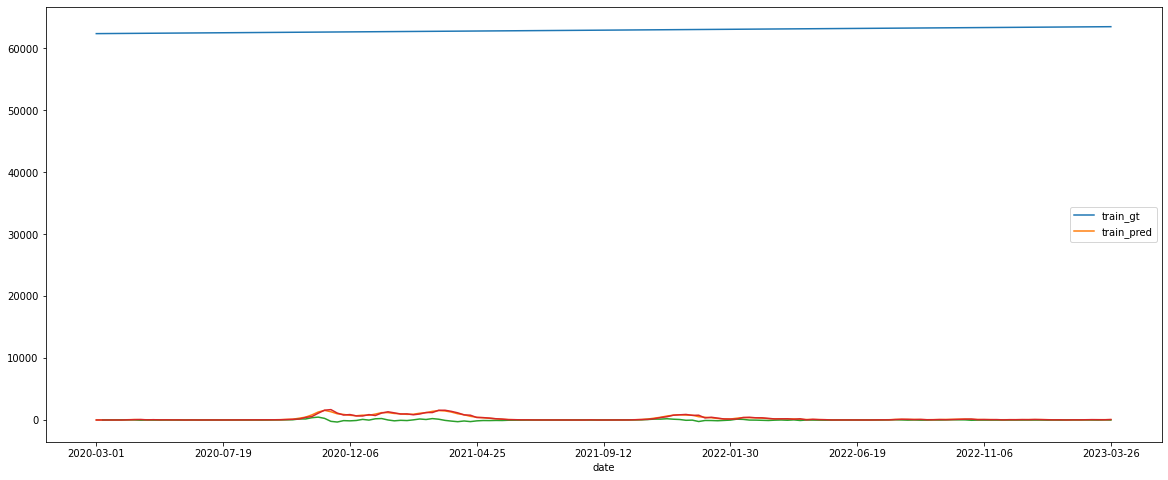

In [265]:
train_pred=cmodel_fit.fittedvalues
pd.concat([czech_train, train_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['train_gt', 'train_pred'])

In [270]:
train_pred

date
2020-03-01     0.000000
2020-03-08     0.000000
2020-03-15     0.000000
2020-03-22     0.000000
2020-03-29     0.000000
                ...    
2023-02-26    44.037317
2023-03-05    55.776678
2023-03-12    36.753964
2023-03-19    32.211687
2023-03-26    74.881109
Length: 161, dtype: float64

Text(0, 0.5, 'New Deaths')

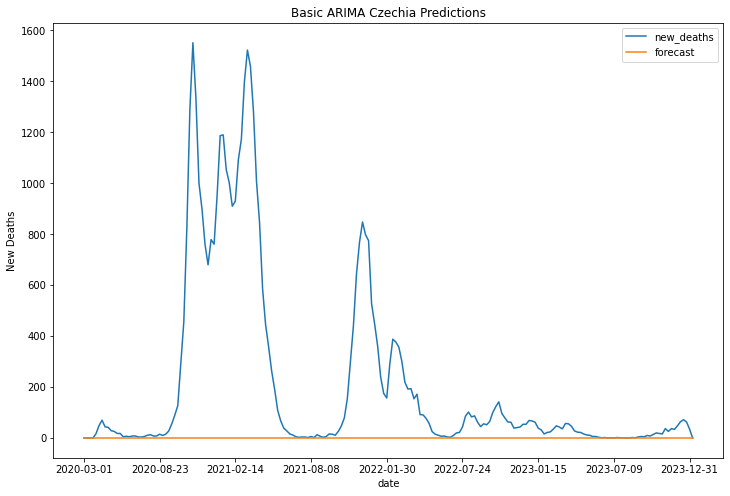

In [263]:
czech['forecast']=cmodel_fit.predict(start=0,end=202,dynamic=True)
czech[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Czechia Predictions')
plt.ylabel('New Deaths')

Text(0, 0.5, 'New Deaths')

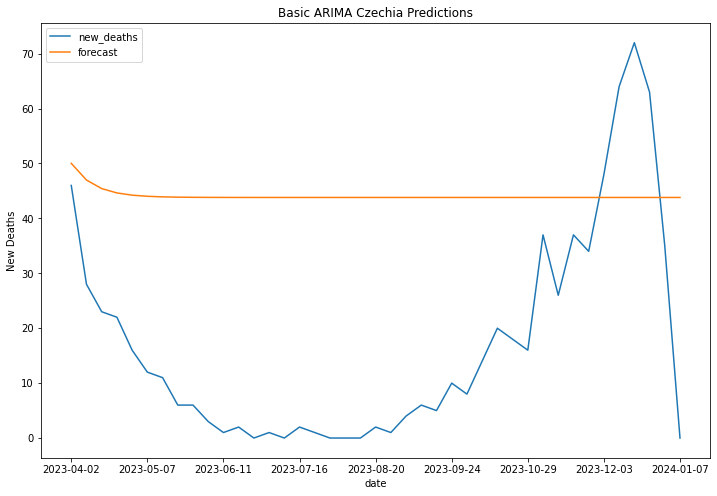

In [225]:
czech_test['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
czech_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Czechia Predictions')
plt.ylabel('New Deaths')

In [226]:
actuals = czech_test['new_deaths']  
predictions = czech_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a czech',mae, mase]

In [227]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321


In [228]:
results=[]
for p in range(0,3):
    for q in range(0,3):
        model=ARIMA(czech_train['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
7,2,1,1809.368437
8,2,2,1811.107420
6,2,0,1813.130142
4,1,1,1815.592965
5,1,2,1816.988740
2,0,2,1820.796323
3,1,0,1821.168075
1,0,1,1832.961045
0,0,0,1911.757113


Text(0, 0.5, 'New Deaths')

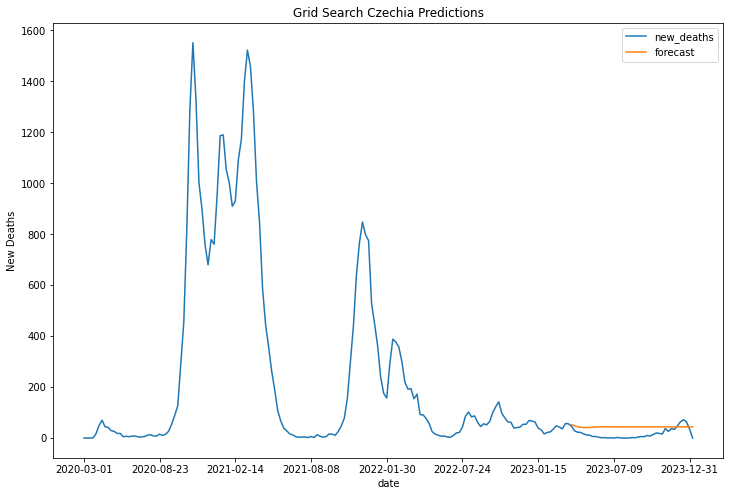

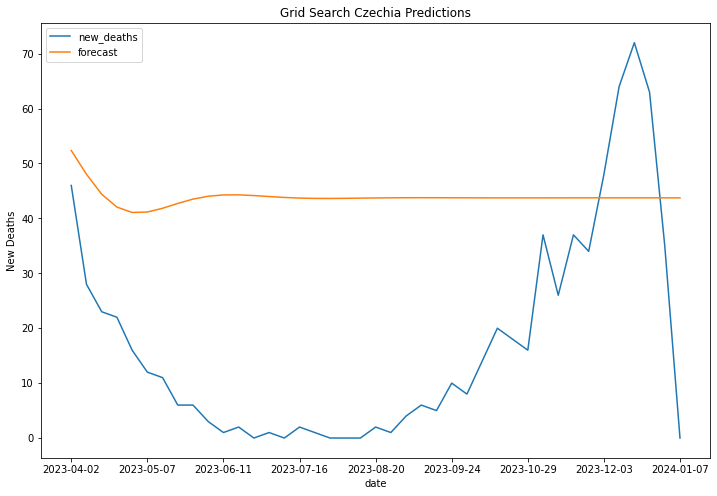

In [229]:
model=ARIMA(czech_train['new_deaths'],order=(2,1,1))
cmodel_fit=model.fit()

czech['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
czech[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Grid Search Czechia Predictions')
plt.ylabel('New Deaths')

czech_test['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
czech_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Grid Search Czechia Predictions')
plt.ylabel('New Deaths')

In [230]:
czech_test

,new_deaths,diff1,forecast
date,,,
2023-04-02,46.0,-10.0,52.358753
2023-04-09,28.0,-18.0,48.044273
2023-04-16,23.0,-5.0,44.399280
2023-04-23,22.0,-1.0,42.059506
2023-04-30,16.0,-6.0,41.080490
2023-05-07,12.0,-4.0,41.157427
2023-05-14,11.0,-1.0,41.845981
2023-05-21,6.0,-5.0,42.728838
2023-05-28,6.0,0.0,43.508472


In [231]:
czech_test

,new_deaths,diff1,forecast
date,,,
2023-04-02,46.0,-10.0,52.358753
2023-04-09,28.0,-18.0,48.044273
2023-04-16,23.0,-5.0,44.399280
2023-04-23,22.0,-1.0,42.059506
2023-04-30,16.0,-6.0,41.080490
2023-05-07,12.0,-4.0,41.157427
2023-05-14,11.0,-1.0,41.845981
2023-05-21,6.0,-5.0,42.728838
2023-05-28,6.0,0.0,43.508472


In [232]:
actuals = czech_test['new_deaths']  
predictions = czech_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base grid searched czech',mae, mase]

In [233]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188


In [234]:
#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(czech_train['new_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,13)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(czech_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,13))





model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
czech_test['seasonal'] = pred
mae = mean_absolute_error(czech_test['new_deaths'], pred)
mase = mean_absolute_scaled_error(czech_test['new_deaths'], czech_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal czech',mae, mase]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87010D+00    |proj g|=  6.08239D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   4.450D-06   5.868D+00
  F =   5.8681474985885416     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.7

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.57394D+00    |proj g|=  1.62567D-05

At iterate   15    f=  5.57392D+00    |proj g|=  2.48294D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     19      1     0     0   8.401D-06   5.574D+00
  F =   5.5739102199739694     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93982D+00    |proj g|=  5.10146D-01

At iterate    5    f=  5.68928D+00    |proj g|=  4.00508D-02

At iterate   10    f=  5.61179D+00    |proj g|=  6.63001D-03

At iterate   15    f=  5.56525D+00    |proj g|=  1.33844D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     18      1     0     0   4.181D-06   5.565D+00
  F =   5.5652417934065701     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.57285D+00    |proj g|=  1.00214D-03

At iterate   15    f=  5.56804D+00    |proj g|=  1.60690D-04

At iterate   20    f=  5.56803D+00    |proj g|=  2.04153D-03

At iterate   25    f=  5.56800D+00    |proj g|=  7.74218D-04

At iterate   30    f=  5.56800D+00    |proj g|=  1.49869D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     37      1     0     0   1.743D-04   5.568D+00
  F =   5.5679957096999129     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13508D+00    |proj g|=  7.97608D-01

At iterate    5    f=  5.79533D+00    |proj g|=  2.64668D-02

At iterate   10    f=  5.58313D+00    |proj g|=  2.86050D-03

At iterate   15    f=  5.56952D+00    |proj g|=  2.51424D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   1.473D-06   5.570D+00
  F =   5.5695168138562741     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine 

 This problem is unconstrained.



At iterate   10    f=  5.61304D+00    |proj g|=  2.85681D-02

At iterate   15    f=  5.61119D+00    |proj g|=  2.10028D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   1.080D-07   5.611D+00
  F =   5.6111906148211368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81566D+00    |proj g|=  7.56116D-01


 This problem is unconstrained.



At iterate    5    f=  5.63393D+00    |proj g|=  8.09262D-02

At iterate   10    f=  5.56962D+00    |proj g|=  2.71184D-02

At iterate   15    f=  5.55708D+00    |proj g|=  2.17380D-02

At iterate   20    f=  5.55391D+00    |proj g|=  4.62271D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   5.049D-06   5.554D+00
  F =   5.5537896978798740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  6.11952D+00    |proj g|=  3.14594D-01

At iterate   10    f=  5.93057D+00    |proj g|=  8.17971D-02

At iterate   15    f=  5.56756D+00    |proj g|=  2.73961D-02

At iterate   20    f=  5.56594D+00    |proj g|=  7.69788D-03
  ys=-1.505E-03  -gs= 2.138E-03 BFGS update SKIPPED

At iterate   25    f=  5.55226D+00    |proj g|=  9.31984D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     38      1     1     0   4.968D-06   5.552D+00
  F =   5.5521748925756915     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70005D+00    |proj g|=  2.07479D-01

At iterate    5    f=  5.64429D+00    |proj g|=  2.99364D-03

At iterate   10    f=  5.64185D+00    |proj g|=  3.40777D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     16      1     0     0   1.785D-06   5.640D+00
  F =   5.6397044109349128     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54775D+00    |proj g|=  2.24288D-01

At iterate    5    f=  5.47733D+00    |proj g|=  4.29505D-03

At iterate   10    f=  5.32173D+00    |proj g|=  5.88355D-02

At iterate   15    f=  5.31409D+00    |proj g|=  1.14409D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     21      1     0     0   9.849D-06   5.314D+00
  F =   5.3140921844762516     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56771D+00    |proj g|=  9.99162D-02

At iterate    5    f=  5.54345D+00    |proj g|=  4.99115D-03

At iterate   10    f=  5.52377D+00    |proj g|=  1.11025D-01

At iterate   15    f=  5.49907D+00    |proj g|=  4.13067D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   1.102D-05   5.499D+00
  F =   5.4990663350539757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.47895D+00    |proj g|=  5.07285D-03

At iterate   10    f=  5.41261D+00    |proj g|=  1.80236D-01

At iterate   15    f=  5.31823D+00    |proj g|=  9.50780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     24      1     0     0   7.697D-06   5.318D+00
  F =   5.3182265379852938     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55414D+00    |proj g|=  2.46224D-01

At iterate    5    f=  5.48156D+00    |proj g|=  4.22993D-03

At iterate   10    f=  5.47365D+00    |proj g|=  3.93453D-02

At iterate   15    f=  5.37201D+00    |proj g|=  3.69648D-02

At iterate   20    f=  5.32638D+00    |proj g|=  6.57435D-03

At iterate   25    f=  5.31339D+00    |proj g|=  9.86399D-03

At iterate   30    f=  5.30888D+00    |proj g|=  6.46416D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51961D+00    |proj g|=  9.01057D-02

At iterate    5    f=  5.49263D+00    |proj g|=  3.81136D-03

At iterate   10    f=  5.48853D+00    |proj g|=  7.03799D-02

At iterate   15    f=  5.39085D+00    |proj g|=  1.84986D-02

At iterate   20    f=  5.39005D+00    |proj g|=  3.37916D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     22      1     0     0   3.379D-06   5.390D+00
  F =   5.3900451637183728     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59200D+00    |proj g|=  4.11537D-01

At iterate    5    f=  5.48732D+00    |proj g|=  5.01351D-02

At iterate   10    f=  5.47387D+00    |proj g|=  6.03799D-03

At iterate   15    f=  5.40646D+00    |proj g|=  1.76434D-01

At iterate   20    f=  5.30856D+00    |proj g|=  3.55457D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     33      1     0     0   9.146D-06   5.309D+00
  F =   5.3085307854861323     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.47666D+00    |proj g|=  1.91392D-02

At iterate   10    f=  5.47496D+00    |proj g|=  1.08725D-02

At iterate   15    f=  5.44767D+00    |proj g|=  4.41272D-02

At iterate   20    f=  5.32876D+00    |proj g|=  6.38022D-02

At iterate   25    f=  5.31950D+00    |proj g|=  1.07485D-03

At iterate   30    f=  5.31833D+00    |proj g|=  2.20010D-02

At iterate   35    f=  5.31300D+00    |proj g|=  4.73792D-02

At iterate   40    f=  5.30891D+00    |proj g|=  2.53265D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     76      1     0     0   6.030D-06   5.309D+00
  F =   5.30886444733

 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50378D+00    |proj g|=  1.67949D-01

At iterate    5    f=  5.43803D+00    |proj g|=  4.41956D-03

At iterate   10    f=  5.28894D+00    |proj g|=  7.68346D-02

At iterate   15    f=  5.28075D+00    |proj g|=  1.04649D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     23      1     0     0   2.184D-05   5.281D+00
  F =   5.2807493510437205     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine 

 This problem is unconstrained.



At iterate    5    f=  5.43507D+00    |proj g|=  4.50575D-03

At iterate   10    f=  5.35240D+00    |proj g|=  2.01648D-01

At iterate   15    f=  5.26813D+00    |proj g|=  5.79104D-03

At iterate   20    f=  5.26766D+00    |proj g|=  5.07070D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     28      1     0     0   5.071D-06   5.268D+00
  F =   5.2676580084162596     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51862D+00    |proj g|=  1.62051D-01

At iterate    5    f=  5.49585D+00    |proj g|=  3.35882D-03

At iterate   10    f=  5.48688D+00    |proj g|=  8.24749D-02

At iterate   15    f=  5.44608D+00    |proj g|=  2.30388D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   7.514D-06   5.446D+00
  F =   5.4460201333619329     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  5.43351D+00    |proj g|=  9.51123D-03

At iterate   15    f=  5.32042D+00    |proj g|=  2.13464D-01

At iterate   20    f=  5.27111D+00    |proj g|=  3.00498D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     30      1     0     0   6.212D-06   5.271D+00
  F =   5.2711068877047111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48344D+00    |proj g|=  1.65011D-01

At iterate    5    f=  5.43748D+00    |proj g|=  4.47253D-03

At iterate   10    f=  5.32498D+00    |proj g|=  1.35128D-01

At iterate   15    f=  5.27277D+00    |proj g|=  1.59246D-02

At iterate   20    f=  5.26182D+00    |proj g|=  9.52218D-04

At iterate   25    f=  5.26172D+00    |proj g|=  4.65099D-03

At iterate   30    f=  5.26164D+00    |proj g|=  1.02955D-04

At iterate   35    f=  5.26163D+00    |proj g|=  1.56029D-03

At iterate   40    f=  5.26156D+00    |proj g|=  1.80873D-03

At iterate   45    f=  5.26156D+00    |proj g|=  2.68410D-04

At iterate   50    f=  5.26155D+00    |proj g|=  1.10581D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.45312D+00    |proj g|=  3.95278D-03

At iterate   10    f=  5.44719D+00    |proj g|=  8.33839D-02

At iterate   15    f=  5.35431D+00    |proj g|=  3.44971D-02

At iterate   20    f=  5.35265D+00    |proj g|=  1.34573D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   1.346D-05   5.353D+00
  F =   5.3526467592106135     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.44296D+00    |proj g|=  6.26311D-02

At iterate   10    f=  5.43204D+00    |proj g|=  4.56608D-03

At iterate   15    f=  5.41597D+00    |proj g|=  5.42668D-02

At iterate   20    f=  5.28332D+00    |proj g|=  6.59933D-02

At iterate   25    f=  5.26533D+00    |proj g|=  1.44653D-02

At iterate   30    f=  5.26303D+00    |proj g|=  6.36805D-03

At iterate   35    f=  5.26274D+00    |proj g|=  4.66340D-04

At iterate   40    f=  5.26270D+00    |proj g|=  2.83397D-04

At iterate   45    f=  5.26270D+00    |proj g|=  7.29610D-05

At iterate   50    f=  5.26270D+00    |proj g|=  1.77561D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50992D+00    |proj g|=  2.89272D-01

At iterate    5    f=  5.43506D+00    |proj g|=  2.03817D-02

At iterate   10    f=  5.43298D+00    |proj g|=  1.79319D-02

At iterate   15    f=  5.28874D+00    |proj g|=  1.04425D-01

At iterate   20    f=  5.27345D+00    |proj g|=  1.48991D-03

At iterate   25    f=  5.27258D+00    |proj g|=  1.77427D-02

At iterate   30    f=  5.26851D+00    |proj g|=  2.52959D-02

At iterate   35    f=  5.26476D+00    |proj g|=  3.29206D-02

At iterate   40    f=  5.26157D+00    |proj g|=  2.75920D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59764D+00    |proj g|=  2.85704D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   5.404D-05   5.598D+00
  F =   5.5976287338135293     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.4

 This problem is unconstrained.



At iterate    5    f=  5.39736D+00    |proj g|=  4.42669D-03

At iterate   10    f=  5.27805D+00    |proj g|=  3.50023D-02

At iterate   15    f=  5.27245D+00    |proj g|=  5.87264D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     22      1     0     0   5.873D-06   5.272D+00
  F =   5.2724494994637450     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47021D+00    |proj g|=  1.44978D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47730D+00    |proj g|=  2.12094D-01

At iterate    5    f=  5.39915D+00    |proj g|=  4.33493D-03


 This problem is unconstrained.



At iterate   10    f=  5.32965D+00    |proj g|=  1.69005D-01

At iterate   15    f=  5.27480D+00    |proj g|=  2.37482D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     26      1     0     0   4.920D-06   5.275D+00
  F =   5.2747733801602079     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.44812D+00    |proj g|=  2.15966D-01

At iterate    5    f=  5.40242D+00    |proj g|=  4.30574D-03

At iterate   10    f=  5.28835D+00    |proj g|=  2.31831D-02

At iterate   15    f=  5.28715D+00    |proj g|=  1.12907D-03

At iterate   20    f=  5.28595D+00    |proj g|=  1.69916D-02
  ys=-5.101E-03  -gs= 2.383E-03 BFGS update SKIPPED

At iterate   25    f=  5.27252D+00    |proj g|=  2.12364D-02

At iterate   30    f=  5.27136D+00    |proj g|=  2.34896D-05

At iterate   35    f=  5.27134D+00    |proj g|=  1.37659D-03

At iterate   40    f=  5.27121D+00    |proj g|=  3.45832D-03

At iterate   45    f=  5.27078D+00    |proj g|=  8.45671D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.



At iterate    5    f=  5.41818D+00    |proj g|=  9.50831D-03

At iterate   10    f=  5.38958D+00    |proj g|=  6.79665D-02

At iterate   15    f=  5.34707D+00    |proj g|=  3.55295D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     25      1     0     0   9.775D-06   5.347D+00
  F =   5.3470555354096776     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48559D+00    |proj g|=  3.90261D-01


 This problem is unconstrained.



At iterate    5    f=  5.41086D+00    |proj g|=  7.15399D-02

At iterate   10    f=  5.39588D+00    |proj g|=  6.44018D-03

At iterate   15    f=  5.37665D+00    |proj g|=  5.26387D-02

At iterate   20    f=  5.27153D+00    |proj g|=  1.54930D-02

At iterate   25    f=  5.27073D+00    |proj g|=  4.02816D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     31      1     0     0   4.028D-05   5.271D+00
  F =   5.2707315118642013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47841D+00    |proj g|=  3.96902D-01

At iterate    5    f=  5.39839D+00    |proj g|=  2.53526D-02

At iterate   10    f=  5.39677D+00    |proj g|=  1.21976D-02

At iterate   15    f=  5.35732D+00    |proj g|=  1.82282D-01

At iterate   20    f=  5.29236D+00    |proj g|=  5.14646D-02

At iterate   25    f=  5.27169D+00    |proj g|=  1.34410D-03

At iterate   30    f=  5.27101D+00    |proj g|=  1.97917D-03

At iterate   35    f=  5.27088D+00    |proj g|=  2.98029D-03

At iterate   40    f=  5.27071D+00    |proj g|=  3.73494D-03

At iterate   45    f=  5.27069D+00    |proj g|=  5.25096D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57432D+00    |proj g|=  7.66649D-03

At iterate    5    f=  5.57426D+00    |proj g|=  4.04008D-04

At iterate   10    f=  5.57414D+00    |proj g|=  1.09929D-02

At iterate   15    f=  5.57369D+00    |proj g|=  6.11023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   3.934D-06   5.574D+00
  F =   5.5736881439794157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43104D+00    |proj g|=  2.03827D-01

At iterate    5    f=  5.38472D+00    |proj g|=  4.59717D-03

At iterate   10    f=  5.25096D+00    |proj g|=  7.65985D-02

At iterate   15    f=  5.24695D+00    |proj g|=  1.45945D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     25      1     0     0   1.151D-05   5.247D+00
  F =   5.2469543370644258     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45487D+00    |proj g|=  2.25120D-02

At iterate    5    f=  5.45401D+00    |proj g|=  4.18735D-03

At iterate   10    f=  5.44001D+00    |proj g|=  3.86349D-02

At iterate   15    f=  5.42021D+00    |proj g|=  1.84269D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   6.109D-06   5.420D+00
  F =   5.4201994318877365     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46086D+00    |proj g|=  1.99390D-01

At iterate    5    f=  5.38640D+00    |proj g|=  4.82695D-03

At iterate   10    f=  5.38384D+00    |proj g|=  2.70216D-02

At iterate   15    f=  5.25966D+00    |proj g|=  1.23625D-01

At iterate   20    f=  5.25065D+00    |proj g|=  1.27366D-03

At iterate   25    f=  5.25041D+00    |proj g|=  6.39948D-03

At iterate   30    f=  5.25013D+00    |proj g|=  2.58147D-03

At iterate   35    f=  5.25009D+00    |proj g|=  6.29146D-04

At iterate   40    f=  5.25008D+00    |proj g|=  3.58674D-04

At iterate   45    f=  5.25008D+00    |proj g|=  7.74149D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  5.38920D+00    |proj g|=  4.47391D-03

At iterate   10    f=  5.30646D+00    |proj g|=  2.67688D-01

At iterate   15    f=  5.26198D+00    |proj g|=  8.66688D-03

At iterate   20    f=  5.26168D+00    |proj g|=  1.45101D-02
  ys=-1.487E-04  -gs= 3.038E-03 BFGS update SKIPPED

At iterate   25    f=  5.25156D+00    |proj g|=  6.95731D-02

At iterate   30    f=  5.24400D+00    |proj g|=  1.26904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     45      1     1     0   1.835D-05   5.244D+00
  F =   5.2439944853361125     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41300D+00    |proj g|=  5.40094D-02

At iterate    5    f=  5.40771D+00    |proj g|=  1.13784D-02

At iterate   10    f=  5.37667D+00    |proj g|=  1.17706D-01

At iterate   15    f=  5.33385D+00    |proj g|=  4.53315D-02

At iterate   20    f=  5.33171D+00    |proj g|=  3.30003D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   3.300D-06   5.332D+00
  F =   5.3317059332053587     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.40225D+00    |proj g|=  1.46094D-01

At iterate   10    f=  5.38339D+00    |proj g|=  5.66681D-03

At iterate   15    f=  5.37627D+00    |proj g|=  2.72014D-02

At iterate   20    f=  5.26337D+00    |proj g|=  1.15331D-01

At iterate   25    f=  5.24689D+00    |proj g|=  7.66756D-03

At iterate   30    f=  5.24488D+00    |proj g|=  5.87430D-03

At iterate   35    f=  5.24457D+00    |proj g|=  1.53095D-03

At iterate   40    f=  5.24453D+00    |proj g|=  5.83359D-04

At iterate   45    f=  5.24453D+00    |proj g|=  2.13453D-04

At iterate   50    f=  5.24452D+00    |proj g|=  5.51242D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.38638D+00    |proj g|=  2.56438D-02

At iterate   10    f=  5.38463D+00    |proj g|=  1.24693D-02

At iterate   15    f=  5.34771D+00    |proj g|=  5.34032D-02

At iterate   20    f=  5.24963D+00    |proj g|=  3.81888D-03

At iterate   25    f=  5.24694D+00    |proj g|=  1.69281D-02

At iterate   30    f=  5.24346D+00    |proj g|=  2.98408D-03

At iterate   35    f=  5.24346D+00    |proj g|=  2.19038D-04

At iterate   40    f=  5.24344D+00    |proj g|=  2.34759D-03

At iterate   45    f=  5.24343D+00    |proj g|=  6.66238D-04

At iterate   50    f=  5.24342D+00    |proj g|=  1.74529D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45202D+00    |proj g|=  1.80145D-01

At iterate    5    f=  5.39670D+00    |proj g|=  4.46686D-03

At iterate   10    f=  5.31432D+00    |proj g|=  3.52190D-02

At iterate   15    f=  5.25865D+00    |proj g|=  5.04206D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     28      1     0     0   3.769D-05   5.259D+00
  F =   5.2586288344792216     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43467D+00    |proj g|=  1.90088D-01

At iterate    5    f=  5.39328D+00    |proj g|=  4.61266D-03

At iterate   10    f=  5.38709D+00    |proj g|=  4.35365D-02

At iterate   15    f=  5.29336D+00    |proj g|=  6.88134D-02

At iterate   20    f=  5.25422D+00    |proj g|=  7.45099D-02

At iterate   25    f=  5.24504D+00    |proj g|=  3.84369D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     32      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  5.41708D+00    |proj g|=  1.60833D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   9.760D-06   5.417D+00
  F =   5.4170757551477191     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46330D+00    |proj g|=  1.83695D-01


 This problem is unconstrained.



At iterate    5    f=  5.39464D+00    |proj g|=  5.61927D-03

At iterate   10    f=  5.39091D+00    |proj g|=  1.52058D-02

At iterate   15    f=  5.30289D+00    |proj g|=  2.52484D-02

At iterate   20    f=  5.25611D+00    |proj g|=  8.89955D-02

At iterate   25    f=  5.24800D+00    |proj g|=  6.81346D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     37      1     0     0   3.402D-05   5.248D+00
  F =   5.2480015613876549     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43693D+00    |proj g|=  1.94785D-01

At iterate    5    f=  5.39645D+00    |proj g|=  4.53054D-03

At iterate   10    f=  5.37680D+00    |proj g|=  7.92794D-02

At iterate   15    f=  5.32453D+00    |proj g|=  3.00247D-02

At iterate   20    f=  5.30518D+00    |proj g|=  7.54890D-02

At iterate   25    f=  5.24250D+00    |proj g|=  1.15658D-02

At iterate   30    f=  5.24136D+00    |proj g|=  1.52270D-04

At iterate   35    f=  5.24134D+00    |proj g|=  3.05597D-03

At iterate   40    f=  5.24129D+00    |proj g|=  1.12658D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  5.41431D+00    |proj g|=  4.72493D-03

At iterate   10    f=  5.41075D+00    |proj g|=  2.72252D-02

At iterate   15    f=  5.34126D+00    |proj g|=  1.25406D-01

At iterate   20    f=  5.32982D+00    |proj g|=  1.32913D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     27      1     0     0   2.274D-06   5.330D+00
  F =   5.3298185033936605     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47239D+00    |proj g|=  3.40797D-01

At iterate    5    f=  5.40781D+00    |proj g|=  7.67423D-02

At iterate   10    f=  5.39079D+00    |proj g|=  4.63652D-03

At iterate   15    f=  5.38124D+00    |proj g|=  1.74947D-02

At iterate   20    f=  5.25132D+00    |proj g|=  4.38263D-02

At iterate   25    f=  5.24208D+00    |proj g|=  3.26740D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.39417D+00    |proj g|=  2.45164D-02

At iterate   10    f=  5.39248D+00    |proj g|=  1.07665D-02

At iterate   15    f=  5.37413D+00    |proj g|=  4.74583D-02

At iterate   20    f=  5.30795D+00    |proj g|=  8.94983D-02

At iterate   25    f=  5.27946D+00    |proj g|=  1.13078D-01

At iterate   30    f=  5.24181D+00    |proj g|=  1.33505D-02

At iterate   35    f=  5.24119D+00    |proj g|=  1.51438D-04

At iterate   40    f=  5.24118D+00    |proj g|=  1.36185D-03

At iterate   45    f=  5.24114D+00    |proj g|=  2.39269D-03

At iterate   50    f=  5.24111D+00    |proj g|=  3.44909D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55785D+00    |proj g|=  3.37704D-03

At iterate    5    f=  5.55784D+00    |proj g|=  2.79779D-04

At iterate   10    f=  5.55782D+00    |proj g|=  2.77069D-03

At iterate   15    f=  5.55780D+00    |proj g|=  1.26672D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   1.267D-06   5.558D+00
  F =   5.5577968020092845     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.36328D+00    |proj g|=  4.58038D-03

At iterate   10    f=  5.26761D+00    |proj g|=  7.87878D-02

At iterate   15    f=  5.23866D+00    |proj g|=  2.88768D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     25      1     0     0   7.051D-06   5.239D+00
  F =   5.2386585181535157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.44013D+00    |proj g|=  2.96165D-02

At iterate    5    f=  5.43809D+00    |proj g|=  6.75052D-03

At iterate   10    f=  5.42920D+00    |proj g|=  5.86762D-02

At iterate   15    f=  5.41257D+00    |proj g|=  1.47751D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   4.232D-06   5.413D+00
  F =   5.4125690169707417     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.36468D+00    |proj g|=  5.66233D-03

At iterate   10    f=  5.36183D+00    |proj g|=  2.80680D-02

At iterate   15    f=  5.30643D+00    |proj g|=  1.50285D-01

At iterate   20    f=  5.24210D+00    |proj g|=  9.53596D-04

At iterate   25    f=  5.24208D+00    |proj g|=  2.74724D-03

At iterate   30    f=  5.24186D+00    |proj g|=  1.50904D-03

At iterate   35    f=  5.24180D+00    |proj g|=  6.58488D-04

At iterate   40    f=  5.24179D+00    |proj g|=  2.40313D-04

At iterate   45    f=  5.24179D+00    |proj g|=  2.05557D-04

At iterate   50    f=  5.24179D+00    |proj g|=  1.24961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.36711D+00    |proj g|=  4.46364D-03

At iterate   10    f=  5.26851D+00    |proj g|=  1.35034D-01

At iterate   15    f=  5.24728D+00    |proj g|=  1.08881D-02

At iterate   20    f=  5.23547D+00    |proj g|=  5.66104D-03

At iterate   25    f=  5.23443D+00    |proj g|=  3.71855D-03

At iterate   30    f=  5.23421D+00    |proj g|=  5.13845D-04

At iterate   35    f=  5.23418D+00    |proj g|=  4.95047D-04

At iterate   40    f=  5.23413D+00    |proj g|=  1.91182D-03

At iterate   45    f=  5.23411D+00    |proj g|=  2.84753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     69   

 This problem is unconstrained.



At iterate    5    f=  5.38967D+00    |proj g|=  4.85328D-03

At iterate   10    f=  5.37166D+00    |proj g|=  5.64855D-02

At iterate   15    f=  5.32670D+00    |proj g|=  2.26650D-02

At iterate   20    f=  5.32635D+00    |proj g|=  3.30695D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   3.307D-06   5.326D+00
  F =   5.3263480227483955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.37780D+00    |proj g|=  6.96381D-02

At iterate   10    f=  5.36100D+00    |proj g|=  6.39341D-03

At iterate   15    f=  5.35376D+00    |proj g|=  4.34090D-02

At iterate   20    f=  5.24856D+00    |proj g|=  5.31855D-02

At iterate   25    f=  5.23708D+00    |proj g|=  1.89973D-02

At iterate   30    f=  5.23520D+00    |proj g|=  1.82953D-03

At iterate   35    f=  5.23494D+00    |proj g|=  2.66423D-03

At iterate   40    f=  5.23491D+00    |proj g|=  8.06165D-04

At iterate   45    f=  5.23490D+00    |proj g|=  4.49245D-05

At iterate   50    f=  5.23490D+00    |proj g|=  8.64438D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.36469D+00    |proj g|=  2.70818D-02

At iterate   10    f=  5.36287D+00    |proj g|=  1.18137D-02

At iterate   15    f=  5.33454D+00    |proj g|=  5.88793D-02

At iterate   20    f=  5.25365D+00    |proj g|=  5.34001D-02

At iterate   25    f=  5.24097D+00    |proj g|=  3.95683D-03

At iterate   30    f=  5.23833D+00    |proj g|=  1.82835D-02

At iterate   35    f=  5.23414D+00    |proj g|=  9.97712D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     52      1     0     0   3.146D-05   5.234D+00
  F =   5.2340693810709507     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43105D+00    |proj g|=  2.05481D-01

At iterate    5    f=  5.34684D+00    |proj g|=  5.31634D-03

At iterate   10    f=  5.31924D+00    |proj g|=  8.78039D-02

At iterate   15    f=  5.23791D+00    |proj g|=  3.06591D-02

At iterate   20    f=  5.23453D+00    |proj g|=  8.79860D-03

At iterate   25    f=  5.23330D+00    |proj g|=  3.05193D-03

At iterate   30    f=  5.23313D+00    |proj g|=  8.96578D-05

At iterate   35    f=  5.23312D+00    |proj g|=  6.16744D-05

At iterate   40    f=  5.23312D+00    |proj g|=  5.87478D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  5.34615D+00    |proj g|=  9.49295D-03

At iterate   10    f=  5.34036D+00    |proj g|=  6.44671D-03

At iterate   15    f=  5.26911D+00    |proj g|=  6.81608D-02

At iterate   20    f=  5.25578D+00    |proj g|=  2.46959D-02

At iterate   25    f=  5.24538D+00    |proj g|=  8.00264D-02

At iterate   30    f=  5.22213D+00    |proj g|=  1.00135D-02

At iterate   35    f=  5.22171D+00    |proj g|=  9.14530D-05

At iterate   40    f=  5.22169D+00    |proj g|=  2.47417D-03

At iterate   45    f=  5.22161D+00    |proj g|=  1.15413D-03

At iterate   50    f=  5.22160D+00    |proj g|=  3.85986D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.44870D+00    |proj g|=  7.14246D-02

At iterate    5    f=  5.42552D+00    |proj g|=  7.52843D-03

At iterate   10    f=  5.42065D+00    |proj g|=  2.50686D-03

At iterate   15    f=  5.41583D+00    |proj g|=  2.66647D-02

At iterate   20    f=  5.39781D+00    |proj g|=  7.84584D-03

At iterate   25    f=  5.39717D+00    |proj g|=  6.64997D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     32      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  5.34296D+00    |proj g|=  1.04092D-02

At iterate   15    f=  5.32454D+00    |proj g|=  2.17624D-02

At iterate   20    f=  5.24834D+00    |proj g|=  6.44003D-02

At iterate   25    f=  5.22520D+00    |proj g|=  7.69403D-04

At iterate   30    f=  5.22493D+00    |proj g|=  5.29402D-03

At iterate   35    f=  5.22473D+00    |proj g|=  4.53299D-04

At iterate   40    f=  5.22471D+00    |proj g|=  3.00804D-04

At iterate   45    f=  5.22471D+00    |proj g|=  6.03186D-05

At iterate   50    f=  5.22471D+00    |proj g|=  5.42049D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40491D+00    |proj g|=  2.03398D-01

At iterate    5    f=  5.35115D+00    |proj g|=  9.97289D-03

At iterate   10    f=  5.34342D+00    |proj g|=  9.14972D-03

At iterate   15    f=  5.28637D+00    |proj g|=  1.09804D-01

At iterate   20    f=  5.25503D+00    |proj g|=  2.28619D-02

At iterate   25    f=  5.22953D+00    |proj g|=  7.14745D-02

At iterate   30    f=  5.21773D+00    |proj g|=  6.19685D-03

At iterate   35    f=  5.21718D+00    |proj g|=  9.02294D-04

At iterate   40    f=  5.21711D+00    |proj g|=  2.99226D-03

At iterate   45    f=  5.21682D+00    |proj g|=  2.33865D-03

At iterate   50    f=  5.21668D+00    |proj g|=  1.49826D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.37470D+00    |proj g|=  8.22816D-03

At iterate   10    f=  5.36934D+00    |proj g|=  4.38342D-03

At iterate   15    f=  5.35425D+00    |proj g|=  1.05078D-01

At iterate   20    f=  5.30932D+00    |proj g|=  4.47319D-03

At iterate   25    f=  5.30918D+00    |proj g|=  4.29570D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   2.198D-05   5.309D+00
  F =   5.3091775118497413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.36028D+00    |proj g|=  5.96840D-02

At iterate   10    f=  5.34362D+00    |proj g|=  9.95819D-03

At iterate   15    f=  5.33762D+00    |proj g|=  4.64954D-03

At iterate   20    f=  5.28779D+00    |proj g|=  1.77406D-01

At iterate   25    f=  5.21826D+00    |proj g|=  4.72183D-02

At iterate   30    f=  5.21661D+00    |proj g|=  1.70781D-02

At iterate   35    f=  5.21576D+00    |proj g|=  6.02849D-03

At iterate   40    f=  5.21563D+00    |proj g|=  4.39544D-04

At iterate   45    f=  5.21560D+00    |proj g|=  4.88705D-04

At iterate   50    f=  5.21560D+00    |proj g|=  1.92943D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43633D+00    |proj g|=  3.40770D-01

At iterate    5    f=  5.34956D+00    |proj g|=  2.34637D-02

At iterate   10    f=  5.34405D+00    |proj g|=  2.92321D-02

At iterate   15    f=  5.34036D+00    |proj g|=  6.96260D-03

At iterate   20    f=  5.31924D+00    |proj g|=  2.57626D-02

At iterate   25    f=  5.23370D+00    |proj g|=  7.19419D-02

At iterate   30    f=  5.22548D+00    |proj g|=  2.10826D-03

At iterate   35    f=  5.22305D+00    |proj g|=  1.98462D-02

At iterate   40    f=  5.21895D+00    |proj g|=  2.48257D-02

At iterate   45    f=  5.21697D+00    |proj g|=  1.14178D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52500D+00    |proj g|=  1.65879D-02

At iterate    5    f=  5.52460D+00    |proj g|=  2.26918D-03

At iterate   10    f=  5.52435D+00    |proj g|=  4.46385D-03

At iterate   15    f=  5.52373D+00    |proj g|=  2.13998D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   1.603D-05   5.524D+00
  F =   5.5237317501522023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.35120D+00    |proj g|=  4.52448D-03

At iterate   10    f=  5.31007D+00    |proj g|=  1.13284D-01

At iterate   15    f=  5.25583D+00    |proj g|=  7.20682D-03

At iterate   20    f=  5.25078D+00    |proj g|=  1.46824D-03

At iterate   25    f=  5.25073D+00    |proj g|=  3.84851D-03

At iterate   30    f=  5.24989D+00    |proj g|=  4.70205D-03

At iterate   35    f=  5.24859D+00    |proj g|=  3.40453D-02

At iterate   40    f=  5.23791D+00    |proj g|=  9.01745D-02

At iterate   45    f=  5.23183D+00    |proj g|=  5.30089D-03

At iterate   50    f=  5.23149D+00    |proj g|=  5.56682D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38452D+00    |proj g|=  1.67004D-01

At iterate    5    f=  5.34840D+00    |proj g|=  1.58259D-02

At iterate   10    f=  5.34406D+00    |proj g|=  1.46819D-02

At iterate   15    f=  5.27719D+00    |proj g|=  3.89916D-02

At iterate   20    f=  5.22923D+00    |proj g|=  6.30021D-02

At iterate   25    f=  5.22200D+00    |proj g|=  5.03586D-03

At iterate   30    f=  5.22172D+00    |proj g|=  3.90933D-03

At iterate   35    f=  5.22119D+00    |proj g|=  1.69319D-03

At iterate   40    f=  5.22111D+00    |proj g|=  3.68301D-04

At iterate   45    f=  5.22110D+00    |proj g|=  1.45084D-04

At iterate   50    f=  5.22109D+00    |proj g|=  8.77734D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42785D+00    |proj g|=  6.07089D-02

At iterate    5    f=  5.42236D+00    |proj g|=  4.89418D-03

At iterate   10    f=  5.42181D+00    |proj g|=  9.07379D-03

At iterate   15    f=  5.40731D+00    |proj g|=  3.18582D-02

At iterate   20    f=  5.39982D+00    |proj g|=  3.07383D-02

At iterate   25    f=  5.39545D+00    |proj g|=  6.50858D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42740D+00    |proj g|=  1.74837D-01

At iterate    5    f=  5.34998D+00    |proj g|=  7.31031D-03

At iterate   10    f=  5.34732D+00    |proj g|=  1.12594D-02

At iterate   15    f=  5.31317D+00    |proj g|=  4.69075D-02

At iterate   20    f=  5.24592D+00    |proj g|=  4.40501D-02

At iterate   25    f=  5.24201D+00    |proj g|=  3.86313D-03

At iterate   30    f=  5.23356D+00    |proj g|=  3.14639D-02

At iterate   35    f=  5.22544D+00    |proj g|=  1.52252D-02

At iterate   40    f=  5.22401D+00    |proj g|=  6.96895D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38762D+00    |proj g|=  1.80070D-01

At iterate    5    f=  5.35109D+00    |proj g|=  4.57052D-03

At iterate   10    f=  5.34437D+00    |proj g|=  1.27275D-02

At iterate   15    f=  5.25294D+00    |proj g|=  2.72691D-02

At iterate   20    f=  5.24467D+00    |proj g|=  4.54386D-03

At iterate   25    f=  5.24001D+00    |proj g|=  1.04913D-02

At iterate   30    f=  5.23574D+00    |proj g|=  4.77079D-03

At iterate   35    f=  5.23532D+00    |proj g|=  7.73818D-03

At iterate   40    f=  5.23384D+00    |proj g|=  4.81371D-02

At iterate   45    f=  5.21923D+00    |proj g|=  2.61043D-02

At iterate   50    f=  5.21630D+00    |proj g|=  5.05631D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37855D+00    |proj g|=  4.67145D-02

At iterate    5    f=  5.37266D+00    |proj g|=  7.04064D-03

At iterate   10    f=  5.37059D+00    |proj g|=  7.60792D-03

At iterate   15    f=  5.31761D+00    |proj g|=  3.16910D-02

At iterate   20    f=  5.30561D+00    |proj g|=  8.50646D-03

At iterate   25    f=  5.30539D+00    |proj g|=  5.13536D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     29      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.36325D+00    |proj g|=  7.57895D-02

At iterate   10    f=  5.34425D+00    |proj g|=  5.04670D-03

At iterate   15    f=  5.34220D+00    |proj g|=  8.80356D-03

At iterate   20    f=  5.27987D+00    |proj g|=  3.50136D-02

At iterate   25    f=  5.26479D+00    |proj g|=  9.68015D-03

At iterate   30    f=  5.22292D+00    |proj g|=  7.85126D-02

At iterate   35    f=  5.21504D+00    |proj g|=  1.14406D-02

At iterate   40    f=  5.21483D+00    |proj g|=  3.72775D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     51      1     0     0   3.728D-05   5.215D+00
  F =   5.21483387132

 This problem is unconstrained.



At iterate    5    f=  5.34872D+00    |proj g|=  2.55350D-02

At iterate   10    f=  5.34642D+00    |proj g|=  1.53048D-02

At iterate   15    f=  5.33925D+00    |proj g|=  1.28304D-02

At iterate   20    f=  5.31845D+00    |proj g|=  2.15177D-02

At iterate   25    f=  5.24687D+00    |proj g|=  1.16330D-02

At iterate   30    f=  5.24441D+00    |proj g|=  3.04679D-02

At iterate   35    f=  5.24211D+00    |proj g|=  6.19135D-04

At iterate   40    f=  5.24170D+00    |proj g|=  1.40830D-02

At iterate   45    f=  5.23612D+00    |proj g|=  6.64453D-02

At iterate   50    f=  5.22318D+00    |proj g|=  4.25875D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.34615D+00    |proj g|=  9.49295D-03

At iterate   10    f=  5.34036D+00    |proj g|=  6.44671D-03

At iterate   15    f=  5.26911D+00    |proj g|=  6.81608D-02

At iterate   20    f=  5.25578D+00    |proj g|=  2.46959D-02

At iterate   25    f=  5.24538D+00    |proj g|=  8.00264D-02

At iterate   30    f=  5.22213D+00    |proj g|=  1.00135D-02

At iterate   35    f=  5.22171D+00    |proj g|=  9.14530D-05

At iterate   40    f=  5.22169D+00    |proj g|=  2.47417D-03

At iterate   45    f=  5.22161D+00    |proj g|=  1.15413D-03

At iterate   50    f=  5.22160D+00    |proj g|=  3.85986D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [235]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188
2,gs seasonal czech,92.005714,15.207556


Text(0, 0.5, 'New Deaths')

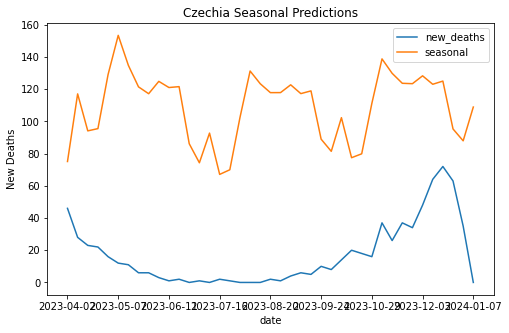

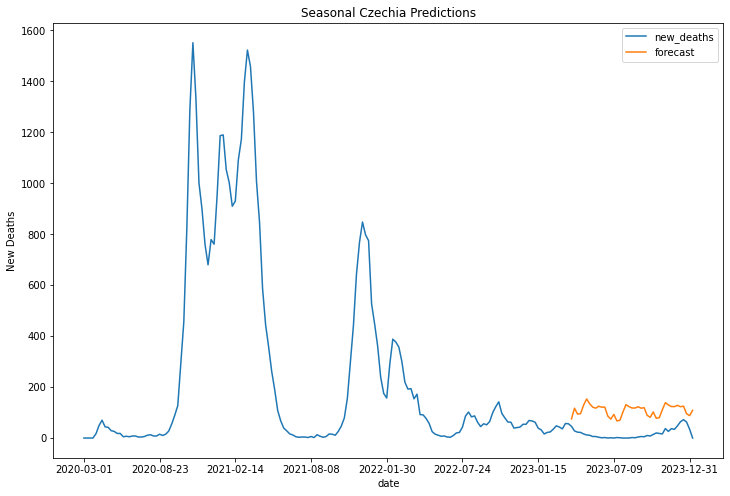

In [236]:
czech_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Czechia Seasonal Predictions')
plt.ylabel('New Deaths')

czech['forecast']=model_fit.predict(start=train_size, end=201, dynamic=True)
czech[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Seasonal Czechia Predictions')
plt.ylabel('New Deaths')

## Estonia Models - arima, gs arima, sarima 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16490D+00    |proj g|=  3.89608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   2.561D-06   4.165D+00
  F =   4.1648859939985323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.17918D+00    |proj g|=  4.67700D-02

At iterate   10    f=  4.16301D+00    |proj g|=  3.34045D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   1.507D-05   4.163D+00
  F =   4.1630139383199998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17097D+00    |proj g|=  1.12378D-02

At iterate    5    f=  4.16470D+00    |proj g|=  1.72169D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      8      1     0     0   2.780D-06   4.165D+00
  F =   4.1647042482953367     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22299D+00    |proj g|=  2.93762D-01

At iterate    5    f=  4.18114D+00    |proj g|=  6.17711D-02

At iterate   10    f=  4.16310D+00    |proj g|=  2.14213D-03

At iterate   15    f=  4.16299D+00    |proj g|=  5.03751D-03

At iterate   20    f=  4.16297D+00    |proj g|=  6.73150D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   6.732D-07   4.163D+00
  F =   4.1629721780474531     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.16288D+00    |proj g|=  6.74842D-03

At iterate   10    f=  4.16239D+00    |proj g|=  1.52190D-03

At iterate   15    f=  4.16234D+00    |proj g|=  7.01180D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   2.518D-06   4.162D+00
  F =   4.1623380358302162     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21949D+00    |proj g|=  2.95390D-01

At iterate    5    f=  4.17916D+00    |proj g|=  9.56278D-02

At iterate   10    f=  4.15706D+00    |proj g|=  6.02747D-03

At iterate   15    f=  4.15577D+00    |proj g|=  3.91394D-03

At iterate   20    f=  4.15536D+00    |proj g|=  2.50946D-03

At iterate   25    f=  4.15516D+00    |proj g|=  1.09067D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     32      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.02711D+00    |proj g|=  1.92304D-01

At iterate    5    f=  3.98746D+00    |proj g|=  2.45018D-02

At iterate   10    f=  3.98626D+00    |proj g|=  1.44906D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   1.449D-06   3.986D+00
  F =   3.9862613161309652     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.02516D+00    |proj g|=  1.87430D-01

At iterate    5    f=  3.99189D+00    |proj g|=  2.46008D-02

At iterate   10    f=  3.98632D+00    |proj g|=  1.71333D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   8.415D-06   3.986D+00
  F =   3.9863226312846431     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  3.98138D+00    |proj g|=  2.08597D-03

At iterate   15    f=  3.98135D+00    |proj g|=  1.26475D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   1.248D-05   3.981D+00
  F =   3.9813425155717970     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01548D+00    |proj g|=  1.71120D-01

At iterate    5    f=  3.98493D+00    |proj g|=  2.76184D-02


 This problem is unconstrained.



At iterate   10    f=  3.98019D+00    |proj g|=  6.49935D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   9.301D-06   3.980D+00
  F =   3.9801901849036936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01673D+00    |proj g|=  1.73424D-01

At iterate    5    f=  3.98693D+00    |proj g|=  1.90917D-02


 This problem is unconstrained.



At iterate   10    f=  3.98031D+00    |proj g|=  2.71364D-03

At iterate   15    f=  3.98004D+00    |proj g|=  6.17388D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   9.555D-06   3.980D+00
  F =   3.9799749586902351     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05677D+00    |proj g|=  2.88406D-01

At iterate    5    f=  3.98726D+00    |proj g|=  1.44282D-02

At iterate   10    f=  3.97677D+00    |proj g|=  7.53582D-03

At iterate   15    f=  3.97600D+00    |proj g|=  1.33533D-02

At iterate   20    f=  3.97564D+00    |proj g|=  7.75559D-04

At iterate   25    f=  3.97556D+00    |proj g|=  2.98641D-03

At iterate   30    f=  3.97551D+00    |proj g|=  3.76287D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97497D+00    |proj g|=  1.07455D-01

At iterate    5    f=  3.95756D+00    |proj g|=  4.67389D-02

At iterate   10    f=  3.95453D+00    |proj g|=  9.14602D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   9.146D-06   3.955D+00
  F =   3.9545295561928646     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  3.95771D+00    |proj g|=  3.26375D-02

At iterate   10    f=  3.95103D+00    |proj g|=  4.39273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   4.080D-06   3.951D+00
  F =   3.9510290273225674     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97558D+00    |proj g|=  1.06639D-01

At iterate    5    f=  3.95715D+00    |proj g|=  4.73179D-02

At iterate   10    f=  3.95443D+00    |proj g|=  1.48545D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   6.998D-07   3.954D+00
  F =   3.9544292074223257     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  3.95910D+00    |proj g|=  3.60563D-02

At iterate   10    f=  3.95099D+00    |proj g|=  1.60955D-03

At iterate   15    f=  3.95090D+00    |proj g|=  5.30619D-03

At iterate   20    f=  3.95087D+00    |proj g|=  1.17180D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     25      1     0     0   4.538D-06   3.951D+00
  F =   3.9508671271082649     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97244D+00    |proj g|=  1.10238D-01

At iterate    5    f=  3.95493D+00    |proj g|=  4.01266D-02

At iterate   10    f=  3.95026D+00    |proj g|=  3.26330D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   6.321D-07   3.950D+00
  F =   3.9502564092079564     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  3.95015D+00    |proj g|=  1.19197D-04

At iterate   15    f=  3.95015D+00    |proj g|=  8.88243D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     19      1     0     0   3.058D-06   3.950D+00
  F =   3.9501464143869667     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99118D+00    |proj g|=  2.06989D-01


 This problem is unconstrained.



At iterate    5    f=  3.95767D+00    |proj g|=  4.04465D-02

At iterate   10    f=  3.94841D+00    |proj g|=  2.15717D-03

At iterate   15    f=  3.94835D+00    |proj g|=  4.84884D-03

At iterate   20    f=  3.94819D+00    |proj g|=  2.95593D-03

At iterate   25    f=  3.94795D+00    |proj g|=  4.94219D-03

At iterate   30    f=  3.94776D+00    |proj g|=  6.69404D-03

At iterate   35    f=  3.94770D+00    |proj g|=  6.64547D-04

At iterate   40    f=  3.94768D+00    |proj g|=  3.15239D-03

At iterate   45    f=  3.94766D+00    |proj g|=  5.11601D-04

At iterate   50    f=  3.94766D+00    |proj g|=  1.61495D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00393D+00    |proj g|=  1.77052D-01

At iterate    5    f=  3.97736D+00    |proj g|=  1.39067D-03

At iterate   10    f=  3.97732D+00    |proj g|=  3.02049D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   1.075D-06   3.977D+00
  F =   3.9773204198613903     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98107D+00    |proj g|=  1.57660D-02

At iterate    5    f=  3.98091D+00    |proj g|=  1.06816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   5.008D-06   3.981D+00
  F =   3.9809023936472552     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00025D+00    |proj g|=  1.80963D-01

At iterate    5    f=  3.97790D+00    |proj g|=  1.08428D-02

At iterate   10    f=  3.97725D+00    |proj g|=  1.42729D-04

At iterate   15    f=  3.97724D+00    |proj g|=  1.60458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   4.243D-06   3.977D+00
  F =   3.9772446117484104     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97737D+00    |proj g|=  2.83167D-02

At iterate    5    f=  3.97657D+00    |proj g|=  4.37790D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   1.597D-07   3.977D+00
  F =   3.9765565018197515     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   10    f=  3.97648D+00    |proj g|=  1.64537D-04

At iterate   15    f=  3.97648D+00    |proj g|=  1.51363D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   8.634D-06   3.976D+00
  F =   3.9764812574892665     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99786D+00    |proj g|=  1.86854D-01

At iterate    5    f=  3.97609D+00    |proj g|=  2.32409D-02

At iterate   10    f=  3.97469D+00    |proj g|=  1.96080D-03

At iterate   15    f=  3.97455D+00    |proj g|=  4.44695D-03

At iterate   20    f=  3.97446D+00    |proj g|=  6.76550D-04

At iterate   25    f=  3.97446D+00    |proj g|=  5.55537D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     28      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00245D+00    |proj g|=  2.18007D-01

At iterate    5    f=  3.96371D+00    |proj g|=  2.47700D-02


 This problem is unconstrained.



At iterate   10    f=  3.95667D+00    |proj g|=  6.00553D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     17      1     0     0   3.670D-05   3.957D+00
  F =   3.9566344625684380     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97349D+00    |proj g|=  4.21850D-02

At iterate    5    f=  3.96442D+00    |proj g|=  3.42281D-02

At iterate   10    f=  3.96133D+00    |proj g|=  1.48623D-04

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.96689D+00    |proj g|=  2.78793D-02

At iterate   10    f=  3.96124D+00    |proj g|=  1.04121D-03

At iterate   15    f=  3.96119D+00    |proj g|=  7.26424D-03

At iterate   20    f=  3.96094D+00    |proj g|=  3.75099D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     25      1     0     0   2.099D-05   3.961D+00
  F =   3.9609392913559618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  3.96456D+00    |proj g|=  2.75227D-02

At iterate   10    f=  3.95652D+00    |proj g|=  1.48582D-03

At iterate   15    f=  3.95650D+00    |proj g|=  7.42679D-04

At iterate   20    f=  3.95650D+00    |proj g|=  1.38343D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   1.383D-06   3.957D+00
  F =   3.9565021992827316     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  3.95563D+00    |proj g|=  3.52384D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     16      1     0     0   4.828D-05   3.956D+00
  F =   3.9556302630921962     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96723D+00    |proj g|=  3.54168D-02

At iterate    5    f=  3.96166D+00    |proj g|=  4.15728D-02


 This problem is unconstrained.



At iterate   10    f=  3.95554D+00    |proj g|=  4.01139D-03

At iterate   15    f=  3.95551D+00    |proj g|=  3.03522D-03

At iterate   20    f=  3.95550D+00    |proj g|=  1.06498D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   4.524D-05   3.955D+00
  F =   3.9554969903162278     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99463D+00    |proj g|=  2.31333D-01


 This problem is unconstrained.



At iterate    5    f=  3.96134D+00    |proj g|=  2.87113D-02

At iterate   10    f=  3.95353D+00    |proj g|=  7.71985D-03

At iterate   15    f=  3.95342D+00    |proj g|=  6.25241D-03

At iterate   20    f=  3.95327D+00    |proj g|=  1.05249D-03

At iterate   25    f=  3.95318D+00    |proj g|=  2.69126D-03

At iterate   30    f=  3.95314D+00    |proj g|=  8.72748D-04

At iterate   35    f=  3.95314D+00    |proj g|=  1.69234D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     39      1     0     0   2.213D-05   3.953D+00
  F =   3.9531421036808059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97653D+00    |proj g|=  8.87181D-02

At iterate    5    f=  3.95953D+00    |proj g|=  7.12805D-02

At iterate   10    f=  3.95341D+00    |proj g|=  5.34737D-03

At iterate   15    f=  3.95325D+00    |proj g|=  2.71756D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   3.629D-06   3.953D+00
  F =   3.9532480933415157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  3.96031D+00    |proj g|=  3.83208D-02

At iterate   10    f=  3.95028D+00    |proj g|=  2.81261D-03

At iterate   15    f=  3.95018D+00    |proj g|=  5.24167D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   1.149D-05   3.950D+00
  F =   3.9501487337476537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97695D+00    |proj g|=  8.82033D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97623D+00    |proj g|=  8.95096D-02

At iterate    5    f=  3.95919D+00    |proj g|=  5.76975D-02

At iterate   10    f=  3.95286D+00    |proj g|=  4.25086D-03


 This problem is unconstrained.



At iterate   15    f=  3.95243D+00    |proj g|=  1.31564D-03

At iterate   20    f=  3.95239D+00    |proj g|=  6.13019D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     26      1     0     0   1.669D-06   3.952D+00
  F =   3.9523854282632005     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99705D+00    |proj g|=  2.08694D-01


 This problem is unconstrained.



At iterate    5    f=  3.96112D+00    |proj g|=  4.80929D-02

At iterate   10    f=  3.95026D+00    |proj g|=  2.79929D-03

At iterate   15    f=  3.94996D+00    |proj g|=  4.18264D-03

At iterate   20    f=  3.94993D+00    |proj g|=  1.24489D-03

At iterate   25    f=  3.94993D+00    |proj g|=  1.82314D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     28      1     0     0   1.823D-05   3.950D+00
  F =   3.9499263340004269     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  3.94949D+00    |proj g|=  1.85564D-03

At iterate   15    f=  3.94942D+00    |proj g|=  2.40665D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     21      1     0     0   3.053D-05   3.949D+00
  F =   3.9494068809365861     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97157D+00    |proj g|=  9.27412D-02


 This problem is unconstrained.



At iterate    5    f=  3.95684D+00    |proj g|=  4.96680D-02

At iterate   10    f=  3.94933D+00    |proj g|=  1.75245D-03

At iterate   15    f=  3.94927D+00    |proj g|=  2.92132D-03

At iterate   20    f=  3.94926D+00    |proj g|=  1.98401D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     23      1     0     0   1.984D-05   3.949D+00
  F =   3.9492609321138565     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  3.95905D+00    |proj g|=  5.63840D-02

At iterate   10    f=  3.94761D+00    |proj g|=  7.09961D-03

At iterate   15    f=  3.94748D+00    |proj g|=  5.48202D-03

At iterate   20    f=  3.94724D+00    |proj g|=  1.81939D-03

At iterate   25    f=  3.94690D+00    |proj g|=  4.14146D-03

At iterate   30    f=  3.94679D+00    |proj g|=  8.85595D-03

At iterate   35    f=  3.94641D+00    |proj g|=  1.49908D-02

At iterate   40    f=  3.94626D+00    |proj g|=  3.86758D-03

At iterate   45    f=  3.94624D+00    |proj g|=  4.85861D-04

At iterate   50    f=  3.94624D+00    |proj g|=  7.64231D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98213D+00    |proj g|=  1.69361D-01

At iterate    5    f=  3.95584D+00    |proj g|=  1.86438D-03

At iterate   10    f=  3.95574D+00    |proj g|=  1.21625D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   3.817D-06   3.956D+00
  F =   3.9557386516153348     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96067D+00    |proj g|=  1.86022D-02

At iterate    5    f=  3.96043D+00    |proj g|=  3.09850D-03

At iterate   10    f=  3.96041D+00    |proj g|=  8.58518D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   8.585D-06   3.960D+00
  F =   3.9604090772684861     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97846D+00    |proj g|=  1.75334D-01

At iterate    5    f=  3.95652D+00    |proj g|=  1.13735D-02

At iterate   10    f=  3.95564D+00    |proj g|=  2.39308D-04

At iterate   15    f=  3.95564D+00    |proj g|=  3.57797D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     20      1     0     0   1.053D-05   3.956D+00
  F =   3.9556387014820049     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95620D+00    |proj g|=  3.98843D-02

At iterate    5    f=  3.95479D+00    |proj g|=  4.20504D-03

At iterate   10    f=  3.95473D+00    |proj g|=  7.12399D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     13      1     0     0   7.124D-06   3.955D+00
  F =   3.9547318555547939     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95566D+00    |proj g|=  2.28297D-02

At iterate    5    f=  3.95484D+00    |proj g|=  1.02357D-02

At iterate   10    f=  3.95467D+00    |proj g|=  6.88287D-04

At iterate   15    f=  3.95466D+00    |proj g|=  1.32704D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   8.268D-06   3.955D+00
  F =   3.9546610748062303     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  3.95353D+00    |proj g|=  2.23364D-02

At iterate   10    f=  3.95283D+00    |proj g|=  1.26484D-03

At iterate   15    f=  3.95256D+00    |proj g|=  6.55074D-03

At iterate   20    f=  3.95247D+00    |proj g|=  3.32236D-03

At iterate   25    f=  3.95235D+00    |proj g|=  3.07989D-03

At iterate   30    f=  3.95232D+00    |proj g|=  1.00124D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     35      1     0     0   8.233D-05   3.952D+00
  F =   3.9523222039392283     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97183D+00    |proj g|=  3.25704D-02

At iterate    5    f=  3.96126D+00    |proj g|=  1.06823D-02

At iterate   10    f=  3.95958D+00    |proj g|=  1.73681D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   1.645D-05   3.960D+00
  F =   3.9595749496021519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  3.96202D+00    |proj g|=  2.48972D-02

At iterate   10    f=  3.95549D+00    |proj g|=  7.47426D-03

At iterate   15    f=  3.95494D+00    |proj g|=  9.36842D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     22      1     0     0   4.089D-05   3.955D+00
  F =   3.9549343921274311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97195D+00    |proj g|=  3.22659D-02

At iterate    5    f=  3.96156D+00    |proj g|=  2.61623D-02

At iterate   10    f=  3.95957D+00    |proj g|=  1.10338D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     15      1     0     0   9.035D-06   3.960D+00
  F =   3.9595731627250967     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  3.96290D+00    |proj g|=  4.75626D-02

At iterate   10    f=  3.95613D+00    |proj g|=  6.31701D-03

At iterate   15    f=  3.95485D+00    |proj g|=  8.28057D-03

At iterate   20    f=  3.95482D+00    |proj g|=  5.53557D-04

At iterate   25    f=  3.95481D+00    |proj g|=  3.17229D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     29      1     0     0   3.172D-05   3.955D+00
  F =   3.9548117201110027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  3.95445D+00    |proj g|=  1.43332D-02

At iterate   15    f=  3.95393D+00    |proj g|=  3.80936D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   1.232D-05   3.954D+00
  F =   3.9539320703972871     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96576D+00    |proj g|=  3.34549D-02

At iterate    5    f=  3.95912D+00    |proj g|=  6.30931D-02


 This problem is unconstrained.



At iterate   10    f=  3.95466D+00    |proj g|=  1.26465D-02

At iterate   15    f=  3.95384D+00    |proj g|=  4.43687D-04

At iterate   20    f=  3.95383D+00    |proj g|=  4.70526D-04

At iterate   25    f=  3.95383D+00    |proj g|=  4.07892D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     29      1     0     0   4.079D-05   3.954D+00
  F =   3.9538282998248708     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99254D+00    |proj g|=  2.28362D-01

At iterate    5    f=  3.95842D+00    |proj g|=  5.45049D-02

At iterate   10    f=  3.95287D+00    |proj g|=  8.67795D-03

At iterate   15    f=  3.95171D+00    |proj g|=  1.27606D-03

At iterate   20    f=  3.95165D+00    |proj g|=  3.75201D-03

At iterate   25    f=  3.95160D+00    |proj g|=  8.34699D-04

At iterate   30    f=  3.95151D+00    |proj g|=  3.34231D-03

At iterate   35    f=  3.95145D+00    |proj g|=  1.36037D-03

At iterate   40    f=  3.95144D+00    |proj g|=  2.33592D-04

At iterate   45    f=  3.95144D+00    |proj g|=  5.77367D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97972D+00    |proj g|=  1.30530D-01

At iterate    5    f=  3.96566D+00    |proj g|=  7.99726D-02

At iterate   10    f=  3.95427D+00    |proj g|=  1.04058D-02

At iterate   15    f=  3.95344D+00    |proj g|=  1.10063D-02

At iterate   20    f=  3.95314D+00    |proj g|=  1.50733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   1.081D-06   3.953D+00
  F =   3.9531421250197281     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00503D+00    |proj g|=  2.04224D-01

At iterate    5    f=  3.96376D+00    |proj g|=  2.73263D-02

At iterate   10    f=  3.95159D+00    |proj g|=  9.97204D-03

At iterate   15    f=  3.95090D+00    |proj g|=  1.05861D-02

At iterate   20    f=  3.94996D+00    |proj g|=  5.38978D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     26      1     0     0   5.419D-05   3.950D+00
  F =   3.9499590682076016     

CONVERG

 This problem is unconstrained.



At iterate   20    f=  3.95287D+00    |proj g|=  2.93404D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     23      1     0     0   5.585D-06   3.953D+00
  F =   3.9528712706476381     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97947D+00    |proj g|=  1.29061D-01


 This problem is unconstrained.



At iterate    5    f=  3.96563D+00    |proj g|=  7.46945D-02

At iterate   10    f=  3.95378D+00    |proj g|=  8.27659D-03

At iterate   15    f=  3.95303D+00    |proj g|=  6.60649D-03

At iterate   20    f=  3.95227D+00    |proj g|=  1.46345D-03

At iterate   25    f=  3.95225D+00    |proj g|=  1.03050D-03

At iterate   30    f=  3.95224D+00    |proj g|=  1.37828D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     33      1     0     0   1.465D-05   3.952D+00
  F =   3.9522361524042924     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  3.96412D+00    |proj g|=  4.04623D-02

At iterate   10    f=  3.95148D+00    |proj g|=  1.38432D-02

At iterate   15    f=  3.95085D+00    |proj g|=  5.77381D-03

At iterate   20    f=  3.94973D+00    |proj g|=  1.03631D-03

At iterate   25    f=  3.94973D+00    |proj g|=  3.95394D-04

At iterate   30    f=  3.94973D+00    |proj g|=  1.48317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     37      1     0     0   1.133D-05   3.950D+00
  F =   3.9497264027221290     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97514D+00    |proj g|=  1.34694D-01

At iterate    5    f=  3.96063D+00    |proj g|=  4.32427D-02

At iterate   10    f=  3.95074D+00    |proj g|=  5.72737D-03

At iterate   15    f=  3.94974D+00    |proj g|=  1.46436D-02

At iterate   20    f=  3.94921D+00    |proj g|=  6.27072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     27      1     0     0   8.403D-06   3.949D+00
  F =   3.9492064643278426     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97417D+00    |proj g|=  1.30742D-01

At iterate    5    f=  3.96123D+00    |proj g|=  4.01356D-02

At iterate   10    f=  3.95113D+00    |proj g|=  1.36873D-02

At iterate   15    f=  3.95044D+00    |proj g|=  4.40482D-03

At iterate   20    f=  3.94916D+00    |proj g|=  6.26743D-03

At iterate   25    f=  3.94906D+00    |proj g|=  8.07432D-04

At iterate   30    f=  3.94906D+00    |proj g|=  1.99856D-04

At iterate   35    f=  3.94906D+00    |proj g|=  4.66968D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99842D+00    |proj g|=  2.19926D-01

At iterate    5    f=  3.95578D+00    |proj g|=  6.02764D-02

At iterate   10    f=  3.94894D+00    |proj g|=  4.24298D-03

At iterate   15    f=  3.94797D+00    |proj g|=  9.52058D-03

At iterate   20    f=  3.94710D+00    |proj g|=  3.75356D-03

At iterate   25    f=  3.94703D+00    |proj g|=  3.61887D-03

At iterate   30    f=  3.94666D+00    |proj g|=  3.16531D-03

At iterate   35    f=  3.94644D+00    |proj g|=  2.88201D-03

At iterate   40    f=  3.94626D+00    |proj g|=  3.38809D-03

At iterate   45    f=  3.94620D+00    |proj g|=  6.17459D-03

At iterate   50    f=  3.94614D+00    |proj g|=  1.49125D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97497D+00    |proj g|=  1.07455D-01

At iterate    5    f=  3.95756D+00    |proj g|=  4.67389D-02

At iterate   10    f=  3.95453D+00    |proj g|=  9.14602D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   9.146D-06   3.955D+00
  F =   3.9545295561928646     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


Text(0, 0.5, 'New Deaths')

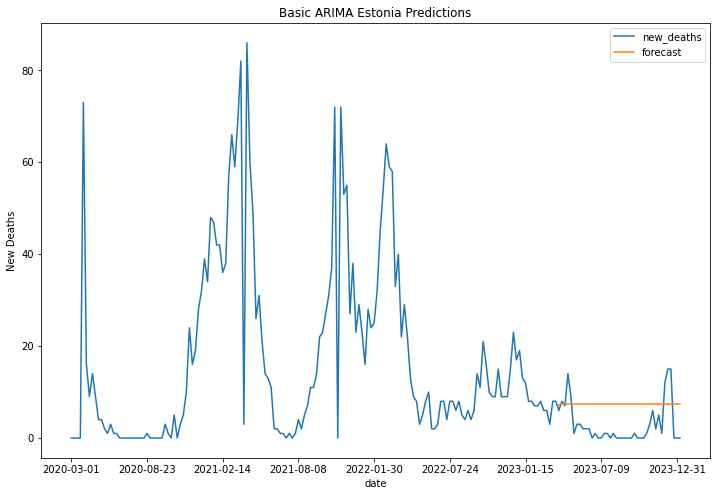

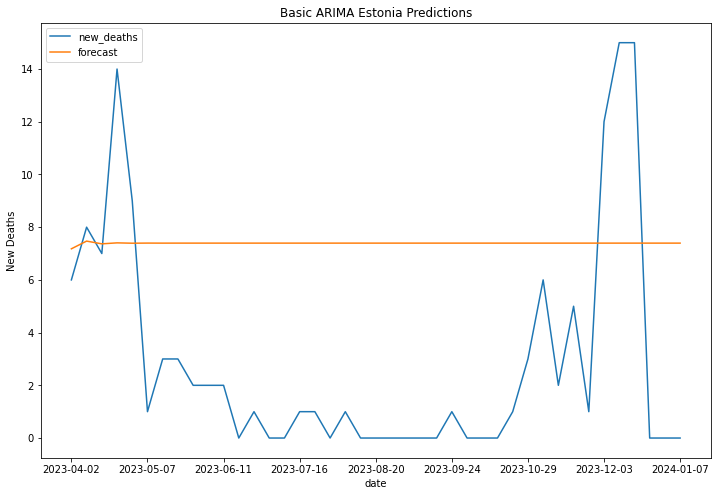

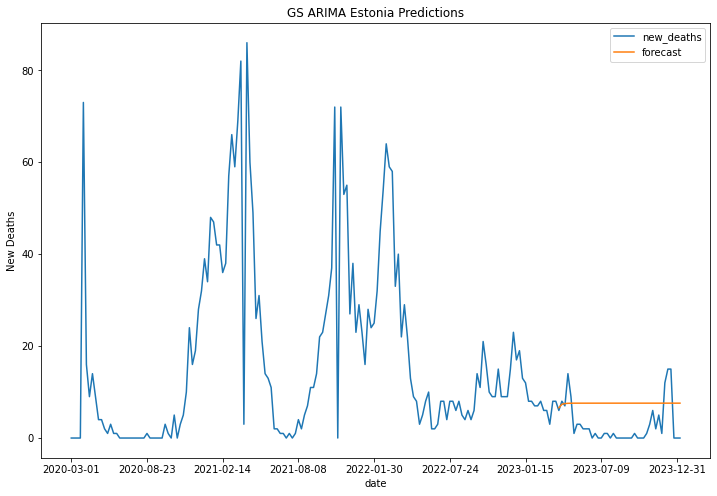

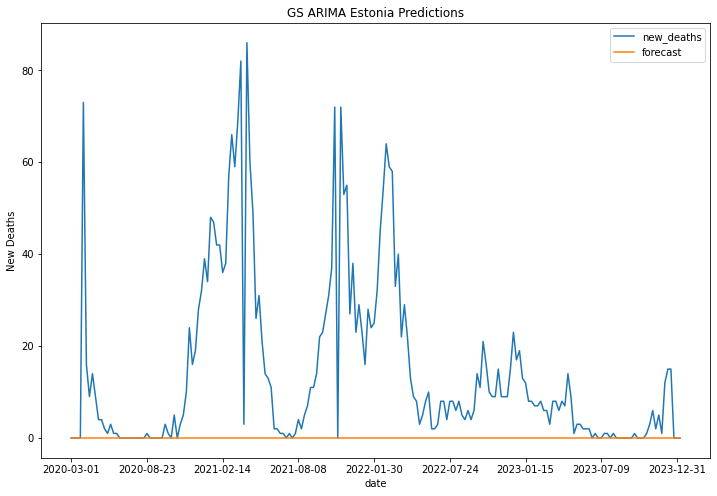

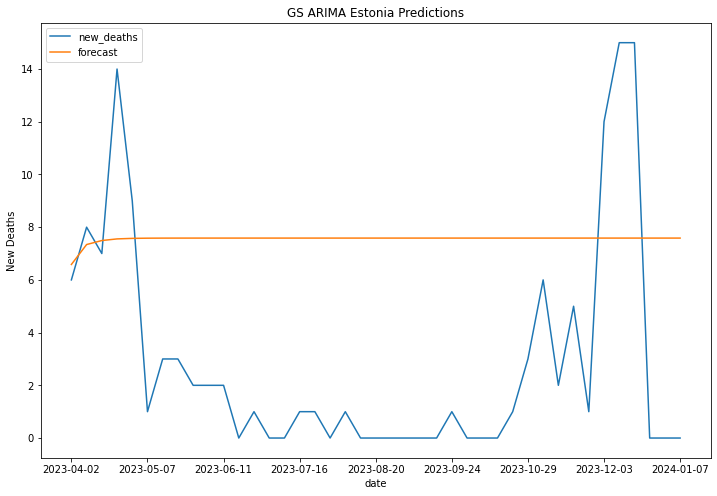

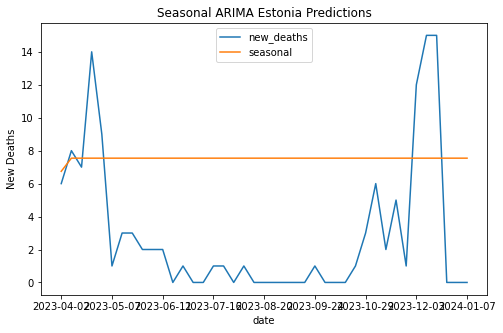

In [271]:
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(eston_train['new_deaths'],order=(1,1,1))
emodel_fit=model.fit()

eston['forecast']=emodel_fit.predict(start=161,end=202,dynamic=True)

eston[['new_deaths','forecast']].plot(figsize=(12,8))
eston_test['forecast']=emodel_fit.predict(start=161,end=202,dynamic=True)
plt.title('Basic ARIMA Estonia Predictions')
plt.ylabel('New Deaths')
eston_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Estonia Predictions')
plt.ylabel('New Deaths')
actuals = eston_test['new_deaths']  
predictions = eston_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a eston',mae, mase]


results = []
for p in range(0,3):
    for q in range(0,3):
        model=ARIMA(eston_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model=ARIMA(eston_train['new_deaths'],order=(p,1,q))
e_model_fit=model.fit()


eston['forecast']=e_model_fit.predict(start=161,end=202,dynamic=True)
eston[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Estonia Predictions')
plt.ylabel('New Deaths')

eston['forecast']=e_model_fit.predict(start=0,end=202,dynamic=True)
eston[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Estonia Predictions')
plt.ylabel('New Deaths')

eston_test['forecast']=e_model_fit.predict(start=161,end=202,dynamic=True)
eston_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Estonia Predictions')
plt.ylabel('New Deaths')
actuals = eston_test['new_deaths']  
predictions = eston_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched eston',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(eston_train['new_deaths'],order=(p,1,q), seasonal_order=(P,0,Q,13)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(eston_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,0,Q,13))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
eston_test['seasonal'] = pred
mae = mean_absolute_error(eston_test['new_deaths'], eston_test['seasonal'])
mase = mean_absolute_scaled_error(eston_test['new_deaths'], eston_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal eston',mae, mase]


eston_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Estonia Predictions')
plt.ylabel('New Deaths')

In [238]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188
2,gs seasonal czech,92.005714,15.207556
3,base a eston,5.808277,2.833306
4,grid searched eston,5.931483,2.893406
5,gs seasonal eston,5.902175,2.879110


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11517D+00    |proj g|=  2.00158D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      2      1     0     0   6.519D-07   7.115D+00
  F =   7.1151625691434388     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.9

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     22      1     0     0   6.322D-06   7.115D+00
  F =   7.1148798582065700     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.12635D+00    |proj g|=  1.37261D+00

At iterate    5    f=  8.92837D+00    |proj g|=  1.32074D-01

At iterate   10    f=  7.32675D+00    |proj g|=  2.32076D-03
  ys=-3.336E-02  -gs= 7.068E-03 BFGS update SKIPPED

At iterate   15    f=  7.16496D+00    |proj g|=  6.50241D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     33      1     1     0   1.095D-06   7.165D+00
  F =   7.1649366652355093     

CONVERGENCE: NORM

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.89417D+00    |proj g|=  2.84021D-01

At iterate   10    f=  7.12021D+00    |proj g|=  5.11121D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   4.780D-07   7.115D+00
  F =   7.1151600242612529     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.13429D+00    |proj g|=  1.37806D+00


 This problem is unconstrained.



At iterate    5    f=  8.89753D+00    |proj g|=  4.42754D-01

At iterate   10    f=  8.25690D+00    |proj g|=  8.52537D-02

At iterate   15    f=  7.11035D+00    |proj g|=  9.99393D-03

At iterate   20    f=  7.09429D+00    |proj g|=  1.23637D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   3.137D-06   7.094D+00
  F =   7.0942879472627878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  7.09504D+00    |proj g|=  3.40168D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   7.352D-06   7.094D+00
  F =   7.0943882410623225     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91528D+00    |proj g|=  5.18908D-01

At iterate    5    f=  7.85710D+00    |proj g|=  1.25751D-01

At iterate   10    f=  7.47432D+00    |proj g|=  3.15411D-01

At iterate   15    f=  7.24241D+00    |proj g|=  1.66737D-01

At iterate   20    f=  7.09592D+00    |proj g|=  9.78475D-03

At iterate   25    f=  7.09439D+00    |proj g|=  6.71066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     31      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.24155D+00    |proj g|=  1.51107D+00

At iterate    5    f=  8.96745D+00    |proj g|=  7.31810D-01

At iterate   10    f=  8.46686D+00    |proj g|=  1.17854D+00

At iterate   15    f=  7.58084D+00    |proj g|=  2.88345D+00

At iterate   20    f=  7.12577D+00    |proj g|=  3.44994D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     48      1     0     0   1.760D-01   7.113D+00
  F =   7.1134865391690036     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99697D+00    |proj g|=  1.94797D-01

At iterate    5    f=  6.82945D+00    |proj g|=  2.51641D-04

At iterate   10    f=  6.82942D+00    |proj g|=  4.77647D-03

At iterate   15    f=  6.82853D+00    |proj g|=  5.98360D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     20      1     0     0   4.131D-06   6.828D+00
  F =   6.8284953586512502     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.82779D+00    |proj g|=  2.46669D-03

At iterate   15    f=  6.82714D+00    |proj g|=  1.70672D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   3.951D-06   6.827D+00
  F =   6.8267050814990133     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99362D+00    |proj g|=  1.86616D-01


 This problem is unconstrained.



At iterate    5    f=  6.82291D+00    |proj g|=  1.43939D-02

At iterate   10    f=  6.82264D+00    |proj g|=  1.20872D-03

At iterate   15    f=  6.82216D+00    |proj g|=  1.48936D-02

At iterate   20    f=  6.82108D+00    |proj g|=  1.39887D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   3.560D-06   6.821D+00
  F =   6.8210828908918497     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99720D+00    |proj g|=  1.90891D-01

At iterate    5    f=  6.82822D+00    |proj g|=  2.63430D-04

At iterate   10    f=  6.82813D+00    |proj g|=  7.46060D-03

At iterate   15    f=  6.82720D+00    |proj g|=  5.02117D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     23      1     0     0   1.993D-06   6.827D+00
  F =   6.8271687036316271     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   20    f=  6.82329D+00    |proj g|=  2.99001D-03

At iterate   25    f=  6.82250D+00    |proj g|=  6.35138D-03

At iterate   30    f=  6.82244D+00    |proj g|=  7.36327D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     40      1     0     0   7.363D-06   6.822D+00
  F =   6.8224350135528820     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99344D+00    |proj g|=  1.86252D-01


 This problem is unconstrained.



At iterate    5    f=  6.82336D+00    |proj g|=  2.83038D-02

At iterate   10    f=  6.82242D+00    |proj g|=  3.59956D-03

At iterate   15    f=  6.82228D+00    |proj g|=  5.83065D-04

At iterate   20    f=  6.82224D+00    |proj g|=  5.37964D-03

At iterate   25    f=  6.82091D+00    |proj g|=  1.72776D-02

At iterate   30    f=  6.82070D+00    |proj g|=  8.08187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   4.522D-06   6.821D+00
  F =   6.8206965584065644     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04478D+00    |proj g|=  3.51040D-01

At iterate    5    f=  6.82318D+00    |proj g|=  2.66025D-02

At iterate   10    f=  6.82260D+00    |proj g|=  9.12912D-04

At iterate   15    f=  6.82220D+00    |proj g|=  1.60857D-02

At iterate   20    f=  6.82105D+00    |proj g|=  4.41365D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   3.778D-06   6.821D+00
  F =   6.8210461435690686     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  6.82368D+00    |proj g|=  3.31415D-02

At iterate   10    f=  6.82220D+00    |proj g|=  2.12716D-03

At iterate   15    f=  6.82210D+00    |proj g|=  3.22506D-04

At iterate   20    f=  6.82209D+00    |proj g|=  1.58381D-03

At iterate   25    f=  6.82109D+00    |proj g|=  1.84786D-02

At iterate   30    f=  6.82051D+00    |proj g|=  1.68616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     38      1     0     0   3.066D-05   6.821D+00
  F =   6.8205050583897631     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99128D+00    |proj g|=  1.84394D-01

At iterate    5    f=  6.82213D+00    |proj g|=  8.17691D-03

At iterate   10    f=  6.82201D+00    |proj g|=  4.15574D-03

At iterate   15    f=  6.82187D+00    |proj g|=  1.51695D-03

At iterate   20    f=  6.82177D+00    |proj g|=  5.43680D-03

At iterate   25    f=  6.82164D+00    |proj g|=  3.40494D-04

At iterate   30    f=  6.82158D+00    |proj g|=  4.18064D-03

At iterate   35    f=  6.82097D+00    |proj g|=  5.83159D-03

At iterate   40    f=  6.82008D+00    |proj g|=  5.38230D-03

At iterate   45    f=  6.82003D+00    |proj g|=  1.05238D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.70293D+00    |proj g|=  4.84622D-04

At iterate   10    f=  6.70277D+00    |proj g|=  1.01646D-02

At iterate   15    f=  6.70097D+00    |proj g|=  1.15899D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   5.447D-05   6.701D+00
  F =   6.7008080868669948     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72280D+00    |proj g|=  1.68279D-01


 This problem is unconstrained.



At iterate    5    f=  6.69352D+00    |proj g|=  3.72405D-04

At iterate   10    f=  6.69350D+00    |proj g|=  4.17853D-03

At iterate   15    f=  6.69255D+00    |proj g|=  1.56271D-02

At iterate   20    f=  6.69225D+00    |proj g|=  3.59943D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   3.599D-06   6.692D+00
  F =   6.6922451409566888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71921D+00    |proj g|=  1.06419D-01

At iterate    5    f=  6.70312D+00    |proj g|=  4.87040D-04

At iterate   10    f=  6.70296D+00    |proj g|=  1.19086D-02

At iterate   15    f=  6.70113D+00    |proj g|=  1.11798D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   2.079D-05   6.701D+00
  F =   6.7009797133751308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  6.69815D+00    |proj g|=  3.49503D-03

At iterate   15    f=  6.69813D+00    |proj g|=  1.90355D-03

At iterate   20    f=  6.69733D+00    |proj g|=  1.10871D-02

At iterate   25    f=  6.69653D+00    |proj g|=  2.45814D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   4.529D-06   6.697D+00
  F =   6.6965298882604012     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  6.69337D+00    |proj g|=  2.71843D-03

At iterate   10    f=  6.69299D+00    |proj g|=  3.42746D-03

At iterate   15    f=  6.69292D+00    |proj g|=  4.01870D-03

At iterate   20    f=  6.69184D+00    |proj g|=  1.03441D-02

At iterate   25    f=  6.69175D+00    |proj g|=  2.68702D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     31      1     0     0   3.133D-06   6.692D+00
  F =   6.6917539904682357     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70920D+00    |proj g|=  1.06188D-01

At iterate    5    f=  6.69287D+00    |proj g|=  3.63501D-04

At iterate   10    f=  6.69283D+00    |proj g|=  6.31620D-03

At iterate   15    f=  6.69198D+00    |proj g|=  1.75387D-02

At iterate   20    f=  6.69166D+00    |proj g|=  1.33923D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.339D-05   6.692D+00
  F =   6.6916567189934701     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  6.69240D+00    |proj g|=  4.21569D-03

At iterate   10    f=  6.69174D+00    |proj g|=  2.35286D-03

At iterate   15    f=  6.69173D+00    |proj g|=  1.63846D-03

At iterate   20    f=  6.69141D+00    |proj g|=  1.75875D-02

At iterate   25    f=  6.69062D+00    |proj g|=  4.93517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     31      1     0     0   2.976D-05   6.691D+00
  F =   6.6906199608457335     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72712D+00    |proj g|=  1.96934D-01

At iterate    5    f=  6.69151D+00    |proj g|=  8.76389D-03

At iterate   10    f=  6.69062D+00    |proj g|=  2.24309D-02

At iterate   15    f=  6.69024D+00    |proj g|=  1.94402D-03

At iterate   20    f=  6.69012D+00    |proj g|=  8.01089D-04

At iterate   25    f=  6.69011D+00    |proj g|=  1.43859D-03

At iterate   30    f=  6.68979D+00    |proj g|=  9.07678D-03

At iterate   35    f=  6.68918D+00    |proj g|=  3.58655D-03

At iterate   40    f=  6.68917D+00    |proj g|=  3.24033D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77307D+00    |proj g|=  1.20849D-01

At iterate    5    f=  6.76369D+00    |proj g|=  9.56264D-05

At iterate   10    f=  6.76367D+00    |proj g|=  3.29452D-03

At iterate   15    f=  6.76357D+00    |proj g|=  6.25332D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   7.913D-06   6.764D+00
  F =   6.7635734984039093     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.76904D+00    |proj g|=  1.47835D-02

At iterate   10    f=  6.76634D+00    |proj g|=  6.28265D-03

At iterate   15    f=  6.76620D+00    |proj g|=  6.96885D-05

At iterate   20    f=  6.76620D+00    |proj g|=  8.17136D-04

At iterate   25    f=  6.76614D+00    |proj g|=  8.75760D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     30      1     0     0   1.065D-06   6.766D+00
  F =   6.7661401990657231     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  6.76365D+00    |proj g|=  1.40112D-03

At iterate   10    f=  6.76357D+00    |proj g|=  6.52241D-04

At iterate   15    f=  6.76356D+00    |proj g|=  5.40473D-04

At iterate   20    f=  6.76349D+00    |proj g|=  3.33343D-03

At iterate   25    f=  6.76345D+00    |proj g|=  6.57270D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   6.113D-05   6.763D+00
  F =   6.7634484561557411     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76627D+00    |proj g|=  5.33292D-02

At iterate    5    f=  6.76330D+00    |proj g|=  1.00337D-04

At iterate   10    f=  6.76329D+00    |proj g|=  3.15009D-03

At iterate   15    f=  6.76318D+00    |proj g|=  3.54228D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   7.332D-06   6.763D+00
  F =   6.7631731530635175     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76455D+00    |proj g|=  3.55558D-02

At iterate    5    f=  6.76321D+00    |proj g|=  6.68019D-04

At iterate   10    f=  6.76317D+00    |proj g|=  1.00001D-03

At iterate   15    f=  6.76316D+00    |proj g|=  4.34174D-04

At iterate   20    f=  6.76310D+00    |proj g|=  3.61247D-03

At iterate   25    f=  6.76304D+00    |proj g|=  7.00731D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  6.76284D+00    |proj g|=  1.61714D-03

At iterate   10    f=  6.76250D+00    |proj g|=  5.54090D-03

At iterate   15    f=  6.76242D+00    |proj g|=  4.42197D-03

At iterate   20    f=  6.76240D+00    |proj g|=  1.12274D-04

At iterate   25    f=  6.76240D+00    |proj g|=  1.03581D-03

At iterate   30    f=  6.76227D+00    |proj g|=  3.26040D-03

At iterate   35    f=  6.76224D+00    |proj g|=  1.25649D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     42      1     0     0   9.406D-05   6.762D+00
  F =   6.7622427290305813     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72641D+00    |proj g|=  3.68291D-02

At iterate    5    f=  6.72567D+00    |proj g|=  4.43569D-04

At iterate   10    f=  6.72555D+00    |proj g|=  8.49970D-03

At iterate   15    f=  6.72404D+00    |proj g|=  1.30363D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   2.945D-06   6.724D+00
  F =   6.7237831494111147     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  6.71973D+00    |proj g|=  7.94020D-04

At iterate   10    f=  6.71972D+00    |proj g|=  2.91050D-03

At iterate   15    f=  6.71880D+00    |proj g|=  1.65016D-02

At iterate   20    f=  6.71837D+00    |proj g|=  4.13797D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   9.255D-05   6.718D+00
  F =   6.7183684890937005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72739D+00    |proj g|=  7.37118D-02

At iterate    5    f=  6.72373D+00    |proj g|=  4.22168D-04

At iterate   10    f=  6.72368D+00    |proj g|=  7.82159D-03

At iterate   15    f=  6.72246D+00    |proj g|=  1.80987D-02

At iterate   20    f=  6.72202D+00    |proj g|=  3.40697D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   3.407D-05   6.722D+00
  F =   6.7220242117851283     

CONVERG

 This problem is unconstrained.



At iterate   15    f=  6.72063D+00    |proj g|=  3.05984D-03

At iterate   20    f=  6.71962D+00    |proj g|=  1.26511D-02

At iterate   25    f=  6.71924D+00    |proj g|=  1.22225D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     33      1     0     0   1.357D-06   6.719D+00
  F =   6.7192414242361913     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72910D+00    |proj g|=  1.01625D-01

At iterate    5    f=  6.71971D+00    |proj g|=  1.77789D-03

At iterate   10    f=  6.71949D+00    |proj g|=  2.34348D-03

At iterate   15    f=  6.71947D+00    |proj g|=  1.59861D-03

At iterate   20    f=  6.71875D+00    |proj g|=  2.55991D-02

At iterate   25    f=  6.71817D+00    |proj g|=  2.70291D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     31      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  6.71983D+00    |proj g|=  2.04972D-03

At iterate   15    f=  6.71926D+00    |proj g|=  1.76985D-02

At iterate   20    f=  6.71847D+00    |proj g|=  1.49383D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   1.786D-06   6.718D+00
  F =   6.7184684138386945     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72236D+00    |proj g|=  5.85937D-02

At iterate    5    f=  6.71958D+00    |proj g|=  1.73134D-03

At iterate   10    f=  6.71923D+00    |proj g|=  6.13657D-04

At iterate   15    f=  6.71922D+00    |proj g|=  1.69092D-03

At iterate   20    f=  6.71833D+00    |proj g|=  1.13079D-02

At iterate   25    f=  6.71793D+00    |proj g|=  4.36788D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     28      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73118D+00    |proj g|=  1.26778D-01

At iterate    5    f=  6.71933D+00    |proj g|=  6.87595D-03

At iterate   10    f=  6.71911D+00    |proj g|=  1.29424D-02

At iterate   15    f=  6.71877D+00    |proj g|=  6.33000D-04

At iterate   20    f=  6.71874D+00    |proj g|=  3.77689D-03

At iterate   25    f=  6.71871D+00    |proj g|=  1.12050D-03

At iterate   30    f=  6.71850D+00    |proj g|=  6.16270D-03

At iterate   35    f=  6.71780D+00    |proj g|=  1.18575D-02

At iterate   40    f=  6.71709D+00    |proj g|=  4.97532D-03

At iterate   45    f=  6.71702D+00    |proj g|=  3.34423D-04

At iterate   50    f=  6.71702D+00    |proj g|=  3.85736D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.69044D+00    |proj g|=  2.04454D-03

At iterate   10    f=  6.69038D+00    |proj g|=  6.56124D-03

At iterate   15    f=  6.68653D+00    |proj g|=  4.97235D-02

At iterate   20    f=  6.68300D+00    |proj g|=  1.17382D-03

At iterate   25    f=  6.68300D+00    |proj g|=  4.81455D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     27      1     0     0   4.815D-06   6.683D+00
  F =   6.6829979303690301     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  6.68394D+00    |proj g|=  9.98552D-03

At iterate   10    f=  6.68379D+00    |proj g|=  4.92520D-03

At iterate   15    f=  6.67984D+00    |proj g|=  3.86523D-02

At iterate   20    f=  6.67754D+00    |proj g|=  4.03642D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   3.370D-06   6.678D+00
  F =   6.6775367674335575     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70334D+00    |proj g|=  1.53806D-01

At iterate    5    f=  6.69089D+00    |proj g|=  2.37927D-03

At iterate   10    f=  6.69086D+00    |proj g|=  4.92902D-03

At iterate   15    f=  6.68768D+00    |proj g|=  4.91862D-02

At iterate   20    f=  6.68337D+00    |proj g|=  9.51797D-04

At iterate   25    f=  6.68337D+00    |proj g|=  1.21787D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  6.68671D+00    |proj g|=  9.28172D-04

At iterate   20    f=  6.68657D+00    |proj g|=  1.19289D-02

At iterate   25    f=  6.68115D+00    |proj g|=  2.31753D-02

At iterate   30    f=  6.68005D+00    |proj g|=  4.50201D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     36      1     0     0   6.471D-06   6.680D+00
  F =   6.6800483030745150     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70630D+00    |proj g|=  1.57542D-01

At iterate    5    f=  6.68384D+00    |proj g|=  7.02100D-03

At iterate   10    f=  6.68373D+00    |proj g|=  5.28623D-03

At iterate   15    f=  6.68356D+00    |proj g|=  8.92461D-04

At iterate   20    f=  6.68330D+00    |proj g|=  1.14461D-02

At iterate   25    f=  6.67874D+00    |proj g|=  1.95192D-02

At iterate   30    f=  6.67738D+00    |proj g|=  2.46523D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  6.68348D+00    |proj g|=  3.53118D-03

At iterate   10    f=  6.68345D+00    |proj g|=  4.03885D-03

At iterate   15    f=  6.68134D+00    |proj g|=  4.44912D-02

At iterate   20    f=  6.67724D+00    |proj g|=  8.23248D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   3.330D-05   6.677D+00
  F =   6.6772358372478404     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69578D+00    |proj g|=  1.47114D-01

At iterate    5    f=  6.68335D+00    |proj g|=  2.22262D-02

At iterate   10    f=  6.68299D+00    |proj g|=  7.16838D-03

At iterate   15    f=  6.68272D+00    |proj g|=  8.83055D-04

At iterate   20    f=  6.68263D+00    |proj g|=  9.12216D-03

At iterate   25    f=  6.67920D+00    |proj g|=  4.16562D-02

At iterate   30    f=  6.67667D+00    |proj g|=  3.62823D-04

At iterate   35    f=  6.67667D+00    |proj g|=  1.39710D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70962D+00    |proj g|=  1.72975D-01

At iterate    5    f=  6.68248D+00    |proj g|=  1.97399D-02

At iterate   10    f=  6.68156D+00    |proj g|=  1.63769D-02

At iterate   15    f=  6.68111D+00    |proj g|=  9.31118D-04

At iterate   20    f=  6.68092D+00    |proj g|=  1.02822D-02

At iterate   25    f=  6.68087D+00    |proj g|=  1.77211D-03

At iterate   30    f=  6.68039D+00    |proj g|=  9.90472D-03

At iterate   35    f=  6.67858D+00    |proj g|=  6.88530D-03

At iterate   40    f=  6.67534D+00    |proj g|=  5.59990D-03

At iterate   45    f=  6.67530D+00    |proj g|=  8.90572D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.69038D+00    |proj g|=  4.36273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     20      1     0     0   5.143D-05   6.690D+00
  F =   6.6903766409725902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69489D+00    |proj g|=  8.92643D-02



 This problem is unconstrained.


At iterate    5    f=  6.68805D+00    |proj g|=  1.09360D-04

At iterate   10    f=  6.68804D+00    |proj g|=  2.54636D-03

At iterate   15    f=  6.68793D+00    |proj g|=  3.46810D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   1.089D-06   6.688D+00
  F =   6.6879213538238691     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69353D+00    |proj g|=  6.63363D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      6      1     0     0   7.782D-05   6.691D+00
  F =   6.6908210712186698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.6

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69497D+00    |proj g|=  8.84891D-02

At iterate    5    f=  6.68803D+00    |proj g|=  7.73744D-04

At iterate   10    f=  6.68794D+00    |proj g|=  1.00726D-03

At iterate   15    f=  6.68793D+00    |proj g|=  3.09589D-04

At iterate   20    f=  6.68787D+00    |proj g|=  3.71055D-03

At iterate   25    f=  6.68781D+00    |proj g|=  1.63139D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     43      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69661D+00    |proj g|=  9.42644D-02

At iterate    5    f=  6.68810D+00    |proj g|=  1.08858D-04


 This problem is unconstrained.



At iterate   10    f=  6.68810D+00    |proj g|=  1.67751D-03

At iterate   15    f=  6.68800D+00    |proj g|=  4.00033D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   4.230D-05   6.688D+00
  F =   6.6879742893882579     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68951D+00    |proj g|=  5.15539D-02

At iterate    5    f=  6.68790D+00    |proj g|=  2.21150D-03

At iterate   10    f=  6.68769D+00    |proj g|=  6.04918D-04

At iterate   15    f=  6.68769D+00    |proj g|=  2.80418D-04

At iterate   20    f=  6.68762D+00    |proj g|=  3.40498D-03

At iterate   25    f=  6.68756D+00    |proj g|=  3.91207D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69690D+00    |proj g|=  1.14235D-01

At iterate    5    f=  6.68758D+00    |proj g|=  4.35183D-03

At iterate   10    f=  6.68684D+00    |proj g|=  1.77094D-03

At iterate   15    f=  6.68670D+00    |proj g|=  4.71278D-03

At iterate   20    f=  6.68663D+00    |proj g|=  1.25795D-04

At iterate   25    f=  6.68663D+00    |proj g|=  4.73222D-04

At iterate   30    f=  6.68662D+00    |proj g|=  2.12230D-03

At iterate   35    f=  6.68651D+00    |proj g|=  4.72641D-03

At iterate   40    f=  6.68646D+00    |proj g|=  9.93628D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68577D+00    |proj g|=  1.26591D-02

At iterate    5    f=  6.68492D+00    |proj g|=  1.25646D-03

At iterate   10    f=  6.68488D+00    |proj g|=  5.54636D-03

At iterate   15    f=  6.68206D+00    |proj g|=  3.29438D-02

At iterate   20    f=  6.68008D+00    |proj g|=  1.51344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   6.478D-06   6.680D+00
  F =   6.6800758579672053     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68798D+00    |proj g|=  9.35807D-02

At iterate    5    f=  6.68179D+00    |proj g|=  1.28326D-02

At iterate   10    f=  6.68160D+00    |proj g|=  1.34328D-03

At iterate   15    f=  6.68098D+00    |proj g|=  2.21926D-02

At iterate   20    f=  6.67730D+00    |proj g|=  7.17121D-03

At iterate   25    f=  6.67722D+00    |proj g|=  6.05759D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     30      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68639D+00    |proj g|=  4.89688D-02

At iterate    5    f=  6.68413D+00    |proj g|=  1.36508D-02

At iterate   10    f=  6.68371D+00    |proj g|=  9.53916D-03

At iterate   15    f=  6.67947D+00    |proj g|=  8.33100D-03

At iterate   20    f=  6.67925D+00    |proj g|=  1.61938D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   1.683D-06   6.679D+00
  F =   6.6792532035596679     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  6.68384D+00    |proj g|=  1.19570D-02

At iterate   10    f=  6.68323D+00    |proj g|=  1.54396D-02

At iterate   15    f=  6.68256D+00    |proj g|=  7.36234D-04

At iterate   20    f=  6.68119D+00    |proj g|=  1.18803D-02

At iterate   25    f=  6.67817D+00    |proj g|=  1.15234D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     31      1     0     0   2.702D-06   6.678D+00
  F =   6.6781663941171914     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68803D+00    |proj g|=  9.23290D-02

At iterate    5    f=  6.68181D+00    |proj g|=  1.07775D-02

At iterate   10    f=  6.68159D+00    |proj g|=  1.56126D-03

At iterate   15    f=  6.68083D+00    |proj g|=  1.24543D-02

At iterate   20    f=  6.67944D+00    |proj g|=  1.63501D-02

At iterate   25    f=  6.67912D+00    |proj g|=  9.43304D-04

At iterate   30    f=  6.67910D+00    |proj g|=  3.03085D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69097D+00    |proj g|=  1.10285D-01

At iterate    5    f=  6.68159D+00    |proj g|=  1.15641D-02

At iterate   10    f=  6.68136D+00    |proj g|=  1.82612D-03

At iterate   15    f=  6.68063D+00    |proj g|=  2.48656D-02

At iterate   20    f=  6.67707D+00    |proj g|=  6.84887D-03

At iterate   25    f=  6.67702D+00    |proj g|=  1.21217D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68322D+00    |proj g|=  2.83533D-02

At iterate    5    f=  6.68143D+00    |proj g|=  8.20357D-03

At iterate   10    f=  6.68130D+00    |proj g|=  1.81370D-03

At iterate   15    f=  6.68112D+00    |proj g|=  9.29925D-04

At iterate   20    f=  6.68082D+00    |proj g|=  9.02735D-03

At iterate   25    f=  6.67716D+00    |proj g|=  5.94000D-03

At iterate   30    f=  6.67698D+00    |proj g|=  8.53304D-04

At iterate   35    f=  6.67696D+00    |proj g|=  6.08837D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69035D+00    |proj g|=  1.22150D-01

At iterate    5    f=  6.68122D+00    |proj g|=  1.38674D-02

At iterate   10    f=  6.68050D+00    |proj g|=  4.78926D-03

At iterate   15    f=  6.67936D+00    |proj g|=  1.94880D-02

At iterate   20    f=  6.67890D+00    |proj g|=  3.42915D-03

At iterate   25    f=  6.67759D+00    |proj g|=  4.88590D-02

At iterate   30    f=  6.67601D+00    |proj g|=  3.89032D-02

At iterate   35    f=  6.67560D+00    |proj g|=  5.14110D-03

At iterate   40    f=  6.67558D+00    |proj g|=  2.00730D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     69      1     0     0   8.880D-03   6.676D+00
  F =   6.6755820409401796     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70752D+00    |proj g|=  1.57829D-01

At iterate    5    f=  6.69521D+00    |proj g|=  3.24469D-03

At iterate   10    f=  6.69389D+00    |proj g|=  4.99710D-02

At iterate   15    f=  6.69074D+00    |proj g|=  9.86532D-03

At iterate   20    f=  6.68886D+00    |proj g|=  3.36690D-02

At iterate   25    f=  6.67843D+00    |proj g|=  2.14782D-02

At iterate   30    f=  6.67811D+00    |proj g|=  3.44520D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70699D+00    |proj g|=  1.58152D-01

At iterate    5    f=  6.69342D+00    |proj g|=  2.45710D-03

At iterate   10    f=  6.69171D+00    |proj g|=  5.28395D-02

At iterate   15    f=  6.69072D+00    |proj g|=  1.61657D-03

At iterate   20    f=  6.68852D+00    |proj g|=  4.63851D-02

At iterate   25    f=  6.67705D+00    |proj g|=  4.44116D-02

At iterate   30    f=  6.67639D+00    |proj g|=  3.87819D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  6.68982D+00    |proj g|=  4.62594D-03

At iterate   10    f=  6.68585D+00    |proj g|=  2.11865D-02

At iterate   15    f=  6.68511D+00    |proj g|=  1.41709D-03

At iterate   20    f=  6.68109D+00    |proj g|=  3.78936D-02

At iterate   25    f=  6.67152D+00    |proj g|=  4.91436D-03

At iterate   30    f=  6.67148D+00    |proj g|=  1.59165D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     36      1     0     0   1.592D-05   6.671D+00
  F =   6.6714848918166672     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70827D+00    |proj g|=  1.57491D-01

At iterate    5    f=  6.69379D+00    |proj g|=  1.76409D-03

At iterate   10    f=  6.69299D+00    |proj g|=  3.68353D-02

At iterate   15    f=  6.69098D+00    |proj g|=  2.25044D-03

At iterate   20    f=  6.69022D+00    |proj g|=  6.72843D-03

At iterate   25    f=  6.67737D+00    |proj g|=  1.37756D-02

At iterate   30    f=  6.67681D+00    |proj g|=  2.08242D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70696D+00    |proj g|=  1.58162D-01

At iterate    5    f=  6.69336D+00    |proj g|=  1.03845D-02

At iterate   10    f=  6.69000D+00    |proj g|=  2.83034D-02

At iterate   15    f=  6.68885D+00    |proj g|=  1.16775D-02

At iterate   20    f=  6.68785D+00    |proj g|=  1.44349D-03

At iterate   25    f=  6.68709D+00    |proj g|=  1.06829D-02

At iterate   30    f=  6.67743D+00    |proj g|=  1.19439D-02

At iterate   35    f=  6.67598D+00    |proj g|=  1.89516D-02

At iterate   40    f=  6.67435D+00    |proj g|=  6.37565D-03

At iterate   45    f=  6.67390D+00    |proj g|=  4.12220D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  6.68956D+00    |proj g|=  1.59305D-02

At iterate   10    f=  6.68527D+00    |proj g|=  1.09694D-02

At iterate   15    f=  6.68509D+00    |proj g|=  1.41648D-03

At iterate   20    f=  6.68466D+00    |proj g|=  9.00327D-03

At iterate   25    f=  6.68401D+00    |proj g|=  1.62501D-02

At iterate   30    f=  6.67248D+00    |proj g|=  2.90549D-02

At iterate   35    f=  6.67146D+00    |proj g|=  6.30096D-04

At iterate   40    f=  6.67145D+00    |proj g|=  8.13765D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     45      1     0     0   1.963D-05   6.671D+00
  F =   6.67144894372

 This problem is unconstrained.



At iterate    5    f=  6.68923D+00    |proj g|=  9.90716D-03

At iterate   10    f=  6.68487D+00    |proj g|=  1.45613D-02

At iterate   15    f=  6.68452D+00    |proj g|=  1.40967D-03

At iterate   20    f=  6.68221D+00    |proj g|=  5.03310D-02

At iterate   25    f=  6.67115D+00    |proj g|=  9.06684D-03

At iterate   30    f=  6.67103D+00    |proj g|=  6.01756D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     35      1     0     0   4.495D-06   6.671D+00
  F =   6.6710257537076449     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  6.68887D+00    |proj g|=  1.58066D-02

At iterate   10    f=  6.68453D+00    |proj g|=  2.07460D-02

At iterate   15    f=  6.68419D+00    |proj g|=  1.75926D-03

At iterate   20    f=  6.68390D+00    |proj g|=  6.20351D-03

At iterate   25    f=  6.68269D+00    |proj g|=  2.63505D-02

At iterate   30    f=  6.67119D+00    |proj g|=  1.52348D-02

At iterate   35    f=  6.67078D+00    |proj g|=  1.42653D-03

At iterate   40    f=  6.67074D+00    |proj g|=  2.90131D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     50      1     0     0   9.191D-06   6.671D+00
  F =   6.67074195898

 This problem is unconstrained.



At iterate    5    f=  6.68730D+00    |proj g|=  3.47408D-02

At iterate   10    f=  6.68217D+00    |proj g|=  1.26365D-02

At iterate   15    f=  6.68193D+00    |proj g|=  3.59519D-03

At iterate   20    f=  6.68161D+00    |proj g|=  6.73512D-03

At iterate   25    f=  6.68152D+00    |proj g|=  6.90506D-03

At iterate   30    f=  6.68091D+00    |proj g|=  1.40307D-02

At iterate   35    f=  6.67870D+00    |proj g|=  4.18924D-02

At iterate   40    f=  6.67595D+00    |proj g|=  5.19653D-02

At iterate   45    f=  6.67547D+00    |proj g|=  1.34463D-02

At iterate   50    f=  6.67487D+00    |proj g|=  4.73257D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68577D+00    |proj g|=  1.26591D-02

At iterate    5    f=  6.68492D+00    |proj g|=  1.25646D-03

At iterate   10    f=  6.68488D+00    |proj g|=  5.54636D-03

At iterate   15    f=  6.68206D+00    |proj g|=  3.29438D-02

At iterate   20    f=  6.68008D+00    |proj g|=  1.51344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   6.478D-06   6.680D+00
  F =   6.6800758579672053     

CONVERG

Text(0, 0.5, 'New Deaths')

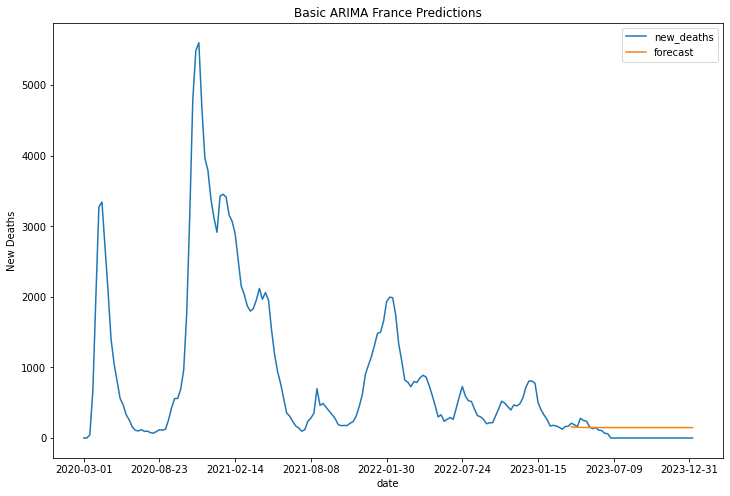

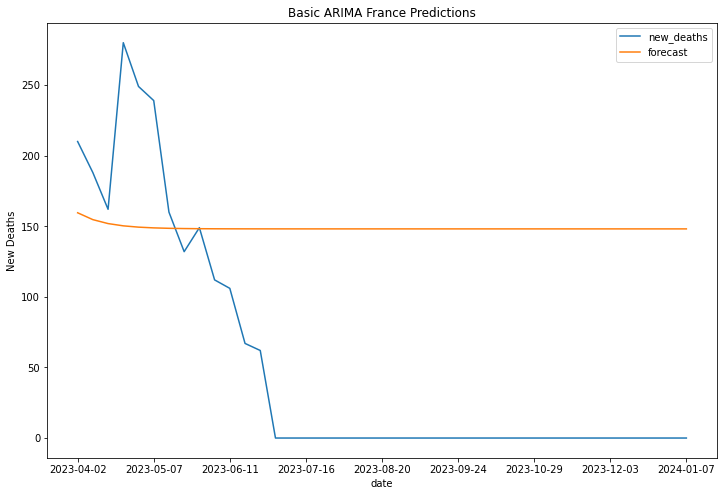

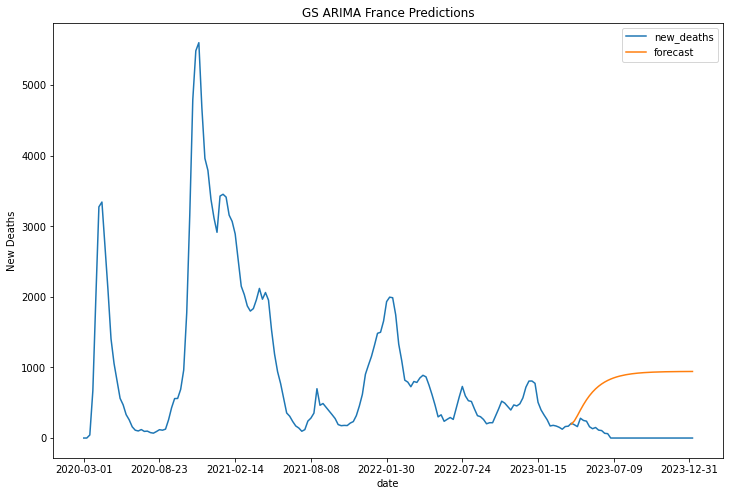

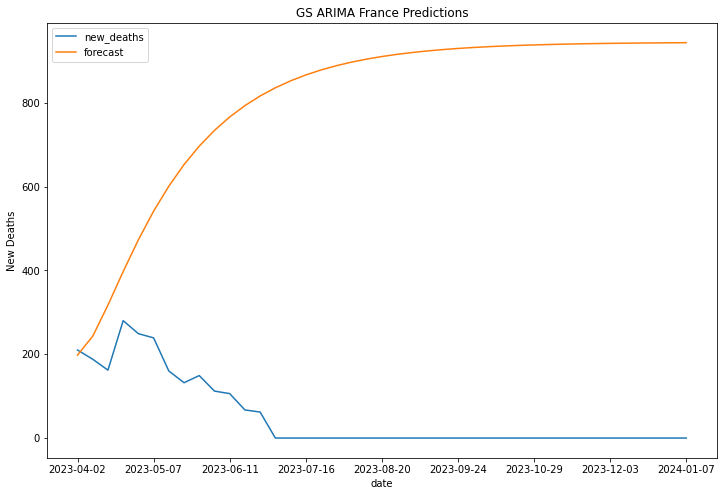

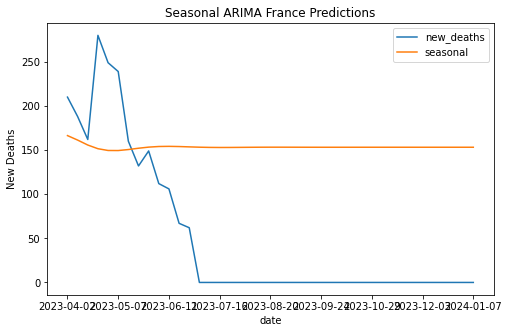

In [239]:
# franc 
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(franc_train['new_deaths'],order=(1,1,1))
fmodel_fit=model.fit()


franc['forecast']=fmodel_fit.predict(start=161,end=202,dynamic=True)
franc[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA France Predictions')
plt.ylabel('New Deaths')

franc_test['forecast']=fmodel_fit.predict(start=161,end=202,dynamic=True)
franc_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA France Predictions')
plt.ylabel('New Deaths')

actuals = franc_test['new_deaths']  
predictions = franc_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a franc',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(franc_train['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model=ARIMA(franc_train['new_deaths'],order=(p,1,q))
f_model_fit=model.fit()

franc['forecast']=f_model_fit.predict(start=161,end=202,dynamic=True)
franc[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA France Predictions')
plt.ylabel('New Deaths')
franc_test['forecast']=f_model_fit.predict(start=161,end=202,dynamic=True)
franc_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA France Predictions')
plt.ylabel('New Deaths')

actuals = franc_test['new_deaths']  
predictions = franc_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched franc',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(franc_train['new_deaths'],order=(p,1,q), seasonal_order=(P,0,Q,13)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(franc_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,0,Q,13))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
franc_test['seasonal'] = pred
mae = mean_absolute_error(franc_test['new_deaths'], franc_test['seasonal'])
mase = mean_absolute_scaled_error(franc_test['new_deaths'], franc_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal franc',mae, mase]


franc_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA France Predictions')
plt.ylabel('New Deaths')

In [240]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188
2,gs seasonal czech,92.005714,15.207556
3,base a eston,5.808277,2.833306
4,grid searched eston,5.931483,2.893406
5,gs seasonal eston,5.902175,2.879110
6,base a franc,117.930514,9.827543
7,grid searched franc,753.078087,62.756507
8,gs seasonal franc,121.606787,10.133899


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18306D+00    |proj g|=  5.11343D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   2.220D-09   6.183D+00
  F =   6.1830457905579177     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.2

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21248D+00    |proj g|=  1.16363D-01

At iterate    5    f=  6.20443D+00    |proj g|=  8.32954D-03


 This problem is unconstrained.



At iterate   10    f=  6.19376D+00    |proj g|=  1.18973D-01

At iterate   15    f=  6.17384D+00    |proj g|=  3.64883D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   2.922D-08   6.174D+00
  F =   6.1738383961529566     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18372D+00    |proj g|=  3.85721D-03

At iterate    5    f=  6.18369D+00    |proj g|=  5.94248D-03

At iterate   10    f=  6.18231D+00    |proj g|=  2.51723D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     16      1     0     0   3.109D-06   6.182D+00
  F =   6.1819928365980612     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21278D+00    |proj g|=  1.15104D-01

At iterate    5    f=  6.20439D+00    |proj g|=  1.24158D-02

At iterate   10    f=  6.19519D+00    |proj g|=  7.17030D-02

At iterate   15    f=  6.18188D+00    |proj g|=  7.15929D-04

At iterate   20    f=  6.18067D+00    |proj g|=  9.42811D-03

At iterate   25    f=  6.18059D+00    |proj g|=  3.89741D-05

At iterate   30    f=  6.18056D+00    |proj g|=  1.99425D-03

At iterate   35    f=  6.18045D+00    |proj g|=  6.98664D-03

At iterate   40    f=  6.18020D+00    |proj g|=  1.17523D-02

At iterate   45    f=  6.17914D+00    |proj g|=  7.01069D-02

At iterate   50    f=  6.17453D+00    |proj g|=  2.20457D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates s

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19566D+00    |proj g|=  7.46208D-02

At iterate    5    f=  6.19177D+00    |proj g|=  5.31936D-03


 This problem is unconstrained.



At iterate   10    f=  6.18898D+00    |proj g|=  1.27985D-02

At iterate   15    f=  6.18040D+00    |proj g|=  3.59701D-03

At iterate   20    f=  6.17968D+00    |proj g|=  4.15046D-02

At iterate   25    f=  6.17472D+00    |proj g|=  2.71362D-02

At iterate   30    f=  6.17411D+00    |proj g|=  3.29430D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     43      1     0     0   8.801D-06   6.174D+00
  F =   6.1741118481718376     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21114D+00    |proj g|=  1.00894D-01

At iterate    5    f=  6.20340D+00    |proj g|=  8.44663D-03

At iterate   10    f=  6.20138D+00    |proj g|=  2.51434D-02

At iterate   15    f=  6.18105D+00    |proj g|=  7.53233D-05

At iterate   20    f=  6.18088D+00    |proj g|=  9.41228D-04

At iterate   25    f=  6.18080D+00    |proj g|=  1.69629D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     60      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05951D+00    |proj g|=  2.45344D-01

At iterate    5    f=  6.02054D+00    |proj g|=  1.88686D-03

At iterate   10    f=  6.02022D+00    |proj g|=  9.31849D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     17      1     0     0   1.581D-06   6.020D+00
  F =   6.0201755378986910     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.01863D+00    |proj g|=  9.28684D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   3.847D-06   6.019D+00
  F =   6.0186299538623169     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05923D+00    |proj g|=  2.38564D-01

At iterate    5    f=  6.01279D+00    |proj g|=  5.24293D-04

At iterate   10    f=  6.01263D+00    |proj g|=  1.38658D-02

At iterate   15    f=  6.01199D+00    |proj g|=  1.25384D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   2.146D-05   6.012D+00
  F =   6.0119892762842992     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05752D+00    |proj g|=  2.43324D-01

At iterate    5    f=  6.01873D+00    |proj g|=  1.16234D-03

At iterate   10    f=  6.01838D+00    |proj g|=  9.63718D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   4.451D-06   6.018D+00
  F =   6.0182837504131941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  6.01275D+00    |proj g|=  3.68903D-03

At iterate   15    f=  6.01269D+00    |proj g|=  8.50203D-03

At iterate   20    f=  6.01201D+00    |proj g|=  6.51844D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     24      1     0     0   1.167D-05   6.012D+00
  F =   6.0119890391894950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05196D+00    |proj g|=  2.39364D-01

At iter

 This problem is unconstrained.


At iterate   10    f=  6.01274D+00    |proj g|=  1.98379D-02

At iterate   15    f=  6.01225D+00    |proj g|=  1.30591D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   9.231D-06   6.012D+00
  F =   6.0122546565121944     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05458D+00    |proj g|=  2.38413D-01

At iterate    5    f=  6.01304D+00    |proj g|=  6.04820D-04

At iterate   10    f=  6.01297D+00    |proj g|=  5.78678D-03

At iterate   15    f=  6.01290D+00    |proj g|=  5.94694D-03

At iterate   20    f=  6.01222D+00    |proj g|=  4.21803D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   2.213D-05   6.012D+00
  F =   6.0122121482694011     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05931D+00    |proj g|=  2.38974D-01

At iterate    5    f=  6.01297D+00    |proj g|=  2.44547D-03

At iterate   10    f=  6.01269D+00    |proj g|=  1.07234D-03

At iterate   15    f=  6.01268D+00    |proj g|=  3.68769D-03

At iterate   20    f=  6.01240D+00    |proj g|=  4.86180D-03

At iterate   25    f=  6.01212D+00    |proj g|=  1.15488D-02

At iterate   30    f=  6.01194D+00    |proj g|=  7.17928D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95749D+00    |proj g|=  8.82431D-02

At iterate    5    f=  5.95361D+00    |proj g|=  1.90299D-03

At iterate   10    f=  5.95329D+00    |proj g|=  8.66011D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   1.599D-05   5.953D+00
  F =   5.9532430045769598     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  5.94602D+00    |proj g|=  7.79156D-04

At iterate   10    f=  5.94578D+00    |proj g|=  1.29187D-02

At iterate   15    f=  5.94523D+00    |proj g|=  1.11484D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   4.583D-05   5.945D+00
  F =   5.9452326174003440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95374D+00    |proj g|=  8.34570D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95470D+00    |proj g|=  7.46010D-02

At iterate    5    f=  5.95012D+00    |proj g|=  7.74301D-03

At iterate   10    f=  5.94742D+00    |proj g|=  1.29433D-02

At iterate   15    f=  5.94722D+00    |proj g|=  1.18877D-03

At iterate   20    f=  5.94696D+00    |proj g|=  1.44918D-02

At iterate   25    f=  5.94656D+00    |proj g|=  3.68842D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     32      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.94608D+00    |proj g|=  7.77141D-04

At iterate   10    f=  5.94596D+00    |proj g|=  4.90456D-03

At iterate   15    f=  5.94590D+00    |proj g|=  5.82237D-03

At iterate   20    f=  5.94524D+00    |proj g|=  2.84087D-03

At iterate   25    f=  5.94522D+00    |proj g|=  1.78102D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   3.964D-06   5.945D+00
  F =   5.9452216419888684     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.


At iterate   10    f=  5.94583D+00    |proj g|=  1.56654D-02

At iterate   15    f=  5.94539D+00    |proj g|=  3.98209D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   4.790D-05   5.945D+00
  F =   5.9453941392220715     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95202D+00    |proj g|=  8.42539D-02

At iterate    5    f=  5.94616D+00    |proj g|=  5.55633D-04

At iterate   10    f=  5.94606D+00    |proj g|=  4.99109D-03

At iterate   15    f=  5.94602D+00    |proj g|=  1.49527D-03

At iterate   20    f=  5.94560D+00    |proj g|=  1.16746D-02

At iterate   25    f=  5.94535D+00    |proj g|=  3.87483D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     31      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95586D+00    |proj g|=  9.03513D-02

At iterate    5    f=  5.94614D+00    |proj g|=  6.56495D-04

At iterate   10    f=  5.94603D+00    |proj g|=  9.39195D-03

At iterate   15    f=  5.94581D+00    |proj g|=  1.45027D-03

At iterate   20    f=  5.94578D+00    |proj g|=  4.98749D-03

At iterate   25    f=  5.94572D+00    |proj g|=  1.05854D-03

At iterate   30    f=  5.94561D+00    |proj g|=  6.55331D-03

At iterate   35    f=  5.94538D+00    |proj g|=  3.26041D-03

At iterate   40    f=  5.94515D+00    |proj g|=  3.54431D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98367D+00    |proj g|=  2.88023D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   6.162D-05   5.984D+00
  F =   5.9836645868749532     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.9

 This problem is unconstrained.



At iterate    5    f=  5.97677D+00    |proj g|=  2.15857D-04

At iterate   10    f=  5.97669D+00    |proj g|=  7.17047D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   6.298D-06   5.977D+00
  F =   5.9766462503722986     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98115D+00    |proj g|=  2.71845D-02

At iterate    5    f=  5.98080D+00    |proj g|=  5.25265D-04

At iterate   10    f=  5.98076D+00    |proj g|=  1.76404D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   6.344D-06   5.981D+00
  F =   5.9807604223512651     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  5.97678D+00    |proj g|=  4.16431D-04

At iterate   10    f=  5.97675D+00    |proj g|=  2.59694D-04

At iterate   15    f=  5.97674D+00    |proj g|=  2.53484D-03

At iterate   20    f=  5.97664D+00    |proj g|=  1.08270D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     23      1     0     0   1.877D-05   5.977D+00
  F =   5.9766437491103268     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97886D+00    |proj g|=  5.82873D-02

At iterate    5    f=  5.97698D+00    |proj g|=  2.10312D-04

At iterate   10    f=  5.97696D+00    |proj g|=  3.95346D-03

At iterate   15    f=  5.97687D+00    |proj g|=  1.95843D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   8.676D-06   5.977D+00
  F =   5.9768714684781887     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97996D+00    |proj g|=  5.53919D-02

At iterate    5    f=  5.97691D+00    |proj g|=  2.12197D-04

At iterate   10    f=  5.97689D+00    |proj g|=  1.15490D-03

At iterate   15    f=  5.97681D+00    |proj g|=  3.69802D-03

At iterate   20    f=  5.97679D+00    |proj g|=  4.60210D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     22      1     0     0   4.602D-06   5.977D+00
  F =   5.9767881000781466     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98453D+00    |proj g|=  9.39824D-02

At iterate    5    f=  5.97687D+00    |proj g|=  1.10956D-03

At iterate   10    f=  5.97673D+00    |proj g|=  6.55327D-04

At iterate   15    f=  5.97670D+00    |proj g|=  1.93285D-03

At iterate   20    f=  5.97669D+00    |proj g|=  5.46061D-04

At iterate   25    f=  5.97667D+00    |proj g|=  1.88996D-03

At iterate   30    f=  5.97665D+00    |proj g|=  2.10782D-03

At iterate   35    f=  5.97659D+00    |proj g|=  2.87486D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.97175D+00    |proj g|=  4.37697D-03

At iterate   15    f=  5.97147D+00    |proj g|=  5.20580D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     24      1     0     0   5.558D-06   5.971D+00
  F =   5.9714480894721831     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97476D+00    |proj g|=  1.05094D-01

At iterate    5    f=  5.96729D+00    |proj g|=  6.96864D-04

At iterate   10    f=  5.96727D+00    |proj g|=  4.46171D-03

At iterate   15    f=  5.96686D+00    |proj g|=  9.90718D-03

At iterate   20    f=  5.96675D+00    |proj g|=  2.42091D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   2.421D-06   5.967D+00
  F =   5.9667502274909117     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97527D+00    |proj g|=  8.54163D-02

At iterate    5    f=  5.97193D+00    |proj g|=  5.20863D-03

At iterate   10    f=  5.96918D+00    |proj g|=  1.73587D-03


 This problem is unconstrained.



At iterate   15    f=  5.96918D+00    |proj g|=  1.11223D-03

At iterate   20    f=  5.96895D+00    |proj g|=  7.37765D-03

At iterate   25    f=  5.96878D+00    |proj g|=  7.36597D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   2.022D-05   5.969D+00
  F =   5.9687797720039271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97487D+00    |proj g|=  1.03315D-01

At iterate    5    f=  5.96731D+00    |proj g|=  8.28207D-04

At iterate   10    f=  5.96724D+00    |proj g|=  2.05550D-03

At iterate   15    f=  5.96706D+00    |proj g|=  1.04772D-02

At iterate   20    f=  5.96675D+00    |proj g|=  3.27597D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   1.826D-05   5.967D+00
  F =   5.9667480542334239     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  5.96750D+00    |proj g|=  4.17703D-03

At iterate   15    f=  5.96707D+00    |proj g|=  8.70941D-03

At iterate   20    f=  5.96699D+00    |proj g|=  5.74645D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   5.746D-05   5.967D+00
  F =   5.9669937815199399     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97038D+00    |proj g|=  5.20203D-02

At iterate    5    f=  5.96745D+00    |proj g|=  9.64385D-04

At iterate   10    f=  5.96744D+00    |proj g|=  2.39125D-03

At iterate   15    f=  5.96735D+00    |proj g|=  2.41972D-03

At iterate   20    f=  5.96733D+00    |proj g|=  4.29911D-03

At iterate   25    f=  5.96693D+00    |proj g|=  4.86387D-03

At iterate   30    f=  5.96691D+00    |proj g|=  1.21906D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  5.96740D+00    |proj g|=  1.30977D-03

At iterate   10    f=  5.96726D+00    |proj g|=  6.98614D-03

At iterate   15    f=  5.96718D+00    |proj g|=  2.33750D-03

At iterate   20    f=  5.96714D+00    |proj g|=  4.63938D-04

At iterate   25    f=  5.96708D+00    |proj g|=  3.09373D-03

At iterate   30    f=  5.96669D+00    |proj g|=  1.18677D-03

At iterate   35    f=  5.96669D+00    |proj g|=  1.64200D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     41      1     0     0   1.043D-04   5.967D+00
  F =   5.9666858879478193     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.94787D+00    |proj g|=  2.58742D-02

At iterate   10    f=  5.94735D+00    |proj g|=  9.66237D-04

At iterate   15    f=  5.94708D+00    |proj g|=  1.30545D-02

At iterate   20    f=  5.94667D+00    |proj g|=  4.54217D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     26      1     0     0   3.370D-05   5.947D+00
  F =   5.9466682859693352     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95890D+00    |proj g|=  1.05304D-01

At iterate    5    f=  5.94432D+00    |proj g|=  1.83662D-02

At iterate   10    f=  5.94396D+00    |proj g|=  1.12253D-03

At iterate   15    f=  5.94349D+00    |proj g|=  1.54870D-02

At iterate   20    f=  5.94306D+00    |proj g|=  2.57905D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   5.282D-06   5.943D+00
  F =   5.9430603659453771     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95701D+00    |proj g|=  1.07468D-01

At iterate    5    f=  5.94693D+00    |proj g|=  1.82368D-02

At iterate   10    f=  5.94676D+00    |proj g|=  3.78266D-03

At iterate   15    f=  5.94615D+00    |proj g|=  1.03342D-02

At iterate   20    f=  5.94607D+00    |proj g|=  4.43753D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   4.438D-05   5.946D+00
  F =   5.9460683240075376     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95761D+00    |proj g|=  9.69952D-02

At iterate    5    f=  5.94800D+00    |proj g|=  2.75505D-02

At iterate   10    f=  5.94687D+00    |proj g|=  1.49078D-02

At iterate   15    f=  5.94497D+00    |proj g|=  1.30938D-03

At iterate   20    f=  5.94495D+00    |proj g|=  3.80030D-03

At iterate   25    f=  5.94447D+00    |proj g|=  1.42700D-02

At iterate   30    f=  5.94420D+00    |proj g|=  6.50784D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95907D+00    |proj g|=  1.05470D-01

At iterate    5    f=  5.94496D+00    |proj g|=  3.24520D-02

At iterate   10    f=  5.94401D+00    |proj g|=  6.30930D-04

At iterate   15    f=  5.94390D+00    |proj g|=  5.55063D-03

At iterate   20    f=  5.94386D+00    |proj g|=  7.33095D-04

At iterate   25    f=  5.94364D+00    |proj g|=  9.08379D-03

At iterate   30    f=  5.94306D+00    |proj g|=  2.31039D-03

At iterate   35    f=  5.94305D+00    |proj g|=  1.52337D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  5.94414D+00    |proj g|=  6.39515D-03

At iterate   10    f=  5.94407D+00    |proj g|=  1.57792D-03

At iterate   15    f=  5.94357D+00    |proj g|=  1.67811D-02

At iterate   20    f=  5.94319D+00    |proj g|=  4.15880D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   4.159D-05   5.943D+00
  F =   5.9431884587847952     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.94466D+00    |proj g|=  2.25974D-02

At iterate   10    f=  5.94408D+00    |proj g|=  6.86138D-04

At iterate   15    f=  5.94392D+00    |proj g|=  5.27096D-03

At iterate   20    f=  5.94387D+00    |proj g|=  3.45370D-03

At iterate   25    f=  5.94338D+00    |proj g|=  1.17004D-02

At iterate   30    f=  5.94316D+00    |proj g|=  2.10883D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     37      1     0     0   1.127D-04   5.943D+00
  F =   5.9431584663338164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.94482D+00    |proj g|=  2.98454D-02

At iterate   10    f=  5.94405D+00    |proj g|=  5.94988D-04

At iterate   15    f=  5.94381D+00    |proj g|=  8.61956D-03

At iterate   20    f=  5.94370D+00    |proj g|=  7.08172D-04

At iterate   25    f=  5.94361D+00    |proj g|=  7.35231D-03

At iterate   30    f=  5.94349D+00    |proj g|=  1.91440D-03

At iterate   35    f=  5.94336D+00    |proj g|=  2.00842D-03

At iterate   40    f=  5.94325D+00    |proj g|=  7.58089D-03

At iterate   45    f=  5.94298D+00    |proj g|=  1.20368D-03

At iterate   50    f=  5.94298D+00    |proj g|=  1.20911D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96700D+00    |proj g|=  2.87899D-03

At iterate    5    f=  5.96699D+00    |proj g|=  1.52152D-03

At iterate   10    f=  5.96696D+00    |proj g|=  4.07686D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   4.261D-06   5.967D+00
  F =   5.9669548095720115     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96649D+00    |proj g|=  1.00492D-01

At iterate    5    f=  5.95950D+00    |proj g|=  2.95009D-04

At iterate   10    f=  5.95944D+00    |proj g|=  7.06842D-03

At iterate   15    f=  5.95929D+00    |proj g|=  3.98044D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   1.799D-06   5.959D+00
  F =   5.9592858410402041     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96407D+00    |proj g|=  3.59639D-02

At iterate    5    f=  5.96344D+00    |proj g|=  2.76565D-04

At iterate   10    f=  5.96341D+00    |proj g|=  5.11725D-03

At iterate   15    f=  5.96334D+00    |proj g|=  5.11704D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   1.073D-06   5.963D+00
  F =   5.9633425236125559     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.


At iterate   15    f=  5.96129D+00    |proj g|=  1.53201D-03

At iterate   20    f=  5.96117D+00    |proj g|=  4.67616D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   4.617D-06   5.961D+00
  F =   5.9611481524823349     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96662D+00    |proj g|=  9.87052D-02

At iterate    5    f=  5.95953D+00    |proj g|=  1.61621D-03

At iterate   10    f=  5.95949D+00    |proj g|=  2.84090D-04

At iterate   15    f=  5.95947D+00    |proj g|=  2.75349D-03

At iterate   20    f=  5.95930D+00    |proj g|=  3.79026D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     32      1     0     0   2.698D-05   5.959D+00
  F =   5.9592857575745342     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96182D+00    |proj g|=  5.78994D-02

At iterate    5    f=  5.95973D+00    |proj g|=  2.89170D-04

At iterate   10    f=  5.95968D+00    |proj g|=  6.14481D-03

At iterate   15    f=  5.95952D+00    |proj g|=  2.63584D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   1.011D-04   5.960D+00
  F =   5.9595209169167358     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.95967D+00    |proj g|=  5.42196D-04

At iterate   10    f=  5.95964D+00    |proj g|=  1.62143D-03

At iterate   15    f=  5.95963D+00    |proj g|=  3.11649D-03

At iterate   20    f=  5.95948D+00    |proj g|=  5.25705D-03

At iterate   25    f=  5.95945D+00    |proj g|=  4.54818D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     28      1     0     0   4.548D-06   5.959D+00
  F =   5.9594486244282860     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96643D+00    |proj g|=  8.52938D-02

At iterate    5    f=  5.95963D+00    |proj g|=  1.10884D-03

At iterate   10    f=  5.95947D+00    |proj g|=  5.37898D-03

At iterate   15    f=  5.95943D+00    |proj g|=  1.56174D-03

At iterate   20    f=  5.95940D+00    |proj g|=  2.72127D-04

At iterate   25    f=  5.95940D+00    |proj g|=  1.83623D-03

At iterate   30    f=  5.95931D+00    |proj g|=  2.25408D-03

At iterate   35    f=  5.95923D+00    |proj g|=  2.02471D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47431D+00    |proj g|=  1.02512D+00

At iterate    5    f=  5.96483D+00    |proj g|=  1.20520D-02

At iterate   10    f=  5.96402D+00    |proj g|=  4.83258D-03

At iterate   15    f=  5.96207D+00    |proj g|=  2.92469D-03

At iterate   20    f=  5.96084D+00    |proj g|=  3.74929D-03

At iterate   25    f=  5.96033D+00    |proj g|=  2.09434D-04

At iterate   30    f=  5.96023D+00    |proj g|=  1.84476D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46317D+00    |proj g|=  1.01767D+00

At iterate    5    f=  5.96539D+00    |proj g|=  2.17436D-02

At iterate   10    f=  5.96030D+00    |proj g|=  5.21352D-04

At iterate   15    f=  5.95936D+00    |proj g|=  3.72041D-02

At iterate   20    f=  5.95650D+00    |proj g|=  1.15811D-02

At iterate   25    f=  5.95607D+00    |proj g|=  1.00452D-04

At iterate   30    f=  5.95607D+00    |proj g|=  1.93415D-03

At iterate   35    f=  5.95605D+00    |proj g|=  2.08084D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46653D+00    |proj g|=  1.00762D+00

At iterate    5    f=  5.95855D+00    |proj g|=  9.87647D-03

At iterate   10    f=  5.95781D+00    |proj g|=  1.71760D-03

At iterate   15    f=  5.95626D+00    |proj g|=  2.62125D-02

At iterate   20    f=  5.95231D+00    |proj g|=  1.58082D-03

At iterate   25    f=  5.95231D+00    |proj g|=  6.93253D-04

At iterate   30    f=  5.95226D+00    |proj g|=  2.58186D-03

At iterate   35    f=  5.95225D+00    |proj g|=  3.49232D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   15    f=  5.95711D+00    |proj g|=  3.63380D-02

At iterate   20    f=  5.95553D+00    |proj g|=  7.72877D-03

At iterate   25    f=  5.95536D+00    |proj g|=  1.20411D-04

At iterate   30    f=  5.95536D+00    |proj g|=  1.61225D-03

At iterate   35    f=  5.95533D+00    |proj g|=  5.71122D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     50      1     0     0   1.303D-05   5.955D+00
  F =   5.9553294007182052     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46391D+00    |proj g|=  1.01872D+00

At iterate    5    f=  5.97071D+00    |proj g|=  3.94146D-02

At iterate   10    f=  5.96008D+00    |proj g|=  1.29332D-02

At iterate   15    f=  5.95846D+00    |proj g|=  1.78252D-03

At iterate   20    f=  5.95770D+00    |proj g|=  4.36540D-02

At iterate   25    f=  5.95376D+00    |proj g|=  8.45673D-03

At iterate   30    f=  5.95348D+00    |proj g|=  1.56992D-04

At iterate   35    f=  5.95348D+00    |proj g|=  1.80052D-03

At iterate   40    f=  5.95343D+00    |proj g|=  8.99717D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  5.96834D+00    |proj g|=  3.50398D-02

At iterate   10    f=  5.95795D+00    |proj g|=  7.88136D-04

At iterate   15    f=  5.95737D+00    |proj g|=  1.36572D-02

At iterate   20    f=  5.95506D+00    |proj g|=  2.54613D-02

At iterate   25    f=  5.95396D+00    |proj g|=  6.79418D-03

At iterate   30    f=  5.95241D+00    |proj g|=  1.25655D-02

At iterate   35    f=  5.95230D+00    |proj g|=  1.82225D-04

At iterate   40    f=  5.95230D+00    |proj g|=  7.97698D-04

At iterate   45    f=  5.95225D+00    |proj g|=  1.43626D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     69   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46659D+00    |proj g|=  1.00865D+00

At iterate    5    f=  5.95862D+00    |proj g|=  1.96059D-02

At iterate   10    f=  5.95791D+00    |proj g|=  7.15951D-04

At iterate   15    f=  5.95376D+00    |proj g|=  3.13278D-02

At iterate   20    f=  5.95246D+00    |proj g|=  2.57174D-03

At iterate   25    f=  5.95245D+00    |proj g|=  4.90306D-04

At iterate   30    f=  5.95242D+00    |proj g|=  5.16807D-03

At iterate   35    f=  5.95240D+00    |proj g|=  1.02638D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46067D+00    |proj g|=  1.00492D+00

At iterate    5    f=  5.96046D+00    |proj g|=  2.74213D-02

At iterate   10    f=  5.95791D+00    |proj g|=  5.58216D-04

At iterate   15    f=  5.95753D+00    |proj g|=  3.73668D-02

At iterate   20    f=  5.95456D+00    |proj g|=  2.83810D-02

At iterate   25    f=  5.95347D+00    |proj g|=  2.21366D-03

At iterate   30    f=  5.95268D+00    |proj g|=  1.67199D-02

At iterate   35    f=  5.95242D+00    |proj g|=  1.51682D-04

At iterate   40    f=  5.95240D+00    |proj g|=  2.47154D-03

At iterate   45    f=  5.95236D+00    |proj g|=  2.61987D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  5.96844D+00    |proj g|=  3.28883D-02

At iterate   10    f=  5.95802D+00    |proj g|=  7.34563D-04

At iterate   15    f=  5.95793D+00    |proj g|=  5.70795D-03

At iterate   20    f=  5.95776D+00    |proj g|=  1.35226D-03

At iterate   25    f=  5.95738D+00    |proj g|=  1.36869D-02

At iterate   30    f=  5.95457D+00    |proj g|=  2.46363D-02

At iterate   35    f=  5.95320D+00    |proj g|=  1.66091D-03

At iterate   40    f=  5.95320D+00    |proj g|=  8.80043D-04

At iterate   45    f=  5.95307D+00    |proj g|=  9.81969D-03

At iterate   50    f=  5.95237D+00    |proj g|=  7.56107D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93890D+00    |proj g|=  9.72553D-02

At iterate    5    f=  5.92640D+00    |proj g|=  4.10211D-02

At iterate   10    f=  5.92285D+00    |proj g|=  1.58217D-02


 This problem is unconstrained.



At iterate   15    f=  5.92278D+00    |proj g|=  1.16088D-03

At iterate   20    f=  5.92248D+00    |proj g|=  1.96058D-02

At iterate   25    f=  5.92093D+00    |proj g|=  2.60067D-03

At iterate   30    f=  5.92091D+00    |proj g|=  2.81144D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     33      1     0     0   2.811D-05   5.921D+00
  F =   5.9209129179284368     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94204D+00    |proj g|=  1.05313D-01

At iterate    5    f=  5.92390D+00    |proj g|=  3.14832D-02

At iterate   10    f=  5.92062D+00    |proj g|=  8.56594D-03

At iterate   15    f=  5.92050D+00    |proj g|=  1.47490D-03

At iterate   20    f=  5.91982D+00    |proj g|=  2.28488D-02

At iterate   25    f=  5.91841D+00    |proj g|=  2.33745D-03

At iterate   30    f=  5.91840D+00    |proj g|=  6.89925D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93625D+00    |proj g|=  1.03959D-01

At iterate    5    f=  5.92668D+00    |proj g|=  4.66450D-02

At iterate   10    f=  5.92270D+00    |proj g|=  9.19436D-03

At iterate   15    f=  5.92259D+00    |proj g|=  1.26701D-03

At iterate   20    f=  5.92205D+00    |proj g|=  2.53112D-02

At iterate   25    f=  5.92073D+00    |proj g|=  3.39337D-03

At iterate   30    f=  5.92071D+00    |proj g|=  1.17462D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  5.92293D+00    |proj g|=  1.86289D-02

At iterate   15    f=  5.92268D+00    |proj g|=  1.10119D-02

At iterate   20    f=  5.92111D+00    |proj g|=  1.46222D-02

At iterate   25    f=  5.92089D+00    |proj g|=  1.09012D-03

At iterate   30    f=  5.92073D+00    |proj g|=  3.28290D-03

At iterate   35    f=  5.91928D+00    |proj g|=  1.02566D-02

At iterate   40    f=  5.91918D+00    |proj g|=  6.45840D-04

At iterate   45    f=  5.91918D+00    |proj g|=  7.38475D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     53      1     0     0   4.119D-06   5.919D+00
  F =   5.91918252586

 This problem is unconstrained.



At iterate    5    f=  5.92475D+00    |proj g|=  4.01089D-02

At iterate   10    f=  5.92073D+00    |proj g|=  1.30147D-02

At iterate   15    f=  5.92057D+00    |proj g|=  1.13433D-03

At iterate   20    f=  5.92020D+00    |proj g|=  8.58967D-03

At iterate   25    f=  5.92005D+00    |proj g|=  1.22481D-03

At iterate   30    f=  5.92003D+00    |proj g|=  4.18869D-03

At iterate   35    f=  5.91922D+00    |proj g|=  2.17935D-02

At iterate   40    f=  5.91832D+00    |proj g|=  1.71872D-03

At iterate   45    f=  5.91832D+00    |proj g|=  5.11281D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     50   

 This problem is unconstrained.



At iterate    5    f=  5.92335D+00    |proj g|=  3.87978D-02

At iterate   10    f=  5.92061D+00    |proj g|=  1.32412D-02

At iterate   15    f=  5.92048D+00    |proj g|=  9.09263D-04

At iterate   20    f=  5.92024D+00    |proj g|=  1.50221D-02

At iterate   25    f=  5.91849D+00    |proj g|=  1.58518D-02

At iterate   30    f=  5.91838D+00    |proj g|=  6.66400D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     37      1     0     0   7.271D-07   5.918D+00
  F =   5.9183790742277829     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93690D+00    |proj g|=  1.02195D-01

At iterate    5    f=  5.92540D+00    |proj g|=  4.52437D-02

At iterate   10    f=  5.92092D+00    |proj g|=  1.81495D-02

At iterate   15    f=  5.92058D+00    |proj g|=  9.59908D-04

At iterate   20    f=  5.92030D+00    |proj g|=  1.92025D-02

At iterate   25    f=  5.92001D+00    |proj g|=  1.93196D-03

At iterate   30    f=  5.91992D+00    |proj g|=  3.95940D-03

At iterate   35    f=  5.91903D+00    |proj g|=  8.15614D-03

At iterate   40    f=  5.91836D+00    |proj g|=  9.64903D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  5.92471D+00    |proj g|=  4.48808D-02

At iterate   10    f=  5.92085D+00    |proj g|=  1.33869D-02

At iterate   15    f=  5.92057D+00    |proj g|=  1.85906D-03

At iterate   20    f=  5.92009D+00    |proj g|=  1.40206D-02

At iterate   25    f=  5.92004D+00    |proj g|=  1.82209D-03

At iterate   30    f=  5.91983D+00    |proj g|=  1.07472D-02

At iterate   35    f=  5.91906D+00    |proj g|=  6.69633D-03

At iterate   40    f=  5.91893D+00    |proj g|=  5.69069D-04

At iterate   45    f=  5.91891D+00    |proj g|=  3.97429D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     52   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93870D+00    |proj g|=  1.08088D-01

At iterate    5    f=  5.92891D+00    |proj g|=  6.66513D-02

At iterate   10    f=  5.92413D+00    |proj g|=  1.33250D-02

At iterate   15    f=  5.92407D+00    |proj g|=  2.46757D-03

At iterate   20    f=  5.92332D+00    |proj g|=  2.96808D-02

At iterate   25    f=  5.92233D+00    |proj g|=  9.83402D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   

Text(0, 0.5, 'New Deaths')

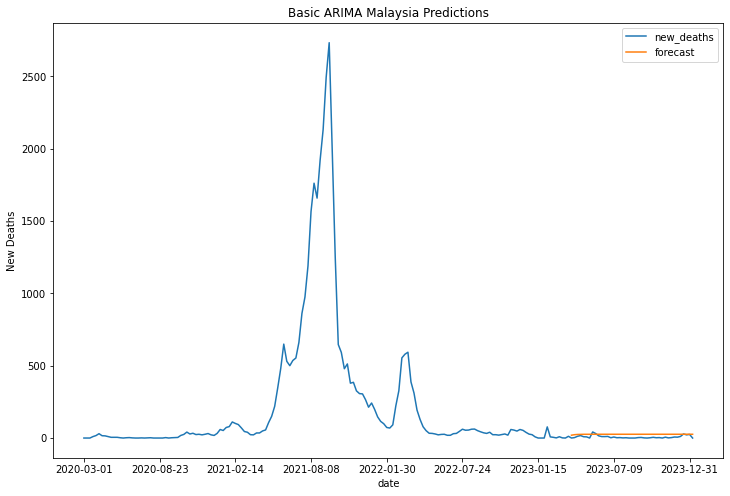

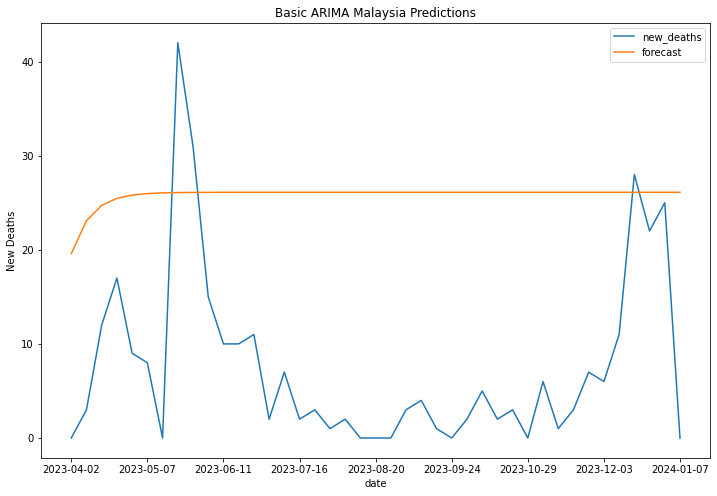

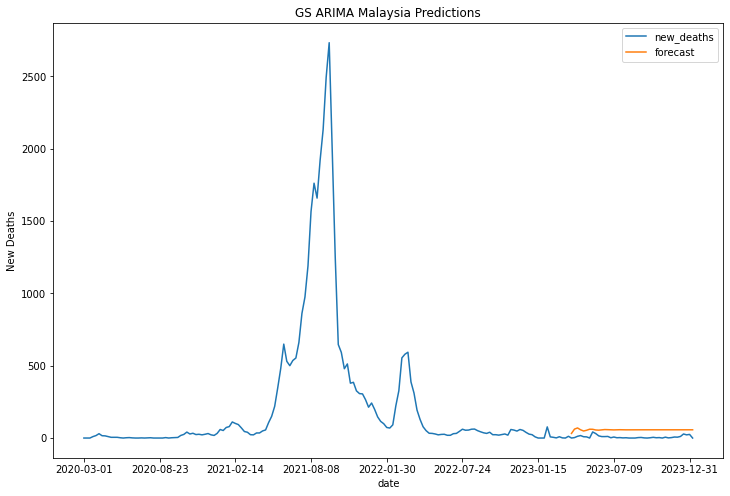

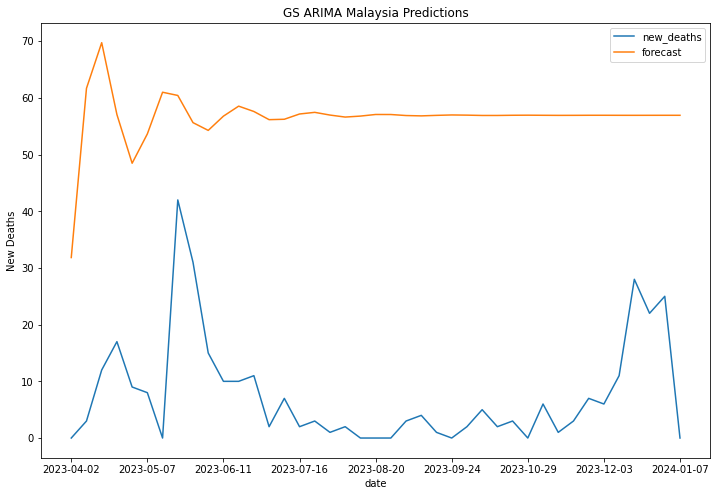

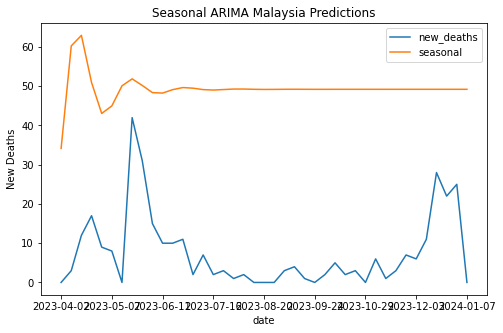

In [241]:
#malaysia
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(malay_train['new_deaths'],order=(1,1,1))
mmodel_fit=model.fit()


malay['forecast']=mmodel_fit.predict(start=161,end=202,dynamic=True)
malay[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Malaysia Predictions')
plt.ylabel('New Deaths')
malay_test['forecast']=mmodel_fit.predict(start=161,end=202,dynamic=True)
malay_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Malaysia Predictions')
plt.ylabel('New Deaths')
actuals = malay_test['new_deaths']  
predictions = malay_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a malay',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(malay_train['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model=ARIMA(malay_train['new_deaths'],order=(p,1,q))
m_model_fit=model.fit()

malay['forecast']=m_model_fit.predict(start=161,end=202,dynamic=True)
malay[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Malaysia Predictions')
plt.ylabel('New Deaths')
malay_test['forecast']=m_model_fit.predict(start=161,end=202,dynamic=True)
malay_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Malaysia Predictions')
plt.ylabel('New Deaths')

actuals = malay_test['new_deaths']  
predictions = malay_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched malay',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(malay_train['new_deaths'],order=(p,1,q), seasonal_order=(P,0,Q,13)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(malay_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,0,Q,13))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
malay_test['seasonal'] = pred
mae = mean_absolute_error(malay_test['new_deaths'], malay_test['seasonal'])
mase = mean_absolute_scaled_error(malay_test['new_deaths'], malay_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal malay',mae, mase]


malay_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Malaysia Predictions')
plt.ylabel('New Deaths')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38147D+00    |proj g|=  8.88178D-11

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.882D-11   7.381D+00
  F =   7.3814663332754584     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.2

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01528D+01    |proj g|=  2.55560D+00


 This problem is unconstrained.



At iterate    5    f=  9.71484D+00    |proj g|=  5.13130D-02

At iterate   10    f=  9.51547D+00    |proj g|=  1.28007D+00

At iterate   15    f=  7.47207D+00    |proj g|=  2.96429D-01

At iterate   20    f=  7.33932D+00    |proj g|=  1.72062D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     29      1     0     0   2.118D-05   7.339D+00
  F =   7.3393179876445584     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.11410D+00    |proj g|=  4.21809D-02

At iterate   15    f=  7.40074D+00    |proj g|=  1.93499D-02

At iterate   20    f=  7.30190D+00    |proj g|=  1.83391D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   8.227D-06   7.302D+00
  F =   7.3018689832465693     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55277D+01    |proj g|=  5.44275D+00

At iter

 This problem is unconstrained.



At iterate   10    f=  9.95810D+00    |proj g|=  3.61540D-01

At iterate   15    f=  8.22174D+00    |proj g|=  1.65782D-01

At iterate   20    f=  7.63050D+00    |proj g|=  7.01464D-04

At iterate   25    f=  7.38726D+00    |proj g|=  2.64696D-01
  ys=-2.402E+00  -gs= 6.548E-02 BFGS update SKIPPED

At iterate   30    f=  7.30399D+00    |proj g|=  9.27798D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     54      1     1     0   1.738D-06   7.304D+00
  F =   7.3039292164221186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate   20    f=  7.30883D+00    |proj g|=  8.86192D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   2.949D-06   7.309D+00
  F =   7.3088268297689263     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.62123D+00    |proj g|=  9.85928D-01


 This problem is unconstrained.



At iterate    5    f=  8.22278D+00    |proj g|=  1.50504D-01

At iterate   10    f=  8.11188D+00    |proj g|=  2.74162D-02

At iterate   15    f=  7.82496D+00    |proj g|=  5.12357D-02

At iterate   20    f=  7.32614D+00    |proj g|=  2.55561D-02

At iterate   25    f=  7.30197D+00    |proj g|=  7.14538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     34      1     0     0   5.867D-06   7.302D+00
  F =   7.3018487662235536     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   10    f=  7.74679D+00    |proj g|=  1.66215D-02
  ys=-9.039E-04  -gs= 1.929E-04 BFGS update SKIPPED

At iterate   15    f=  7.30810D+00    |proj g|=  1.53386D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     68      1     1     0   1.534D+00   7.308D+00
  F =   7.3081035571389918     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39109D+00    |proj g|=  1.14483D+00

At iterate    5    f=  6.96423D+00    |proj g|=  8.69333D-03

At iterate   10    f=  6.73841D+00    |proj g|=  6.93849D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     16      1     0     0   6.439D-08   6.738D+00
  F =   6.7383653721759904     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.96134D+00    |proj g|=  1.07801D-02

At iterate   10    f=  6.95357D+00    |proj g|=  1.93201D-03

At iterate   15    f=  6.73112D+00    |proj g|=  6.25483D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   3.710D-06   6.725D+00
  F =   6.7254951320702805     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39847D+00    |proj g|=  1.15724D+00


 This problem is unconstrained.



At iterate    5    f=  6.95502D+00    |proj g|=  1.77818D-02

At iterate   10    f=  6.94887D+00    |proj g|=  1.97096D-03

At iterate   15    f=  6.70443D+00    |proj g|=  5.61961D-02

At iterate   20    f=  6.70139D+00    |proj g|=  3.28448D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     28      1     0     0   3.284D-07   6.701D+00
  F =   6.7013946912245448     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35926D+00    |proj g|=  1.07703D+00

At iterate    5    f=  6.96084D+00    |proj g|=  4.85376D-02

At iterate   10    f=  6.95151D+00    |proj g|=  2.53080D-03

At iterate   15    f=  6.71751D+00    |proj g|=  7.92569D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     24      1     0     0   1.731D-06   6.716D+00
  F =   6.7156248122420834     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   15    f=  6.68115D+00    |proj g|=  1.05878D-03

At iterate   20    f=  6.66443D+00    |proj g|=  1.74961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     50      1     0     0   7.015D-06   6.664D+00
  F =   6.6643372769911311     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.55285D+00    |proj g|=  1.44912D+00

At iterate    5    f=  6.95485D+00    |proj g|=  2.58166D-02

At iterate   10    f=  6.93874D+00    |proj g|=  2.05426D-03

At iterate   15    f=  6.70178D+00    |proj g|=  2.10962D-01

At iterate   20    f=  6.63389D+00    |proj g|=  1.02857D-02

At iterate   25    f=  6.63334D+00    |proj g|=  1.00950D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     28      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31581D+00    |proj g|=  9.68748D-01

At iterate    5    f=  6.94905D+00    |proj g|=  1.29167D-02

At iterate   10    f=  6.94357D+00    |proj g|=  2.01401D-03

At iterate   15    f=  6.68922D+00    |proj g|=  8.58077D-02

At iterate   20    f=  6.67438D+00    |proj g|=  1.48344D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   5.064D-06   6.674D+00
  F =   6.6743805420977758     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36782D+00    |proj g|=  1.06334D+00

At iterate    5    f=  6.94912D+00    |proj g|=  1.31016D-02

At iterate   10    f=  6.93958D+00    |proj g|=  2.78509D-03

At iterate   15    f=  6.84448D+00    |proj g|=  7.52809D-02

At iterate   20    f=  6.71435D+00    |proj g|=  6.60612D-03

At iterate   25    f=  6.71412D+00    |proj g|=  2.75531D-03

At iterate   30    f=  6.66820D+00    |proj g|=  1.04131D-02

At iterate   35    f=  6.66579D+00    |proj g|=  1.50876D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54986D+00    |proj g|=  1.43635D+00

At iterate    5    f=  6.94997D+00    |proj g|=  1.10168D-02

At iterate   10    f=  6.93980D+00    |proj g|=  2.21992D-03

At iterate   15    f=  6.66567D+00    |proj g|=  6.89977D-04

At iterate   20    f=  6.66499D+00    |proj g|=  2.10590D-03

At iterate   25    f=  6.65741D+00    |proj g|=  2.92522D-02

At iterate   30    f=  6.65331D+00    |proj g|=  5.15106D-04

At iterate   35    f=  6.65141D+00    |proj g|=  4.45186D-04

At iterate   40    f=  6.65087D+00    |proj g|=  6.59440D-04

At iterate   45    f=  6.65065D+00    |proj g|=  4.51740D-04

At iterate   50    f=  6.65050D+00    |proj g|=  2.23575D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45887D+00    |proj g|=  1.57542D+00

At iterate    5    f=  6.73252D+00    |proj g|=  1.15393D-02

At iterate   10    f=  6.72412D+00    |proj g|=  9.13224D-03

At iterate   15    f=  6.51340D+00    |proj g|=  5.08052D-01

At iterate   20    f=  6.48500D+00    |proj g|=  3.79053D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     37      1     0     0   3.791D-05   6.485D+00
  F =   6.4850049295968013     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  6.73030D+00    |proj g|=  1.28210D-02

At iterate   10    f=  6.72647D+00    |proj g|=  3.53290D-03

At iterate   15    f=  6.71076D+00    |proj g|=  3.18613D-02

At iterate   20    f=  6.43424D+00    |proj g|=  1.01328D-02

At iterate   25    f=  6.43410D+00    |proj g|=  4.51888D-03

At iterate   30    f=  6.32782D+00    |proj g|=  9.94140D-02

At iterate   35    f=  6.26903D+00    |proj g|=  3.33227D-02

At iterate   40    f=  6.26811D+00    |proj g|=  4.50245D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     68      1     0     0   1.505D-06   6.268D+00
  F =   6.26810843818

 This problem is unconstrained.



At iterate   15    f=  6.50171D+00    |proj g|=  8.06503D-02

At iterate   20    f=  6.46570D+00    |proj g|=  2.77641D-04

At iterate   25    f=  6.33594D+00    |proj g|=  2.04146D-01

At iterate   30    f=  6.27280D+00    |proj g|=  5.79563D-03

At iterate   35    f=  6.27226D+00    |proj g|=  1.04017D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     59      1     0     0   3.972D-07   6.272D+00
  F =   6.2722571404727194     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.44972D+00    |proj g|=  1.52506D+00

At iterate    5    f=  6.72983D+00    |proj g|=  9.84881D-03

At iterate   10    f=  6.72376D+00    |proj g|=  7.31947D-03

At iterate   15    f=  6.64183D+00    |proj g|=  5.25251D-02

At iterate   20    f=  6.52310D+00    |proj g|=  1.06340D-01

At iterate   25    f=  6.52019D+00    |proj g|=  4.09242D-01

At iterate   30    f=  6.40525D+00    |proj g|=  1.72902D-01

At iterate   35    f=  6.30788D+00    |proj g|=  6.37155D-02

At iterate   40    f=  6.28797D+00    |proj g|=  1.43979D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.67764D+00    |proj g|=  1.99416D+00

At iterate    5    f=  6.72706D+00    |proj g|=  4.76420D-03

At iterate   10    f=  6.72297D+00    |proj g|=  2.76938D-03

At iterate   15    f=  6.71443D+00    |proj g|=  3.32677D-02

At iterate   20    f=  6.46840D+00    |proj g|=  1.23221D-01

At iterate   25    f=  6.44825D+00    |proj g|=  3.82605D-02

At iterate   30    f=  6.41771D+00    |proj g|=  1.64906D-01

At iterate   35    f=  6.28707D+00    |proj g|=  3.88906D-02

At iterate   40    f=  6.27303D+00    |proj g|=  3.22542D-03

At iterate   45    f=  6.25295D+00    |proj g|=  4.94271D-02

At iterate   50    f=  6.23680D+00    |proj g|=  2.34766D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  6.72502D+00    |proj g|=  3.05193D-03

At iterate   15    f=  6.70945D+00    |proj g|=  5.49625D-02

At iterate   20    f=  6.42692D+00    |proj g|=  4.11463D-02

At iterate   25    f=  6.42128D+00    |proj g|=  2.02611D-04

At iterate   30    f=  6.42120D+00    |proj g|=  9.45357D-03

At iterate   35    f=  6.35609D+00    |proj g|=  1.62123D-01

At iterate   40    f=  6.26296D+00    |proj g|=  1.61697D-02

At iterate   45    f=  6.25693D+00    |proj g|=  9.02528D-03

At iterate   50    f=  6.25659D+00    |proj g|=  8.47180D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     82   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42161D+00    |proj g|=  1.46329D+00

At iterate    5    f=  6.72890D+00    |proj g|=  7.95131D-03

At iterate   10    f=  6.72455D+00    |proj g|=  9.25116D-03

At iterate   15    f=  6.72072D+00    |proj g|=  9.89478D-03

At iterate   20    f=  6.51667D+00    |proj g|=  3.93483D-02

At iterate   25    f=  6.41566D+00    |proj g|=  1.19508D-01

At iterate   30    f=  6.28114D+00    |proj g|=  6.65805D-02

At iterate   35    f=  6.27227D+00    |proj g|=  1.46200D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.67220D+00    |proj g|=  1.97660D+00

At iterate    5    f=  6.72824D+00    |proj g|=  1.42389D-02

At iterate   10    f=  6.72433D+00    |proj g|=  1.03309D-02

At iterate   15    f=  6.72219D+00    |proj g|=  1.04857D-02

At iterate   20    f=  6.71930D+00    |proj g|=  1.74512D-02

At iterate   25    f=  6.70557D+00    |proj g|=  3.87905D-01

At iterate   30    f=  6.30395D+00    |proj g|=  2.43843D-02

At iterate   35    f=  6.28845D+00    |proj g|=  4.30662D-03

At iterate   40    f=  6.28819D+00    |proj g|=  1.09562D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.25345D+00    |proj g|=  2.13269D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     21      1     0     0   2.133D-06   6.253D+00
  F =   6.2534488242785491     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25187D+00    |proj g|=  5.60206D-02


 This problem is unconstrained.



At iterate    5    f=  6.24218D+00    |proj g|=  3.44535D-03

At iterate   10    f=  6.24207D+00    |proj g|=  1.10322D-03

At iterate   15    f=  6.24182D+00    |proj g|=  4.43308D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     21      1     0     0   2.363D-06   6.242D+00
  F =   6.2417355400570740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.26406D+00    |proj g|=  8.59587D-02

At iterate    5    f=  6.25373D+00    |proj g|=  2.64890D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   4.928D-05   6.254D+00
  F =   6.2537162191145850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31111D+00    |proj g|=  1.82376D-01

At iterate    5    f=  6.25136D+00    |proj g|=  3.14784D-02

At iterate   10    f=  6.24793D+00    |proj g|=  3.07261D-03

At iterate   15    f=  6.24785D+00    |proj g|=  5.31552D-04

At iterate   20    f=  6.24776D+00    |proj g|=  2.58258D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   5.343D-06   6.248D+00
  F =   6.2477342538350271     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25026D+00    |proj g|=  3.86951D-02

At iterate    5    f=  6.24567D+00    |proj g|=  2.33634D-02

At iterate   10    f=  6.24218D+00    |proj g|=  2.11842D-03

At iterate   15    f=  6.24156D+00    |proj g|=  2.89672D-04

At iterate   20    f=  6.24144D+00    |proj g|=  3.49645D-03

At iterate   25    f=  6.24122D+00    |proj g|=  9.43281D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  6.24040D+00    |proj g|=  7.37388D-03

At iterate   20    f=  6.24010D+00    |proj g|=  1.15997D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   4.453D-06   6.240D+00
  F =   6.2401023555690944     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.32187D+00    |proj g|=  1.57131D-01

At iterate    5    f=  6.23968D+00    |proj g|=  6.13198D-03

At iterate   10    f=  6.23859D+00    |proj g|=  2.13294D-03

At iterate   15    f=  6.23849D+00    |proj g|=  1.73873D-03

At iterate   20    f=  6.23797D+00    |proj g|=  3.51459D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   5.047D-05   6.238D+00
  F =   6.2379485252184548     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  6.24846D+00    |proj g|=  6.36414D-03

At iterate   10    f=  6.23933D+00    |proj g|=  1.28291D-02

At iterate   15    f=  6.23486D+00    |proj g|=  3.03015D-03

At iterate   20    f=  6.23419D+00    |proj g|=  4.73403D-03

At iterate   25    f=  6.23413D+00    |proj g|=  4.60234D-03

At iterate   30    f=  6.23339D+00    |proj g|=  1.10653D-02

At iterate   35    f=  6.23326D+00    |proj g|=  4.69059D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     49      1     0     0   2.871D-07   6.233D+00
  F =   6.2332570834885059     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49987D+00    |proj g|=  1.65942D+00

At iterate    5    f=  5.84657D+00    |proj g|=  3.75518D-03

At iterate   10    f=  5.84632D+00    |proj g|=  2.40714D-04

At iterate   15    f=  5.84630D+00    |proj g|=  1.22705D-03

At iterate   20    f=  5.84626D+00    |proj g|=  3.98850D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   2.238D-05   5.846D+00
  F =   5.8462627694035261     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51918D+00    |proj g|=  1.69379D+00

At iterate    5    f=  5.85161D+00    |proj g|=  1.51759D-02

At iterate   10    f=  5.85135D+00    |proj g|=  1.99526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     13      1     0     0   2.579D-05   5.851D+00
  F =   5.8513480458347669     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.60945D+00    |proj g|=  1.79735D+00

At iterate    5    f=  5.85161D+00    |proj g|=  1.70196D-02

At iterate   10    f=  5.85030D+00    |proj g|=  1.74833D-02

At iterate   15    f=  5.84946D+00    |proj g|=  3.47373D-03

At iterate   20    f=  5.84943D+00    |proj g|=  2.37668D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   2.032D-06   5.849D+00
  F =   5.8494178059044248     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  5.84922D+00    |proj g|=  6.18257D-03

At iterate   15    f=  5.84732D+00    |proj g|=  5.02871D-03

At iterate   20    f=  5.84585D+00    |proj g|=  1.50141D-03

At iterate   25    f=  5.84584D+00    |proj g|=  6.63010D-04

At iterate   30    f=  5.84580D+00    |proj g|=  2.05639D-03

At iterate   35    f=  5.84579D+00    |proj g|=  2.23864D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     39      1     0     0   2.239D-05   5.846D+00
  F =   5.8457927301562060     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  5.84473D+00    |proj g|=  2.89500D-03

At iterate   15    f=  5.84469D+00    |proj g|=  8.97781D-04

At iterate   20    f=  5.84461D+00    |proj g|=  3.86714D-03

At iterate   25    f=  5.84459D+00    |proj g|=  1.20981D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     27      1     0     0   1.210D-05   5.845D+00
  F =   5.8445923453362658     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.62640D+00    |proj g|=  1.82605D+00

At iterate    5    f=  5.84788D+00    |proj g|=  2.22645D-02

At iterate   10    f=  5.84449D+00    |proj g|=  2.80898D-03

At iterate   15    f=  5.84434D+00    |proj g|=  5.43278D-04

At iterate   20    f=  5.84433D+00    |proj g|=  1.10670D-03

At iterate   25    f=  5.84424D+00    |proj g|=  1.01398D-03

At iterate   30    f=  5.84424D+00    |proj g|=  1.16273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  5.85047D+00    |proj g|=  8.27248D-03

At iterate   10    f=  5.84935D+00    |proj g|=  4.11213D-04

At iterate   15    f=  5.84852D+00    |proj g|=  1.97340D-02

At iterate   20    f=  5.84319D+00    |proj g|=  1.80521D-02

At iterate   25    f=  5.84162D+00    |proj g|=  8.93115D-03

At iterate   30    f=  5.84097D+00    |proj g|=  1.62169D-03

At iterate   35    f=  5.84096D+00    |proj g|=  1.74423D-04

At iterate   40    f=  5.84093D+00    |proj g|=  1.30996D-03

At iterate   45    f=  5.84090D+00    |proj g|=  4.69818D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     60   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87940D+00    |proj g|=  2.17692D-01

At iterate    5    f=  5.79568D+00    |proj g|=  2.14905D-02

At iterate   10    f=  5.78940D+00    |proj g|=  1.21232D-02

At iterate   15    f=  5.76118D+00    |proj g|=  1.26488D-02

At iterate   20    f=  5.74248D+00    |proj g|=  3.84591D-03

At iterate   25    f=  5.74232D+00    |proj g|=  5.24576D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.78880D+00    |proj g|=  1.38663D-02

At iterate   10    f=  5.77502D+00    |proj g|=  1.69342D-02

At iterate   15    f=  5.75516D+00    |proj g|=  4.00386D-02

At iterate   20    f=  5.73874D+00    |proj g|=  5.24569D-03

At iterate   25    f=  5.73866D+00    |proj g|=  1.20082D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   1.201D-06   5.739D+00
  F =   5.7386594470862722     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.79354D+00    |proj g|=  3.66757D-02

At iterate   10    f=  5.78631D+00    |proj g|=  8.31028D-03

At iterate   15    f=  5.75650D+00    |proj g|=  7.04120D-02

At iterate   20    f=  5.73863D+00    |proj g|=  2.11441D-03

At iterate   25    f=  5.73858D+00    |proj g|=  9.18999D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     29      1     0     0   4.233D-06   5.739D+00
  F =   5.7385815657646617     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   25    f=  5.73884D+00    |proj g|=  1.02909D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   6.468D-06   5.739D+00
  F =   5.7388406558255323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.10959D+00    |proj g|=  7.88324D-01


 This problem is unconstrained.



At iterate    5    f=  5.79359D+00    |proj g|=  9.97341D-02

At iterate   10    f=  5.78718D+00    |proj g|=  8.35960D-03

At iterate   15    f=  5.77133D+00    |proj g|=  4.12655D-02

At iterate   20    f=  5.74393D+00    |proj g|=  1.08666D-02

At iterate   25    f=  5.74230D+00    |proj g|=  1.62961D-03

At iterate   30    f=  5.74223D+00    |proj g|=  3.89390D-04

At iterate   35    f=  5.74199D+00    |proj g|=  9.58730D-03

At iterate   40    f=  5.73988D+00    |proj g|=  8.81455D-03

At iterate   45    f=  5.73860D+00    |proj g|=  1.02911D-03

At iterate   50    f=  5.73859D+00    |proj g|=  1.82382D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95282D+00    |proj g|=  2.60424D-01

At iterate    5    f=  5.78615D+00    |proj g|=  3.98274D-02

At iterate   10    f=  5.78164D+00    |proj g|=  2.83728D-02

At iterate   15    f=  5.75687D+00    |proj g|=  4.63005D-02

At iterate   20    f=  5.74169D+00    |proj g|=  6.58148D-03

At iterate   25    f=  5.73767D+00    |proj g|=  1.97281D-02

At iterate   30    f=  5.73655D+00    |proj g|=  3.20275D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  5.78981D+00    |proj g|=  2.07119D-02

At iterate   10    f=  5.78336D+00    |proj g|=  1.14084D-02

At iterate   15    f=  5.76010D+00    |proj g|=  7.81553D-03

At iterate   20    f=  5.74204D+00    |proj g|=  4.52470D-02

At iterate   25    f=  5.73860D+00    |proj g|=  1.15437D-03

At iterate   30    f=  5.73859D+00    |proj g|=  7.46683D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     38      1     0     0   7.467D-06   5.739D+00
  F =   5.7385949315126652     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.79547D+00    |proj g|=  4.62311D-02

At iterate   10    f=  5.78675D+00    |proj g|=  8.34955D-03

At iterate   15    f=  5.76708D+00    |proj g|=  2.39247D-02

At iterate   20    f=  5.74147D+00    |proj g|=  3.07951D-02

At iterate   25    f=  5.73874D+00    |proj g|=  6.15919D-04

At iterate   30    f=  5.73872D+00    |proj g|=  2.22172D-03

At iterate   35    f=  5.73857D+00    |proj g|=  9.73010D-04

At iterate   40    f=  5.73856D+00    |proj g|=  2.06679D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     54      1     0     0   9.477D-06   5.739D+00
  F =   5.73855960368

 This problem is unconstrained.



At iterate    5    f=  5.80955D+00    |proj g|=  1.72005D-01

At iterate   10    f=  5.77993D+00    |proj g|=  1.82898D-02

At iterate   15    f=  5.74747D+00    |proj g|=  5.35547D-02

At iterate   20    f=  5.73847D+00    |proj g|=  1.13295D-02

At iterate   25    f=  5.73783D+00    |proj g|=  4.30234D-03

At iterate   30    f=  5.73770D+00    |proj g|=  1.30753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     36      1     0     0   1.152D-05   5.738D+00
  F =   5.7376952103551533     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85655D+00    |proj g|=  6.17703D-03

At iterate    5    f=  5.85640D+00    |proj g|=  1.16142D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     13      1     0     0   1.260D-06   5.856D+00
  F =   5.8563921695146197     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  5.85169D+00    |proj g|=  1.55171D-03

At iterate   10    f=  5.85168D+00    |proj g|=  8.79411D-04

At iterate   15    f=  5.85156D+00    |proj g|=  1.83812D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   9.201D-06   5.852D+00
  F =   5.8515509412371216     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85536D+00    |proj g|=  3.89687D-02

At iterate    5    f=  5.85329D+00    |proj g|=  2.26144D-04

At iterate   10    f=  5.85328D+00    |proj g|=  1.56926D-03

At iterate   15    f=  5.85320D+00    |proj g|=  2.07952D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   7.639D-06   5.853D+00
  F =   5.8531971622985877     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90405D+00    |proj g|=  2.44260D-01

At iterate    5    f=  5.85281D+00    |proj g|=  5.87200D-03

At iterate   10    f=  5.84875D+00    |proj g|=  1.45367D-02

At iterate   15    f=  5.84687D+00    |proj g|=  4.10687D-04

At iterate   20    f=  5.84667D+00    |proj g|=  1.06094D-03

At iterate   25    f=  5.84656D+00    |proj g|=  6.18607D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  5.84689D+00    |proj g|=  4.08270D-03

At iterate   15    f=  5.84678D+00    |proj g|=  7.77974D-04

At iterate   20    f=  5.84658D+00    |proj g|=  7.79653D-03

At iterate   25    f=  5.84647D+00    |proj g|=  1.06819D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   1.384D-05   5.846D+00
  F =   5.8464710290602211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87062D+00    |proj g|=  7.29393D-02

At iterate    5    f=  5.85130D+00    |proj g|=  3.83702D-03

At iterate   10    f=  5.85125D+00    |proj g|=  7.91395D-04

At iterate   15    f=  5.85115D+00    |proj g|=  3.69904D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   7.832D-06   5.851D+00
  F =   5.8511026265152450     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.90143D+00    |proj g|=  2.06602D-01

At iterate    5    f=  5.85143D+00    |proj g|=  4.67204D-03

At iterate   10    f=  5.85126D+00    |proj g|=  4.62794D-04

At iterate   15    f=  5.85114D+00    |proj g|=  1.60081D-02

At iterate   20    f=  5.84733D+00    |proj g|=  5.01794D-03

At iterate   25    f=  5.84699D+00    |proj g|=  1.22715D-03

At iterate   30    f=  5.84652D+00    |proj g|=  1.53100D-03

At iterate   35    f=  5.84648D+00    |proj g|=  8.64337D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  5.84793D+00    |proj g|=  5.03633D-03

At iterate   10    f=  5.84727D+00    |proj g|=  6.60389D-03

At iterate   15    f=  5.84681D+00    |proj g|=  4.34676D-04

At iterate   20    f=  5.84652D+00    |proj g|=  4.56641D-03

At iterate   25    f=  5.84641D+00    |proj g|=  2.25956D-04

At iterate   30    f=  5.84625D+00    |proj g|=  6.09288D-03

At iterate   35    f=  5.84514D+00    |proj g|=  6.93124D-04

At iterate   40    f=  5.84508D+00    |proj g|=  2.29181D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     48      1     0     0   8.213D-06   5.845D+00
  F =   5.84507861817

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.71754D+00    |proj g|=  1.25757D-03

At iterate   15    f=  5.71730D+00    |proj g|=  1.55323D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   3.347D-06   5.717D+00
  F =   5.7172766926000875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73454D+00    |proj g|=  6.37017D-02

At iterate    5    f=  5.71725D+00    |proj g|=  2.89505D-03


 This problem is unconstrained.



At iterate   10    f=  5.71719D+00    |proj g|=  6.06434D-04

At iterate   15    f=  5.71700D+00    |proj g|=  7.05851D-03

At iterate   20    f=  5.71692D+00    |proj g|=  2.58370D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     24      1     0     0   2.434D-05   5.717D+00
  F =   5.7169209305761433     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73333D+00    |proj g|=  6.70791D-02

At iterate    5    f=  5.71730D+00    |proj g|=  2.40298D-03

At iterate   10    f=  5.71725D+00    |proj g|=  2.18724D-03

At iterate   15    f=  5.71701D+00    |proj g|=  1.76119D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   3.411D-05   5.717D+00
  F =   5.7170071975406112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   15    f=  5.71632D+00    |proj g|=  2.18309D-02

At iterate   20    f=  5.71487D+00    |proj g|=  3.94547D-03

At iterate   25    f=  5.71464D+00    |proj g|=  1.84486D-03

At iterate   30    f=  5.71422D+00    |proj g|=  1.15710D-03

At iterate   35    f=  5.71418D+00    |proj g|=  1.80662D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     44      1     0     0   5.242D-06   5.714D+00
  F =   5.7141751789761077     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76917D+00    |proj g|=  1.16189D-01

At iterate    5    f=  5.71446D+00    |proj g|=  7.26498D-03

At iterate   10    f=  5.71394D+00    |proj g|=  1.51671D-03

At iterate   15    f=  5.71331D+00    |proj g|=  4.31654D-03

At iterate   20    f=  5.71318D+00    |proj g|=  9.73889D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     27      1     0     0   1.414D-05   5.713D+00
  F =   5.7131694000155298     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76952D+00    |proj g|=  1.67974D-01

At iterate    5    f=  5.71732D+00    |proj g|=  4.21866D-03

At iterate   10    f=  5.71723D+00    |proj g|=  1.04608D-03

At iterate   15    f=  5.71699D+00    |proj g|=  2.38472D-03

At iterate   20    f=  5.71697D+00    |proj g|=  3.62625D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     22      1     0     0   3.626D-06   5.717D+00
  F =   5.7169689067559419     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78805D+00    |proj g|=  1.95010D-01

At iterate    5    f=  5.71738D+00    |proj g|=  4.78046D-03

At iterate   10    f=  5.71724D+00    |proj g|=  4.64995D-04

At iterate   15    f=  5.71717D+00    |proj g|=  5.06371D-03

At iterate   20    f=  5.71695D+00    |proj g|=  4.83232D-04

At iterate   25    f=  5.71695D+00    |proj g|=  9.88116D-04

At iterate   30    f=  5.71641D+00    |proj g|=  8.03753D-03

At iterate   35    f=  5.71564D+00    |proj g|=  1.63445D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  5.71574D+00    |proj g|=  1.58087D-02

At iterate   10    f=  5.71366D+00    |proj g|=  1.51132D-03

At iterate   15    f=  5.71326D+00    |proj g|=  8.18989D-04

At iterate   20    f=  5.71321D+00    |proj g|=  2.90618D-03

At iterate   25    f=  5.71308D+00    |proj g|=  6.87085D-04

At iterate   30    f=  5.71308D+00    |proj g|=  8.34786D-05

At iterate   35    f=  5.71308D+00    |proj g|=  4.88245D-04

At iterate   40    f=  5.71308D+00    |proj g|=  4.64574D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     43      1     0     0   1.329D-05   5.713D+00
  F =   5.71307514588

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.76157D+00    |proj g|=  1.77638D-02

At iterate   10    f=  5.75523D+00    |proj g|=  2.51745D-02

At iterate   15    f=  5.72125D+00    |proj g|=  2.54584D-02

At iterate   20    f=  5.69598D+00    |proj g|=  2.93054D-02

At iterate   25    f=  5.69458D+00    |proj g|=  1.56890D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.994D-05   5.695D+00
  F =   5.6945836319569034     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.80803D+00    |proj g|=  3.41164D-01

At iterate    5    f=  5.75786D+00    |proj g|=  1.07543D-02

At iterate   10    f=  5.74912D+00    |proj g|=  2.47496D-02

At iterate   15    f=  5.71556D+00    |proj g|=  3.80548D-02

At iterate   20    f=  5.69330D+00    |proj g|=  2.23172D-02

At iterate   25    f=  5.69259D+00    |proj g|=  5.66541D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     33      1     0     0   

 This problem is unconstrained.



At iterate   20    f=  5.69411D+00    |proj g|=  1.59625D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   3.736D-06   5.694D+00
  F =   5.6940906893443515     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91193D+00    |proj g|=  5.43193D-01

At iterate    5    f=  5.76014D+00    |proj g|=  1.63796D-02

At iterate   10    f=  5.73597D+00    |proj g|=  3.95994D-02


 This problem is unconstrained.



At iterate   15    f=  5.69794D+00    |proj g|=  2.74049D-02

At iterate   20    f=  5.69491D+00    |proj g|=  1.08935D-02

At iterate   25    f=  5.69136D+00    |proj g|=  3.99876D-02

At iterate   30    f=  5.68852D+00    |proj g|=  2.50601D-03

At iterate   35    f=  5.68850D+00    |proj g|=  3.29772D-04

At iterate   40    f=  5.68826D+00    |proj g|=  1.22461D-02

At iterate   45    f=  5.68739D+00    |proj g|=  1.38326D-02

At iterate   50    f=  5.68718D+00    |proj g|=  7.02129D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   7.021D-04   5.687D+00
  F =   5.68717780590

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85632D+00    |proj g|=  2.76361D-01

At iterate    5    f=  5.74799D+00    |proj g|=  1.50813D-02

At iterate   10    f=  5.73893D+00    |proj g|=  2.73971D-02

At iterate   15    f=  5.69197D+00    |proj g|=  2.82664D-02

At iterate   20    f=  5.68928D+00    |proj g|=  5.71905D-03

At iterate   25    f=  5.68830D+00    |proj g|=  1.17598D-04

At iterate   30    f=  5.68829D+00    |proj g|=  1.12292D-03

At iterate   35    f=  5.68803D+00    |proj g|=  1.57573D-02

At iterate   40    f=  5.68700D+00    |proj g|=  1.99193D-03

At iterate   45    f=  5.68696D+00    |proj g|=  3.47314D-04

At iterate   50    f=  5.68696D+00    |proj g|=  2.65697D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82262D+00    |proj g|=  3.22690D-01

At iterate    5    f=  5.75679D+00    |proj g|=  1.07119D-02

At iterate   10    f=  5.74864D+00    |proj g|=  3.26102D-02

At iterate   15    f=  5.71273D+00    |proj g|=  2.13911D-02

At iterate   20    f=  5.69197D+00    |proj g|=  3.23371D-03

At iterate   25    f=  5.69191D+00    |proj g|=  4.14863D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     30      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.75690D+00    |proj g|=  1.07298D-02

At iterate   10    f=  5.74563D+00    |proj g|=  2.65133D-02

At iterate   15    f=  5.70904D+00    |proj g|=  4.43407D-02

At iterate   20    f=  5.68788D+00    |proj g|=  8.81201D-03

At iterate   25    f=  5.68733D+00    |proj g|=  4.56650D-04

At iterate   30    f=  5.68715D+00    |proj g|=  1.39695D-02

At iterate   35    f=  5.68698D+00    |proj g|=  1.46943D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     46      1     0     0   1.486D-05   5.687D+00
  F =   5.6869802381288634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.75036D+00    |proj g|=  7.77291D-02

At iterate   10    f=  5.73994D+00    |proj g|=  1.24941D-02

At iterate   15    f=  5.68995D+00    |proj g|=  1.66752D-02

At iterate   20    f=  5.68761D+00    |proj g|=  1.16027D-03

At iterate   25    f=  5.68760D+00    |proj g|=  1.05945D-03

At iterate   30    f=  5.68759D+00    |proj g|=  1.80813D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32     35      1     0     0   7.792D-05   5.688D+00
  F =   5.6875854095296461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  5.69750D+00    |proj g|=  2.50244D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     31      1     0     0   4.031D-05   5.697D+00
  F =   5.6974704136807350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


Text(0, 0.5, 'New Deaths')

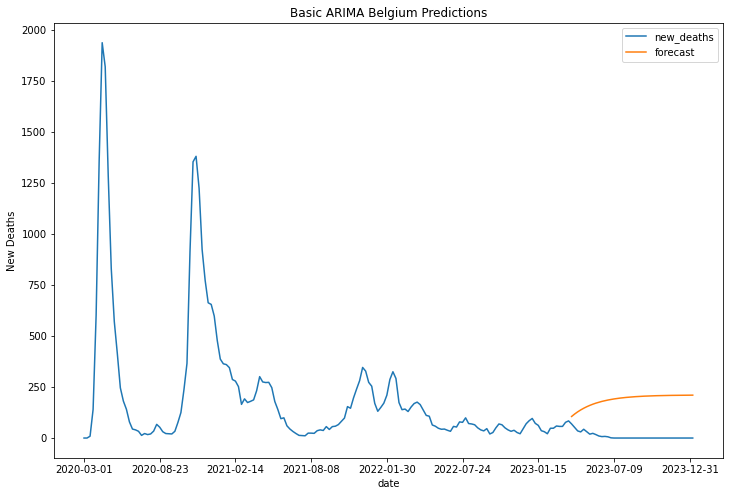

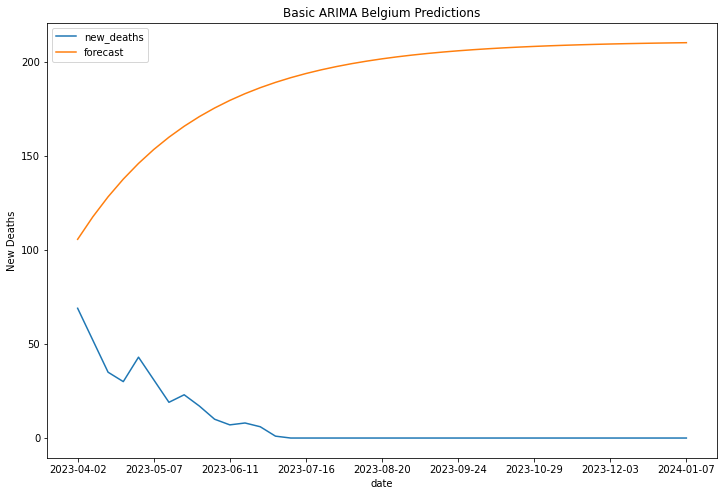

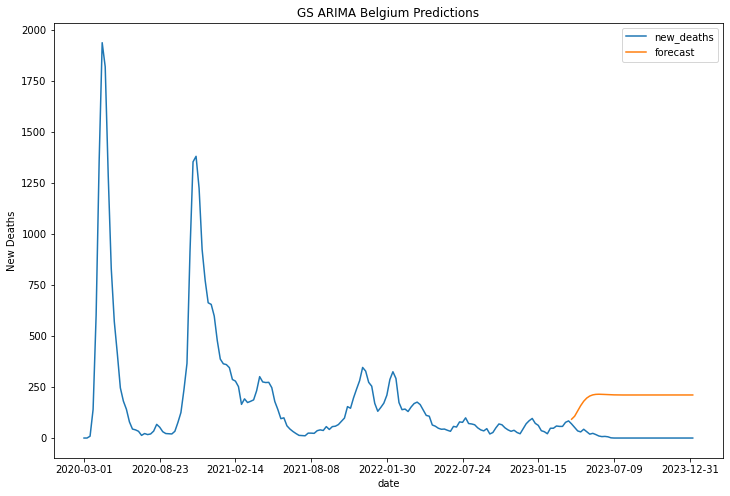

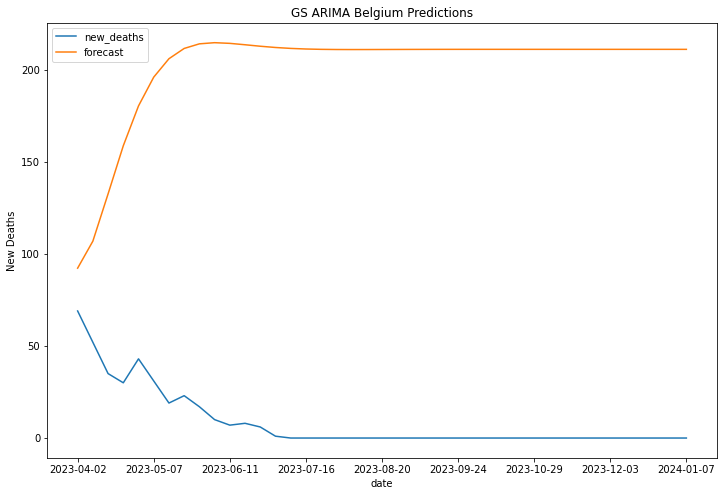

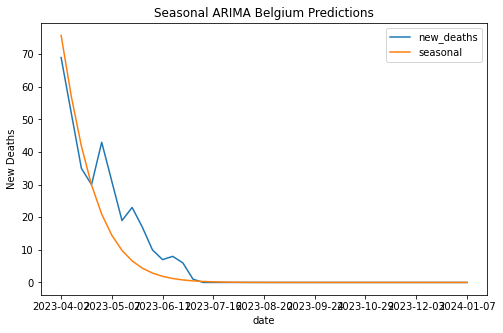

In [242]:
#belgi
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(belgi_train['new_deaths'],order=(1,0,1))
bmodel_fit=model.fit()


belgi['forecast']=bmodel_fit.predict(start=161,end=202,dynamic=True)
belgi[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Belgium Predictions')
plt.ylabel('New Deaths')
belgi_test['forecast']=bmodel_fit.predict(start=161,end=202,dynamic=True)
belgi_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Belgium Predictions')
plt.ylabel('New Deaths')
actuals = belgi_test['new_deaths']  
predictions = belgi_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a belgi',mae, mase]


results = []
for p in range(0,3):
    for q in range(0,3):
        model=ARIMA(belgi_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model=ARIMA(belgi_train['new_deaths'],order=(p,0,q))
b_model_fit=model.fit()

belgi['forecast']=b_model_fit.predict(start=161,end=202,dynamic=True)
belgi[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Belgium Predictions')
plt.ylabel('New Deaths')
belgi_test['forecast']=b_model_fit.predict(start=161,end=202,dynamic=True)
belgi_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Belgium Predictions')
plt.ylabel('New Deaths')

actuals = belgi_test['new_deaths']  
predictions = belgi_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched belgi',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm
if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(belgi_train['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,13)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(belgi_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,13))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
belgi_test['seasonal'] = pred
mae = mean_absolute_error( belgi_test['new_deaths'], belgi_test['seasonal'])
mase = mean_absolute_scaled_error(belgi_test['new_deaths'], belgi_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal belgi',mae, mase]


belgi_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Belgium Predictions')
plt.ylabel('New Deaths')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35680D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   8.357D+00
  F =   8.3567983780796578     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.3

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32427D+00    |proj g|=  2.64626D-02

At iterate    5    f=  8.32137D+00    |proj g|=  2.19224D-02

At iterate   10    f=  8.31174D+00    |proj g|=  4.86429D-03

At iterate   15    f=  8.30876D+00    |proj g|=  7.65575D-04

At iterate   20    f=  8.30701D+00    |proj g|=  6.65135D-04

At iterate   25    f=  8.30449D+00    |proj g|=  2.59606D-05
  ys=-7.380E-05  -gs= 1.231E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   4.826D-05   8.330D+00
  F =   8.3301720100938503     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32517D+00    |proj g|=  4.05509D-02

At iterate    5    f=  8.32115D+00    |proj g|=  2.17881D-02

At iterate   10    f=  8.31140D+00    |proj g|=  1.20417D-02

At iterate   15    f=  8.30651D+00    |proj g|=  2.01451D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  8.30784D+00    |proj g|=  3.02241D-03

At iterate   25    f=  8.30772D+00    |proj g|=  1.67884D-03

At iterate   30    f=  8.30744D+00    |proj g|=  1.68730D-03

At iterate   35    f=  8.30728D+00    |proj g|=  1.34047D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     61      1     0     0   8.771D-03   8.307D+00
  F =   8.3071417187968635     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32345D+00    |proj g|=  3.91519D-02

At iterate    5    f=  8.32223D+00    |proj g|=  6.87052D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      7      1     0     0   6.871D-05   8.322D+00
  F =   8.3222259001327128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31580D+00    |proj g|=  3.81590D-02

At iterate    5    f=  8.31346D+00    |proj g|=  2.15821D-02

At iterate   10    f=  8.30415D+00    |proj g|=  4.22429D-03

At iterate   15    f=  8.30293D+00    |proj g|=  7.47822D-04

At iterate   20    f=  8.30263D+00    |proj g|=  2.03024D-03

At iterate   25    f=  8.30262D+00    |proj g|=  9.03821D-04


 This problem is unconstrained.



At iterate   30    f=  8.29926D+00    |proj g|=  7.14159D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     59      1     0     0   2.173D-03   8.299D+00
  F =   8.2991930246742811     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31845D+00    |proj g|=  5.08119D-02


 This problem is unconstrained.



At iterate    5    f=  8.31304D+00    |proj g|=  1.07053D-02

At iterate   10    f=  8.30212D+00    |proj g|=  4.65863D-03

At iterate   15    f=  8.30163D+00    |proj g|=  3.45501D-03

At iterate   20    f=  8.30074D+00    |proj g|=  6.86503D-03

At iterate   25    f=  8.30069D+00    |proj g|=  3.67148D-04

At iterate   30    f=  8.30068D+00    |proj g|=  2.51461D-03

At iterate   35    f=  8.30046D+00    |proj g|=  3.62761D-03

At iterate   40    f=  8.30001D+00    |proj g|=  2.40749D-02

At iterate   45    f=  8.29571D+00    |proj g|=  1.71474D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  8.29521D+00    |proj g|=  8.93735D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     80      2     0     0   8.937D-05   8.295D+00
  F =   8.2952106986319976     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32216D+00    |proj g|=  4.13480D-02

At iterate    5    f=  8.32038D+00    |proj g|=  7.25358D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.31334D+00    |proj g|=  1.83832D-02

At iterate   10    f=  8.30245D+00    |proj g|=  4.66678D-03

At iterate   15    f=  8.30092D+00    |proj g|=  7.35675D-04

At iterate   20    f=  8.30063D+00    |proj g|=  5.43185D-04

At iterate   25    f=  8.30058D+00    |proj g|=  6.08683D-04

At iterate   30    f=  8.30047D+00    |proj g|=  2.99999D-03

At iterate   35    f=  8.30044D+00    |proj g|=  4.38618D-04

At iterate   40    f=  8.30039D+00    |proj g|=  4.18542D-03

At iterate   45    f=  8.29977D+00    |proj g|=  1.33231D-02
  ys=-2.320E-01  -gs= 8.350E-03 BFGS update SKIPPED



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  8.29593D+00    |proj g|=  9.59027D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     94      2     1     0   9.590D-03   8.296D+00
  F =   8.2959282288335530     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31581D+00    |proj g|=  4.41812D-02

At iterate    5    f=  8.30924D+00    |proj g|=  1.65099D-02

At iterate   10    f=  8.30248D+00    |proj g|=  4.45511D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31518D+00    |proj g|=  1.01514D-02

At iterate    5    f=  8.31507D+00    |proj g|=  9.62197D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      7      1     0     0   9.622D-05   8.315D+00
  F =   8.3150690954154935     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31606D+00    |proj g|=  5.84471D-02

At iterate    5    f=  8.31382D+00    |proj g|=  9.87402D-05

At iterate   10    f=  8.31381D+00    |proj g|=  1.93865D-03

At iterate   15    f=  8.31340D+00    |proj g|=  2.20055D-02

At iterate   20    f=  8.31101D+00    |proj g|=  4.28760D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   8.942D-05   8.311D+00
  F =   8.3109915296880192     

CONVERG

 This problem is unconstrained.



At iterate   25    f=  8.29668D+00    |proj g|=  1.47556D-04

At iterate   30    f=  8.29666D+00    |proj g|=  2.48775D-03

At iterate   35    f=  8.29517D+00    |proj g|=  3.38344D-02
  ys=-5.341E-02  -gs= 7.144E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     63      1     1     0   4.540D-02   8.292D+00
  F =   8.2924594900881914     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31453D+00    |proj g|=  4.90143D-02

At iterate    5    f=  8.31211D+00    |proj g|=  1.02186D-04

At iterate   10    f=  8.31210D+00    |proj g|=  1.75837D-03

At iterate   15    f=  8.31163D+00    |proj g|=  2.00307D-02

At iterate   20    f=  8.30909D+00    |proj g|=  4.17942D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   1.102D-05   8.309D+00
  F =   8.3090723108060569     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  8.29814D+00    |proj g|=  3.91201D-03

At iterate   15    f=  8.29754D+00    |proj g|=  1.09081D-02

At iterate   20    f=  8.29671D+00    |proj g|=  1.68623D-03

At iterate   25    f=  8.29663D+00    |proj g|=  1.47992D-04

At iterate   30    f=  8.29663D+00    |proj g|=  8.35065D-04

At iterate   35    f=  8.29628D+00    |proj g|=  6.49184D-03

At iterate   40    f=  8.29181D+00    |proj g|=  1.28676D-02

At iterate   45    f=  8.28968D+00    |proj g|=  3.01758D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     63      1     0     0   2.001D-03   8.290D+00
  F =   8.28961984761

 This problem is unconstrained.


At iterate   10    f=  8.29827D+00    |proj g|=  4.55159D-03

At iterate   15    f=  8.29816D+00    |proj g|=  8.94617D-04

At iterate   20    f=  8.29801D+00    |proj g|=  6.00810D-03

At iterate   25    f=  8.29687D+00    |proj g|=  7.14986D-03

At iterate   30    f=  8.29636D+00    |proj g|=  1.40684D-03

At iterate   35    f=  8.29633D+00    |proj g|=  1.52283D-03

At iterate   40    f=  8.29613D+00    |proj g|=  4.40301D-03

At iterate   45    f=  8.29525D+00    |proj g|=  1.28942D-02

At iterate   50    f=  8.29500D+00    |proj g|=  7.34708D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32792D+00    |proj g|=  1.42935D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   6.183D-06   8.328D+00
  F =   8.3279218014903904     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.3

 This problem is unconstrained.


At iterate   30    f=  8.29637D+00    |proj g|=  1.40642D-02

At iterate   35    f=  8.29481D+00    |proj g|=  5.76023D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     62      1     0     0   5.760D-03   8.295D+00
  F =   8.2948069474211827     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32112D+00    |proj g|=  7.66495D-02

At iterate    5    f=  8.31577D+00    |proj g|=  3.10241D-05

        


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31357D+00    |proj g|=  6.65507D-02

At iterate    5    f=  8.30952D+00    |proj g|=  1.29489D-02

At iterate   10    f=  8.29847D+00    |proj g|=  3.98630D-03

At iterate   15    f=  8.29754D+00    |proj g|=  3.18408D-03

At iterate   20    f=  8.29657D+00    |proj g|=  9.12723D-04

At iterate   25    f=  8.29647D+00    |proj g|=  2.64545D-04

At iterate   30    f=  8.29646D+00    |proj g|=  4.19066D-04

At iterate   35    f=  8.29646D+00    |proj g|=  1.04105D-03

At iterate   40    f=  8.29600D+00    |proj g|=  1.72174D-02

At iterate   45    f=  8.29434D+00    |proj g|=  1.55421D-02

At iterate   50    f=  8.29398D+00    |proj g|=  3.44038D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  8.30480D+00    |proj g|=  2.11754D-02

At iterate   10    f=  8.29820D+00    |proj g|=  4.11755D-03

At iterate   15    f=  8.29810D+00    |proj g|=  2.47835D-04

At iterate   20    f=  8.29804D+00    |proj g|=  2.92162D-03

At iterate   25    f=  8.29691D+00    |proj g|=  2.40118D-03

At iterate   30    f=  8.29630D+00    |proj g|=  2.29198D-03

At iterate   35    f=  8.29625D+00    |proj g|=  1.43710D-03

At iterate   40    f=  8.29602D+00    |proj g|=  1.02500D-03
  ys=-3.569E-03  -gs= 4.714E-04 BFGS update SKIPPED

At iterate   45    f=  8.29577D+00    |proj g|=  6.92806D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  8.29570D+00    |proj g|=  1.95032D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      2     1     0   1.950D-04   8.296D+00
  F =   8.2957008609558134     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29289D+00    |proj g|=  2.26804D-02

At iterate    5    f=  8.28629D+00    |proj g|=  1.59937D-03

At iterate   10    f=  8.28453D+00    |proj g|=  1.06735D-03

At iter

 This problem is unconstrained.



At iterate   25    f=  8.28385D+00    |proj g|=  1.94972D-04

At iterate   30    f=  8.28373D+00    |proj g|=  3.26384D-03

At iterate   35    f=  8.28316D+00    |proj g|=  9.62668D-03

At iterate   40    f=  8.28310D+00    |proj g|=  5.96174D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     48      1     0     0   3.410D-05   8.283D+00
  F =   8.2830976283161561     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31414D+00    |proj g|=  1.16155D-01

At iterate    5    f=  8.28630D+00    |proj g|=  1.56961D-03

At iterate   10    f=  8.28541D+00    |proj g|=  3.00464D-03

At iterate   15    f=  8.28383D+00    |proj g|=  4.52463D-04

At iterate   20    f=  8.28314D+00    |proj g|=  3.76012D-03

At iterate   25    f=  8.28237D+00    |proj g|=  4.43656D-04

At iterate   30    f=  8.28216D+00    |proj g|=  1.41231D-03

At iterate   35    f=  8.28204D+00    |proj g|=  5.95320D-04

At iterate   40    f=  8.28197D+00    |proj g|=  1.43066D-04

At iterate   45    f=  8.28193D+00    |proj g|=  8.47073D-04

At iterate   50    f=  8.28185D+00    |proj g|=  1.25505D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   20    f=  8.28369D+00    |proj g|=  4.68872D-03

At iterate   25    f=  8.28362D+00    |proj g|=  1.41921D-03

At iterate   30    f=  8.28360D+00    |proj g|=  5.38599D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   5.386D-05   8.284D+00
  F =   8.2835963477750028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32251D+00    |proj g|=  1.70513D-01

At iter

 This problem is unconstrained.



At iterate   20    f=  8.28392D+00    |proj g|=  8.29130D-03

At iterate   25    f=  8.28382D+00    |proj g|=  5.46901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     34      1     0     0   5.469D-05   8.284D+00
  F =   8.2838245706912748     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31027D+00    |proj g|=  1.01577D-01

At iterate    5    f=  8.28413D+00    |proj g|=  5.23610D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  8.28383D+00    |proj g|=  3.12702D-04

At iterate   20    f=  8.28374D+00    |proj g|=  2.76338D-03

At iterate   25    f=  8.28358D+00    |proj g|=  2.05623D-03

At iterate   30    f=  8.28357D+00    |proj g|=  3.17329D-04

At iterate   35    f=  8.28349D+00    |proj g|=  4.45215D-03

At iterate   40    f=  8.28308D+00    |proj g|=  1.79857D-03

At iterate   45    f=  8.28297D+00    |proj g|=  1.19090D-03

At iterate   50    f=  8.28294D+00    |proj g|=  1.79254D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59      1     0     0   1.793D-03   8.283D+00
  F =   8.28293977258

 This problem is unconstrained.



At iterate   20    f=  8.28251D+00    |proj g|=  1.17678D-02

At iterate   25    f=  8.28048D+00    |proj g|=  2.73739D-03

At iterate   30    f=  8.27990D+00    |proj g|=  1.96699D-02

At iterate   35    f=  8.27962D+00    |proj g|=  1.65314D-03

At iterate   40    f=  8.27961D+00    |proj g|=  3.48698D-04

At iterate   45    f=  8.27961D+00    |proj g|=  2.66994D-03

At iterate   50    f=  8.27955D+00    |proj g|=  4.76189D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   4.762D-04   8.280D+00
  F =   8.2795502351161865     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.28454D+00    |proj g|=  4.59833D-04

At iterate   15    f=  8.28452D+00    |proj g|=  2.37253D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   5.793D-05   8.285D+00
  F =   8.2845143860553687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29279D+00    |proj g|=  8.64247D-02

At iterate    5    f=  8.28403D+00    |proj g|=  6.58532D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.28456D+00    |proj g|=  2.78804D-03

At iterate   10    f=  8.28454D+00    |proj g|=  2.93874D-03

At iterate   15    f=  8.28453D+00    |proj g|=  1.56563D-04

At iterate   20    f=  8.28451D+00    |proj g|=  3.30731D-03

At iterate   25    f=  8.28385D+00    |proj g|=  1.53284D-02

At iterate   30    f=  8.28368D+00    |proj g|=  5.93057D-04

At iterate   35    f=  8.28368D+00    |proj g|=  3.67439D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     41      1     0     0   3.674D-06   8.284D+00
  F =   8.2836780794860996     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  8.28464D+00    |proj g|=  1.05357D-03

At iterate   15    f=  8.28461D+00    |proj g|=  5.78080D-05

At iterate   20    f=  8.28461D+00    |proj g|=  1.56557D-03

At iterate   25    f=  8.28429D+00    |proj g|=  1.36136D-03

At iterate   30    f=  8.28403D+00    |proj g|=  4.05487D-04

At iterate   35    f=  8.28402D+00    |proj g|=  8.85898D-04

At iterate   40    f=  8.28368D+00    |proj g|=  4.94280D-03

At iterate   45    f=  8.28348D+00    |proj g|=  4.59410D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     53      1     0     0   4.594D-05   8.283D+00
  F =   8.28348215377

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29308D+00    |proj g|=  6.10312D-02

At iterate    5    f=  8.28412D+00    |proj g|=  1.40761D-03

At iterate   10    f=  8.28407D+00    |proj g|=  3.53401D-03

At iterate   15    f=  8.28368D+00    |proj g|=  2.72169D-03

At iterate   20    f=  8.28367D+00    |proj g|=  1.52341D-04

At iterate   25    f=  8.28364D+00    |proj g|=  3.27826D-03

At iterate   30    f=  8.28282D+00    |proj g|=  2.47464D-03

At iterate   35    f=  8.28211D+00    |proj g|=  2.30524D-03

At iterate   40    f=  8.28197D+00    |proj g|=  5.46401D-03

At iterate   45    f=  8.28153D+00    |proj g|=  2.56050D-03

At iterate   50    f=  8.28114D+00    |proj g|=  3.20696D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.28366D+00    |proj g|=  1.05782D-03

At iterate   25    f=  8.28219D+00    |proj g|=  5.70911D-03

At iterate   30    f=  8.28179D+00    |proj g|=  5.64204D-03

At iterate   35    f=  8.28135D+00    |proj g|=  1.90924D-03

At iterate   40    f=  8.28112D+00    |proj g|=  1.09374D-03

At iterate   45    f=  8.28084D+00    |proj g|=  3.74714D-03

At iterate   50    f=  8.28015D+00    |proj g|=  1.73544D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   1.735D-03   8.280D+00
  F =   8.2801484015647766     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  8.28380D+00    |proj g|=  6.43226D-03

At iterate   20    f=  8.28375D+00    |proj g|=  4.79620D-04

At iterate   25    f=  8.28371D+00    |proj g|=  2.42837D-03

At iterate   30    f=  8.28359D+00    |proj g|=  2.15500D-03

At iterate   35    f=  8.28358D+00    |proj g|=  1.26764D-03

At iterate   40    f=  8.28337D+00    |proj g|=  1.03253D-02

At iterate   45    f=  8.28232D+00    |proj g|=  2.28179D-03

At iterate   50    f=  8.28152D+00    |proj g|=  4.91631D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   4.916D-03   8.282D+00
  F =   8.28152176910

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   1.256D-05   8.309D+00
  F =   8.3093232795411875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30696D+00    |proj g|=  5.61958D-02

At iterate    5    f=  8.30491D+00    |proj g|=  2.16275D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31296D+00    |proj g|=  1.17383D-01

At iterate    5    f=  8.30444D+00    |proj g|=  2.26162D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      9      1     0     0   2.597D-05   8.304D+00
  F =   8.3044386830689305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  8.29904D+00    |proj g|=  4.80159D-03

At iterate   10    f=  8.29116D+00    |proj g|=  6.83034D-03

At iterate   15    f=  8.29025D+00    |proj g|=  5.05758D-03

At iterate   20    f=  8.28895D+00    |proj g|=  1.56816D-03

At iterate   25    f=  8.28884D+00    |proj g|=  1.02127D-03

At iterate   30    f=  8.28884D+00    |proj g|=  2.54598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     47      1     0     0   7.611D-05   8.289D+00
  F =   8.2888392773361996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31240D+00    |proj g|=  9.75875D-02

At iterate    5    f=  8.30331D+00    |proj g|=  7.43345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact 

 This problem is unconstrained.



At iterate   20    f=  8.28997D+00    |proj g|=  4.37597D-04

At iterate   25    f=  8.28993D+00    |proj g|=  6.05357D-03

At iterate   30    f=  8.28874D+00    |proj g|=  1.01577D-02

At iterate   35    f=  8.28849D+00    |proj g|=  1.09323D-03

At iterate   40    f=  8.28846D+00    |proj g|=  4.03476D-03

At iterate   45    f=  8.28800D+00    |proj g|=  3.89379D-03

At iterate   50    f=  8.28779D+00    |proj g|=  2.45685D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   2.457D-03   8.288D+00
  F =   8.2877872215994906     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  8.28381D+00    |proj g|=  2.26956D-04

At iterate   35    f=  8.28381D+00    |proj g|=  3.47438D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     39      1     0     0   3.474D-06   8.284D+00
  F =   8.2838067580686641     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29920D+00    |proj g|=  1.33879D-01

At iterate    5    f=  8.28444D+00    |proj g|=  2.01770D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.28387D+00    |proj g|=  3.16308D-03

At iterate   20    f=  8.28384D+00    |proj g|=  5.46946D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     22      1     0     0   5.469D-05   8.284D+00
  F =   8.2838437515236425     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31418D+00    |proj g|=  2.06470D-01

At iterate    5    f=  8.28491D+00    |proj g|=  1.68944D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  8.28452D+00    |proj g|=  1.43307D-03

At iterate   20    f=  8.28450D+00    |proj g|=  7.66354D-05

At iterate   25    f=  8.28447D+00    |proj g|=  4.90639D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     33      1     0     0   5.292D-05   8.284D+00
  F =   8.2844730653127261     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29861D+00    |proj g|=  6.82098D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  8.28381D+00    |proj g|=  2.36488D-03

At iterate   15    f=  8.28362D+00    |proj g|=  1.26938D-02

At iterate   20    f=  8.28348D+00    |proj g|=  4.86651D-04

At iterate   25    f=  8.28319D+00    |proj g|=  1.01546D-02

At iterate   30    f=  8.28238D+00    |proj g|=  1.04970D-02

At iterate   35    f=  8.28144D+00    |proj g|=  5.74150D-03

At iterate   40    f=  8.28088D+00    |proj g|=  3.80200D-03

At iterate   45    f=  8.28063D+00    |proj g|=  1.14409D-03

At iterate   50    f=  8.27981D+00    |proj g|=  2.65125D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61   

 This problem is unconstrained.



At iterate   10    f=  8.28385D+00    |proj g|=  9.31403D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     13      1     0     0   9.325D-05   8.284D+00
  F =   8.2838548048483283     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  8.30599D+00    |proj g|=  9.94791D-02

At iterate    5    f=  8.28397D+00    |proj g|=  1.15570D-02

At iterate   10    f=  8.28374D+00    |proj g|=  1.40167D-03

At iterate   15    f=  8.28358D+00    |proj g|=  8.40298D-03

At iterate   20    f=  8.28348D+00    |proj g|=  2.60510D-04

At iterate   25    f=  8.28321D+00    |proj g|=  1.77945D-02

At iterate   30    f=  8.28120D+00    |proj g|=  2.85249D-03

At iterate   35    f=  8.28110D+00    |proj g|=  2.19003D-03

At iterate   40    f=  8.28064D+00    |proj g|=  4.34990D-03

At iterate   45    f=  8.28004D+00    |proj g|=  2.77112D-03

At iterate   50    f=  8.27951D+00    |proj g|=  2.72676D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   15    f=  8.28366D+00    |proj g|=  7.83019D-03

At iterate   20    f=  8.28354D+00    |proj g|=  4.68064D-04

At iterate   25    f=  8.28348D+00    |proj g|=  5.17086D-03

At iterate   30    f=  8.28329D+00    |proj g|=  1.02550D-03

At iterate   35    f=  8.28323D+00    |proj g|=  1.72342D-03

At iterate   40    f=  8.28251D+00    |proj g|=  7.63277D-03

At iterate   45    f=  8.28207D+00    |proj g|=  4.56663D-03

At iterate   50    f=  8.28155D+00    |proj g|=  5.07473D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62      1     0     0   5.075D-03   8.282D+00
  F =   8.28155120825

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29373D+00    |proj g|=  1.22064D-01

At iterate    5    f=  8.28452D+00    |proj g|=  1.81551D-03

At iterate   10    f=  8.28446D+00    |proj g|=  2.43955D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     15      1     0     0   5.573D-05   8.284D+00
  F =   8.2844506181449002     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30346D+00    |proj g|=  1.07351D-01

At iterate    5    f=  8.28459D+00    |proj g|=  1.55280D-03

At iterate   10    f=  8.28453D+00    |proj g|=  2.03134D-04

At iterate   15    f=  8.28453D+00    |proj g|=  1.04916D-03

At iterate   20    f=  8.28440D+00    |proj g|=  4.34891D-03

At iterate   25    f=  8.28366D+00    |proj g|=  2.30499D-03

At iterate   30    f=  8.28364D+00    |proj g|=  2.42057D-04

At iterate   35    f=  8.28354D+00    |proj g|=  1.57155D-03

At iterate   40    f=  8.28347D+00    |proj g|=  2.68848D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29313D+00    |proj g|=  6.16799D-02

At iterate    5    f=  8.28404D+00    |proj g|=  1.16120D-03

At iterate   10    f=  8.28374D+00    |proj g|=  1.51175D-03

At iterate   15    f=  8.28373D+00    |proj g|=  1.81759D-04

At iterate   20    f=  8.28369D+00    |proj g|=  1.04133D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     29      1     0     0   5.744D-05   8.284D+00
  F =   8.2836795883572165     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29999D+00    |proj g|=  9.25530D-02

At iterate    5    f=  8.28396D+00    |proj g|=  1.58534D-03

At iterate   10    f=  8.28371D+00    |proj g|=  2.12806D-03

At iterate   15    f=  8.28369D+00    |proj g|=  5.80298D-05

At iterate   20    f=  8.28367D+00    |proj g|=  1.25580D-03

At iterate   25    f=  8.28366D+00    |proj g|=  2.88179D-04

At iterate   30    f=  8.28366D+00    |proj g|=  3.08536D-04

At iterate   35    f=  8.28358D+00    |proj g|=  5.61129D-03

At iterate   40    f=  8.28241D+00    |proj g|=  1.94742D-02

At iterate   45    f=  8.27715D+00    |proj g|=  1.36295D-02

At iterate   50    f=  8.27639D+00    |proj g|=  2.00442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  8.28413D+00    |proj g|=  7.92082D-04

At iterate   10    f=  8.28383D+00    |proj g|=  1.35822D-02

At iterate   15    f=  8.28368D+00    |proj g|=  1.00547D-03

At iterate   20    f=  8.28368D+00    |proj g|=  1.14792D-04

At iterate   25    f=  8.28367D+00    |proj g|=  5.78190D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     26     30      1     0     0   7.819D-05   8.284D+00
  F =   8.2836692196544099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.


Text(0, 0.5, 'New Deaths')

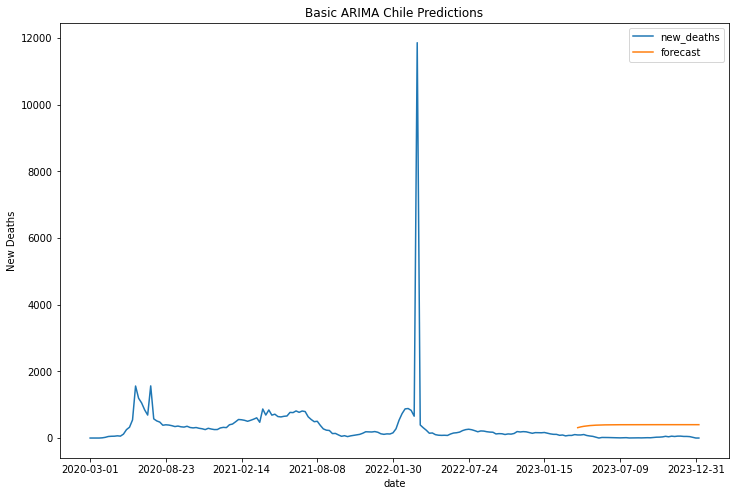

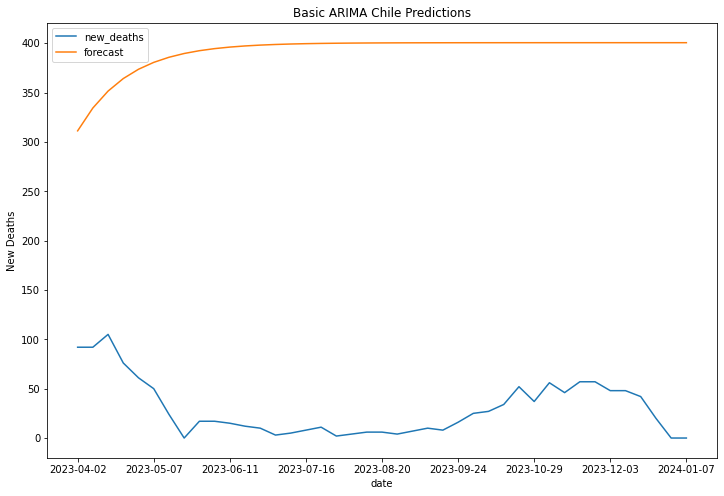

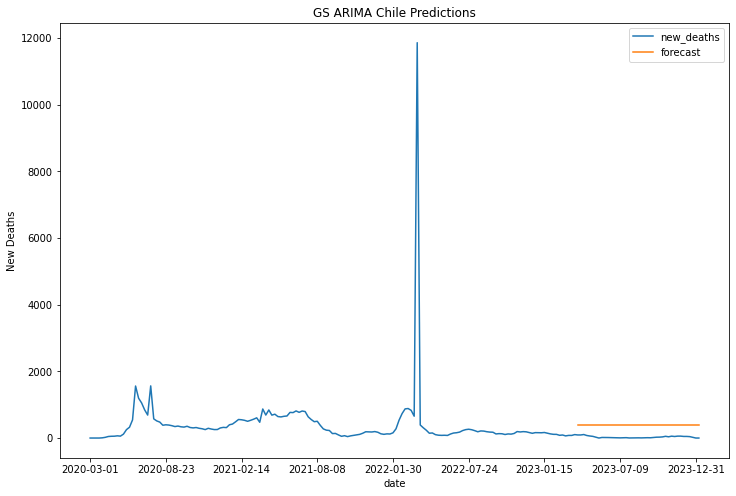

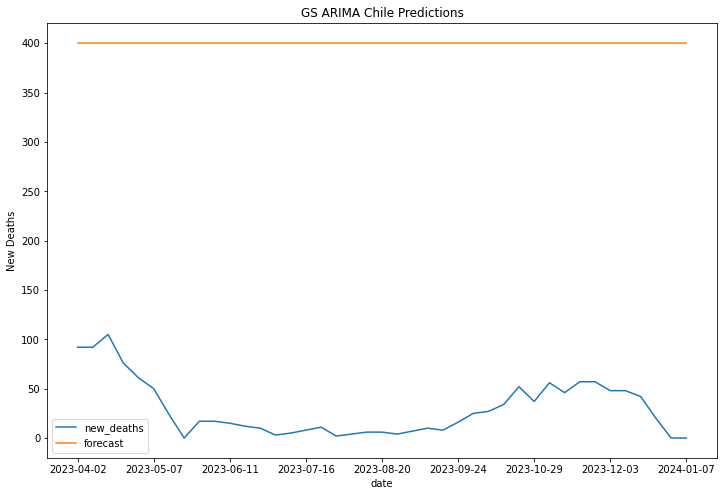

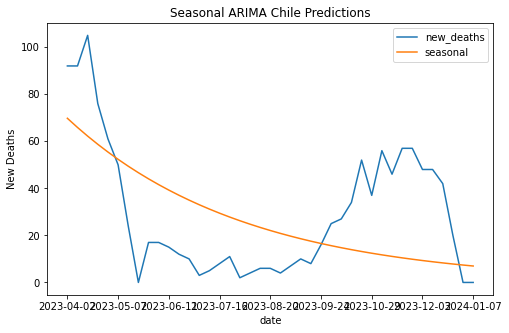

In [251]:
#chile
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(chile_train['new_deaths'],order=(1,0,1))
cmodel_fit=model.fit()


chile['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
chile[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Chile Predictions')
plt.ylabel('New Deaths')
chile_test['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
chile_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Chile Predictions')
plt.ylabel('New Deaths')
actuals = chile_test['new_deaths']  
predictions = chile_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a chile',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(chile_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


xmodel=ARIMA(chile_train['new_deaths'],order=(p,0,q))
c_model_fit=xmodel.fit()

chile['forecast']=c_model_fit.predict(start=161,end=202,dynamic=True)
chile[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Chile Predictions')
plt.ylabel('New Deaths')
chile_test['forecast']=c_model_fit.predict(start=161,end=202,dynamic=True)
chile_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Chile Predictions')
plt.ylabel('New Deaths')

actuals =chile_test['new_deaths']  
predictions = chile_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched chile',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(chile_train['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(chile_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
chile_test['seasonal'] = pred
mae = mean_absolute_error( chile_test['new_deaths'], chile_test['seasonal'])
mase = mean_absolute_scaled_error(chile_test['new_deaths'], chile_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal chile',mae, mase]


chile_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Chile Predictions')
plt.ylabel('New Deaths')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95287D+00    |proj g|=  1.24345D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.243D-09   5.953D+00
  F =   5.9528734154434684     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.38661D+00    |proj g|=  4.65315D-02

At iterate   10    f=  6.25659D+00    |proj g|=  4.97580D-01

At iterate   15    f=  5.98487D+00    |proj g|=  7.14906D-02

At iterate   20    f=  5.94445D+00    |proj g|=  9.45488D-02

At iterate   25    f=  5.91469D+00    |proj g|=  8.26847D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     40      1     0     0   7.269D-07   5.915D+00
  F =   5.9146892441657446     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93610D+00    |proj g|=  5.81449D-02

At iterate    5    f=  5.93395D+00    |proj g|=  1.47411D-02

At iterate   10    f=  5.92174D+00    |proj g|=  4.59297D-02

At iterate   15    f=  5.92019D+00    |proj g|=  1.08987D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     18      1     0     0   2.758D-07   5.920D+00
  F =   5.9201900825390572     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  5.83195D+00    |proj g|=  1.02347D-02

At iterate   15    f=  5.81720D+00    |proj g|=  1.99834D-03

At iterate   20    f=  5.81705D+00    |proj g|=  1.04622D-03

At iterate   25    f=  5.81686D+00    |proj g|=  4.93233D-04

At iterate   30    f=  5.81681D+00    |proj g|=  4.46688D-04

At iterate   35    f=  5.81679D+00    |proj g|=  2.86858D-04

At iterate   40    f=  5.81678D+00    |proj g|=  7.29035D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     49      1     0     0   7.290D-06   5.817D+00
  F =   5.8167836966446291     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  6.10828D+00    |proj g|=  2.73719D-02

At iterate   15    f=  5.91707D+00    |proj g|=  6.62056D-03

At iterate   20    f=  5.83883D+00    |proj g|=  7.86025D-03

At iterate   25    f=  5.82898D+00    |proj g|=  1.10607D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     43      1     0     0   4.363D-06   5.829D+00
  F =   5.8289761028109339     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92107D+00    |proj g|=  1.93083D-02

At iterate    5    f=  5.92045D+00    |proj g|=  1.01298D-02

At iterate   10    f=  5.91447D+00    |proj g|=  3.19086D-02

At iterate   15    f=  5.91345D+00    |proj g|=  2.48148D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   2.481D-06   5.913D+00
  F =   5.9134491279470618     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  5.82178D+00    |proj g|=  4.95528D-03

At iterate   15    f=  5.81479D+00    |proj g|=  2.05765D-02

At iterate   20    f=  5.80843D+00    |proj g|=  5.46210D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   1.688D-05   5.808D+00
  F =   5.8084306816054916     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05547D+01    |proj g|=  3.08103D+00

At iterate    5    f=  8.19756D+00    |proj g|=  4.45934D-01

At iterate   10    f=  5.96411D+00    |proj g|=  1.06447D-01

At iterate   15    f=  5.89971D+00    |proj g|=  1.44589D-04

At iterate   20    f=  5.89961D+00    |proj g|=  5.52117D-04
  ys=-1.050E-01  -gs= 4.615E-04 BFGS update SKIPPED

At iterate   25    f=  5.78994D+00    |proj g|=  3.17069D-03

At iterate   30    f=  5.78968D+00    |proj g|=  4.11563D-03

At iterate   35    f=  5.78926D+00    |proj g|=  1.11466D-03

At iterate   40    f=  5.78914D+00    |proj g|=  6.52075D-04

At iterate   45    f=  5.78909D+00    |proj g|=  7.98244D-04

At iterate   50    f=  5.78908D+00    |proj g|=  1.02111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.37428D+00    |proj g|=  2.76332D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   1.913D-06   5.374D+00
  F =   5.3742598938799508     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92763D+00    |proj g|=  1.03830D+00

At iterate    5    f=  5.55823D+00    |proj g|=  9.82437D-03

At iterate   10    f=  5.51606D+00    |proj g|=  3.07542D-02

At iterate   15    f=  5.38476D+00    |proj g|=  2.71865D-02

At iterate   20    f=  5.37465D+00    |proj g|=  2.13001D-02

At iterate   25    f=  5.37412D+00    |proj g|=  1.50413D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92367D+00    |proj g|=  1.03119D+00

At iterate    5    f=  5.55743D+00    |proj g|=  8.05754D-03

At iterate   10    f=  5.51608D+00    |proj g|=  1.16000D-01

At iterate   15    f=  5.37129D+00    |proj g|=  9.96361D-03

At iterate   20    f=  5.37078D+00    |proj g|=  4.11138D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   4.111D-07   5.371D+00
  F =   5.3707811401969083     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92148D+00    |proj g|=  1.02300D+00

At iterate    5    f=  5.55461D+00    |proj g|=  1.55393D-02

At iterate   10    f=  5.51950D+00    |proj g|=  1.06228D-02

At iterate   15    f=  5.37902D+00    |proj g|=  6.08198D-03

At iterate   20    f=  5.27770D+00    |proj g|=  6.25284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     0   5.804D-06   5.277D+00
  F =   5.2774961702386305     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.53693D+00    |proj g|=  8.23326D-03

At iterate   10    f=  5.50391D+00    |proj g|=  5.92431D-02

At iterate   15    f=  5.42178D+00    |proj g|=  3.32647D-02

At iterate   20    f=  5.36962D+00    |proj g|=  2.82728D-03

At iterate   25    f=  5.36930D+00    |proj g|=  1.38718D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     35      1     0     0   1.105D-06   5.369D+00
  F =   5.3692981710123275     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91528D+00    |proj g|=  1.00735D+00

At iterate    5    f=  5.55502D+00    |proj g|=  7.50420D-03

At iterate   10    f=  5.53647D+00    |proj g|=  2.17005D-02

At iterate   15    f=  5.37023D+00    |proj g|=  1.09984D-01

At iterate   20    f=  5.35916D+00    |proj g|=  5.46431D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     32      1     0     0   9.003D-07   5.359D+00
  F =   5.3591106112179574     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91633D+00    |proj g|=  1.00893D+00

At iterate    5    f=  5.54493D+00    |proj g|=  1.71722D-02

At iterate   10    f=  5.52340D+00    |proj g|=  2.05586D-02

At iterate   15    f=  5.36969D+00    |proj g|=  4.66228D-02

At iterate   20    f=  5.31657D+00    |proj g|=  1.35012D-01

At iterate   25    f=  5.26674D+00    |proj g|=  1.60481D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     41      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  5.39166D+00    |proj g|=  1.72149D-02

At iterate   15    f=  5.30012D+00    |proj g|=  1.37695D-02

At iterate   20    f=  5.27691D+00    |proj g|=  1.45781D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     47      1     0     0   1.458D-03   5.277D+00
  F =   5.2769129696903967     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01048D+00    |proj g|=  1.47288D+00

At iterate    5    f=  5.34511D+00    |proj g|=  1.04767D-02

At iterate   10    f=  5.13264D+00    |proj g|=  1.17777D-01

At iterate   15    f=  5.12939D+00    |proj g|=  1.03866D-03

At iterate   20    f=  5.01599D+00    |proj g|=  1.57683D-01

At iterate   25    f=  4.98108D+00    |proj g|=  2.74913D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     42      1     0     0   

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95969D+00    |proj g|=  1.36070D+00

At iterate    5    f=  5.34219D+00    |proj g|=  1.05826D-02

At iterate   10    f=  5.20351D+00    |proj g|=  2.98664D-01

At iterate   15    f=  5.15063D+00    |proj g|=  4.36958D-03

At iterate   20    f=  5.10573D+00    |proj g|=  3.76977D-01

At iterate   25    f=  4.96361D+00    |proj g|=  3.08134D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     50      1     0     0   1.398D-06   4.964D+00
  F =   4.9635594234071

 This problem is unconstrained.



At iterate    5    f=  5.34301D+00    |proj g|=  1.05818D-02

At iterate   10    f=  5.27922D+00    |proj g|=  9.33497D-02

At iterate   15    f=  5.13440D+00    |proj g|=  3.11493D-01

At iterate   20    f=  5.13230D+00    |proj g|=  1.00455D-02

At iterate   25    f=  5.02749D+00    |proj g|=  3.33594D-01

At iterate   30    f=  4.97510D+00    |proj g|=  8.18855D-02

At iterate   35    f=  4.96308D+00    |proj g|=  8.54306D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     54      1     0     0   7.139D-06   4.963D+00
  F =   4.9630794166591112     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96192D+00    |proj g|=  1.36947D+00

At iterate    5    f=  5.34197D+00    |proj g|=  1.05985D-02

At iterate   10    f=  5.23537D+00    |proj g|=  1.34107D-01

At iterate   15    f=  5.14985D+00    |proj g|=  5.88539D-03

At iterate   20    f=  5.01520D+00    |proj g|=  8.61304D-02

At iterate   25    f=  4.96183D+00    |proj g|=  3.64308D-02

At iterate   30    f=  4.96011D+00    |proj g|=  2.65254D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   15    f=  5.13466D+00    |proj g|=  1.68681D-02

At iterate   20    f=  4.98046D+00    |proj g|=  3.41706D-02

At iterate   25    f=  4.97705D+00    |proj g|=  1.07280D-02

At iterate   30    f=  4.92655D+00    |proj g|=  7.21547D-02

At iterate   35    f=  4.89070D+00    |proj g|=  3.65616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     56      1     0     0   1.238D-05   4.891D+00
  F =   4.8906972828526447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04655D+00    |proj g|=  1.54227D+00

At iterate    5    f=  5.33681D+00    |proj g|=  1.28767D-02

At iterate   10    f=  5.22565D+00    |proj g|=  7.44806D-02

At iterate   15    f=  5.07955D+00    |proj g|=  6.80159D-02

At iterate   20    f=  5.01430D+00    |proj g|=  1.79060D-01

At iterate   25    f=  4.96275D+00    |proj g|=  2.76049D-02

At iterate   30    f=  4.90067D+00    |proj g|=  2.49099D-02

At iterate   35    f=  4.88821D+00    |proj g|=  6.98297D-03

At iterate   40    f=  4.88659D+00    |proj g|=  1.09640D-03

At iterate   45    f=  4.88646D+00    |proj g|=  2.98326D-03

At iterate   50    f=  4.88643D+00    |proj g|=  4.84607D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates s

 This problem is unconstrained.



At iterate   10    f=  5.25821D+00    |proj g|=  1.70883D-01

At iterate   15    f=  5.14110D+00    |proj g|=  2.12930D-02

At iterate   20    f=  5.14052D+00    |proj g|=  3.22037D-02

At iterate   25    f=  5.01845D+00    |proj g|=  1.68622D-01

At iterate   30    f=  4.95286D+00    |proj g|=  1.88148D-02

At iterate   35    f=  4.95229D+00    |proj g|=  3.94501D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     59      1     0     0   1.613D-06   4.952D+00
  F =   4.9522850809446428     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95121D+00    |proj g|=  1.33990D+00

At iterate    5    f=  5.33948D+00    |proj g|=  2.39733D-02

At iterate   10    f=  5.22755D+00    |proj g|=  1.73547D-01

At iterate   15    f=  5.12773D+00    |proj g|=  4.86183D-02

At iterate   20    f=  5.07733D+00    |proj g|=  9.18269D-02

At iterate   25    f=  5.00427D+00    |proj g|=  2.20287D-01

At iterate   30    f=  4.95461D+00    |proj g|=  7.36897D-03

At iterate   35    f=  4.88882D+00    |proj g|=  1.69624D-02

At iterate   40    f=  4.88799D+00    |proj g|=  5.35181D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.10374D+00    |proj g|=  1.63587D+00

At iterate    5    f=  5.34950D+00    |proj g|=  1.04663D-02

At iterate   10    f=  5.08722D+00    |proj g|=  2.29662D-01

At iterate   15    f=  4.98071D+00    |proj g|=  1.08849D-03

At iterate   20    f=  4.93145D+00    |proj g|=  9.97108D-03

At iterate   25    f=  4.91303D+00    |proj g|=  3.27695D-02

At iterate   30    f=  4.89314D+00    |proj g|=  3.35963D-02

At iterate   35    f=  4.89151D+00    |proj g|=  5.12617D-03

At iterate   40    f=  4.89045D+00    |proj g|=  5.83558D-03

At iterate   45    f=  4.89045D+00    |proj g|=  1.11370D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86343D+00    |proj g|=  1.28437D-01

At iterate    5    f=  4.84630D+00    |proj g|=  1.92934D-03

At iterate   10    f=  4.84615D+00    |proj g|=  1.73297D-04

At iterate   15    f=  4.84614D+00    |proj g|=  4.11612D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   8.260D-07   4.846D+00
  F =   4.8461402707233994     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.84514D+00    |proj g|=  1.78231D-02

At iterate   15    f=  4.84032D+00    |proj g|=  2.02937D-02

At iterate   20    f=  4.83531D+00    |proj g|=  4.12657D-03

At iterate   25    f=  4.83457D+00    |proj g|=  9.37304D-04

At iterate   30    f=  4.83442D+00    |proj g|=  1.77820D-04

At iterate   35    f=  4.83438D+00    |proj g|=  1.21284D-04

At iterate   40    f=  4.83436D+00    |proj g|=  6.05262D-05

At iterate   45    f=  4.83436D+00    |proj g|=  5.80639D-05

At iterate   50    f=  4.83436D+00    |proj g|=  2.41372D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     56   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85378D+00    |proj g|=  4.43249D-02

At iterate    5    f=  4.83400D+00    |proj g|=  4.07638D-03

At iterate   10    f=  4.83279D+00    |proj g|=  1.30519D-03

At iterate   15    f=  4.83271D+00    |proj g|=  8.47929D-04

At iterate   20    f=  4.83267D+00    |proj g|=  6.35737D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   7.001D-06   4.833D+00
  F =   4.8326651207529370     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87438D+00    |proj g|=  1.43746D-01

At iterate    5    f=  4.84626D+00    |proj g|=  2.59666D-03

At iterate   10    f=  4.84624D+00    |proj g|=  6.55047D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     17      1     0     0   9.097D-06   4.846D+00
  F =   4.8462404929441387     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87613D+00    |proj g|=  1.84680D-01

At iterate    5    f=  4.84555D+00    |proj g|=  1.00085D-02

At iterate   10    f=  4.83607D+00    |proj g|=  1.34170D-02

At iterate   15    f=  4.83409D+00    |proj g|=  7.34123D-03

At iterate   20    f=  4.83318D+00    |proj g|=  6.07812D-04

At iterate   25    f=  4.83317D+00    |proj g|=  3.24532D-04

At iterate   30    f=  4.83316D+00    |proj g|=  3.23426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86349D+00    |proj g|=  2.68132D-02

At iterate    5    f=  4.84324D+00    |proj g|=  1.89965D-03

At iterate   10    f=  4.84286D+00    |proj g|=  7.22911D-04

At iterate   15    f=  4.84232D+00    |proj g|=  2.28910D-03

At iterate   20    f=  4.83172D+00    |proj g|=  1.31582D-03

At iterate   25    f=  4.83163D+00    |proj g|=  4.74471D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     38      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.65550D+00    |proj g|=  3.93356D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   3.934D-06   4.655D+00
  F =   4.6554954624274973     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73943D+00    |proj g|=  3.21160D-01


 This problem is unconstrained.



At iterate    5    f=  4.65533D+00    |proj g|=  3.67305D-03

At iterate   10    f=  4.65430D+00    |proj g|=  4.81942D-03

At iterate   15    f=  4.65406D+00    |proj g|=  2.29825D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   2.298D-06   4.654D+00
  F =   4.6540598545892475     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73377D+00    |proj g|=  3.12042D-01

At iterate    5    f=  4.65634D+00    |proj g|=  5.33814D-03

At iterate   10    f=  4.65554D+00    |proj g|=  8.85476D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   2.116D-05   4.655D+00
  F =   4.6554081992815011     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   15    f=  4.64590D+00    |proj g|=  3.79641D-03

At iterate   20    f=  4.64426D+00    |proj g|=  3.52228D-03

At iterate   25    f=  4.64401D+00    |proj g|=  5.33019D-03

At iterate   30    f=  4.64385D+00    |proj g|=  1.96015D-04

At iterate   35    f=  4.64380D+00    |proj g|=  2.39947D-04

At iterate   40    f=  4.64378D+00    |proj g|=  1.05012D-03

At iterate   45    f=  4.64377D+00    |proj g|=  3.75670D-04

At iterate   50    f=  4.64377D+00    |proj g|=  5.32239D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   5.322D-04   4.644D+00
  F =   4.64376856434

 This problem is unconstrained.



At iterate    5    f=  4.64634D+00    |proj g|=  1.54291D-02

At iterate   10    f=  4.64541D+00    |proj g|=  9.64714D-03

At iterate   15    f=  4.64348D+00    |proj g|=  1.10019D-03

At iterate   20    f=  4.64344D+00    |proj g|=  3.34692D-03

At iterate   25    f=  4.64305D+00    |proj g|=  1.16554D-03

At iterate   30    f=  4.64296D+00    |proj g|=  1.90095D-03

At iterate   35    f=  4.64290D+00    |proj g|=  1.23467D-03

At iterate   40    f=  4.64288D+00    |proj g|=  8.44518D-04

At iterate   45    f=  4.64287D+00    |proj g|=  5.34083D-04

At iterate   50    f=  4.64287D+00    |proj g|=  7.10162D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  4.65344D+00    |proj g|=  2.75305D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   6.329D-06   4.653D+00
  F =   4.6534389495710116     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73790D+00    |proj g|=  2.97796D-01

At iterate    5    f=  4.65319D+00    |proj g|=  6.02334D-03

At iterate   10    f=  4.64697D+00    |proj g|=  1.14667D-02

At iterate   15    f=  4.64377D+00    |proj g|=  8.10396D-03

At iterate   20    f=  4.64350D+00    |proj g|=  9.24455D-04

At iterate   25    f=  4.64308D+00    |proj g|=  2.45680D-03

At iterate   30    f=  4.64300D+00    |proj g|=  1.47728D-03

At iterate   35    f=  4.64294D+00    |proj g|=  1.43313D-03

At iterate   40    f=  4.64293D+00    |proj g|=  7.01906D-04

At iterate   45    f=  4.64292D+00    |proj g|=  8.17325D-05

At iterate   50    f=  4.64292D+00    |proj g|=  8.37729D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates s

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73218D+00    |proj g|=  2.74454D-01

At iterate    5    f=  4.66682D+00    |proj g|=  3.03795D-02

At iterate   10    f=  4.65698D+00    |proj g|=  3.37428D-03

At iterate   15    f=  4.65621D+00    |proj g|=  1.63223D-03

At iterate   20    f=  4.65572D+00    |proj g|=  9.88406D-04

At iterate   25    f=  4.65562D+00    |proj g|=  1.99658D-03

At iterate   30    f=  4.64701D+00    |proj g|=  5.72327D-02
  ys=-9.542E-06  -gs= 2.801E-04 BFGS update SKIPPED
  ys=-4.197E-07  -gs= 3.043E-07 BFGS update SKIPPED

At iterate   35    f=  4.64673D+00    |proj g|=  5.87930D-02

At iterate   40    f=  4.64629D+00    |proj g|=  1.13336D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  4.64501D+00    |proj g|=  5.17874D-02
  ys=-2.170E-08  -gs= 3.164E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  4.64490D+00    |proj g|=  8.50617D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50    179      3     3     0   8.506D-02   4.645D+00
  F =   4.6449035167494603     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.64629D+00    |proj g|=  2.85728D-01

At iterate    5    f=  4.60991D+00    |proj g|=  1.40848D-02

At iterate   10    f=  4.60469D+00    |proj g|=  5.65594D-03

At iterate   15    f=  4.60436D+00    |proj g|=  1.08215D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   1.082D-05   4.604D+00
  F =   4.6043575636789820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.66176D+00    |proj g|=  3.12274D-01

At iterate    5    f=  4.60747D+00    |proj g|=  6.85781D-03

At iterate   10    f=  4.60445D+00    |proj g|=  9.39009D-03

At iterate   15    f=  4.60202D+00    |proj g|=  1.67836D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     22      1     0     0   4.899D-06   4.602D+00
  F =   4.6020174553046189     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.65832D+00    |proj g|=  3.11942D-01

At iterate    5    f=  4.60804D+00    |proj g|=  1.27440D-02

At iterate   10    f=  4.60541D+00    |proj g|=  1.33087D-02

At iterate   15    f=  4.60275D+00    |proj g|=  1.14421D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     20      1     0     0   3.728D-07   4.603D+00
  F =   4.6027470297957782     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.66909D+00    |proj g|=  3.22679D-01

At iterate    5    f=  4.60749D+00    |proj g|=  1.36425D-02

At iterate   10    f=  4.60013D+00    |proj g|=  1.37606D-02

At iterate   15    f=  4.59430D+00    |proj g|=  7.32516D-03

At iterate   20    f=  4.58951D+00    |proj g|=  2.25570D-03

At iterate   25    f=  4.58906D+00    |proj g|=  2.03644D-03

At iterate   30    f=  4.58854D+00    |proj g|=  1.25365D-03

At iterate   35    f=  4.58843D+00    |proj g|=  1.06480D-03

At iterate   40    f=  4.58840D+00    |proj g|=  8.31111D-04

At iterate   45    f=  4.58839D+00    |proj g|=  4.93329D-04

At iterate   50    f=  4.58838D+00    |proj g|=  4.67092D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  4.59513D+00    |proj g|=  5.17139D-02

At iterate   10    f=  4.59085D+00    |proj g|=  9.01971D-03

At iterate   15    f=  4.58921D+00    |proj g|=  1.35865D-02

At iterate   20    f=  4.58900D+00    |proj g|=  2.46010D-03

At iterate   25    f=  4.58851D+00    |proj g|=  1.11800D-02

At iterate   30    f=  4.58825D+00    |proj g|=  5.61001D-03

At iterate   35    f=  4.58796D+00    |proj g|=  1.37506D-03

At iterate   40    f=  4.58792D+00    |proj g|=  1.20472D-03

At iterate   45    f=  4.58783D+00    |proj g|=  1.16096D-03

At iterate   50    f=  4.58781D+00    |proj g|=  1.00156D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67183D+00    |proj g|=  3.34655D-01

At iterate    5    f=  4.60636D+00    |proj g|=  6.63797D-03

At iterate   10    f=  4.60355D+00    |proj g|=  8.94019D-03

At iterate   15    f=  4.60126D+00    |proj g|=  4.43398D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   6.660D-06   4.601D+00
  F =   4.6012635274166200     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67387D+00    |proj g|=  3.35711D-01

At iterate    5    f=  4.60503D+00    |proj g|=  1.01784D-02

At iterate   10    f=  4.59717D+00    |proj g|=  1.33761D-02

At iterate   15    f=  4.59140D+00    |proj g|=  3.80281D-03

At iterate   20    f=  4.58994D+00    |proj g|=  5.24263D-03

At iterate   25    f=  4.58836D+00    |proj g|=  8.40553D-04

At iterate   30    f=  4.58808D+00    |proj g|=  4.71718D-03

At iterate   35    f=  4.58793D+00    |proj g|=  8.00806D-04

At iterate   40    f=  4.58789D+00    |proj g|=  5.02102D-04

At iterate   45    f=  4.58786D+00    |proj g|=  1.46325D-03

At iterate   50    f=  4.58785D+00    |proj g|=  7.53608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.66709D+00    |proj g|=  2.85404D-01

At iterate    5    f=  4.61788D+00    |proj g|=  3.65294D-02

At iterate   10    f=  4.60586D+00    |proj g|=  3.10377D-02

At iterate   15    f=  4.60451D+00    |proj g|=  8.47943D-04

At iterate   20    f=  4.60449D+00    |proj g|=  2.82150D-03

At iterate   25    f=  4.60445D+00    |proj g|=  5.37185D-03

At iterate   30    f=  4.60420D+00    |proj g|=  2.15287D-03

At iterate   35    f=  4.60399D+00    |proj g|=  8.29828D-04

At iterate   40    f=  4.60392D+00    |proj g|=  3.92129D-03

At iterate   45    f=  4.58944D+00    |proj g|=  3.09213D-02

At iterate   50    f=  4.58831D+00    |proj g|=  3.15551D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60084D+00    |proj g|=  1.25336D-01

At iterate    5    f=  4.58967D+00    |proj g|=  1.28840D-03

At iterate   10    f=  4.58961D+00    |proj g|=  3.63939D-03

At iterate   15    f=  4.58957D+00    |proj g|=  2.90079D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   2.901D-06   4.590D+00
  F =   4.5895671250324304     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.58926D+00    |proj g|=  8.63748D-03

At iterate   10    f=  4.58209D+00    |proj g|=  1.91412D-02

At iterate   15    f=  4.57787D+00    |proj g|=  2.99327D-03

At iterate   20    f=  4.57714D+00    |proj g|=  1.19379D-03

At iterate   25    f=  4.57657D+00    |proj g|=  1.99323D-03

At iterate   30    f=  4.57645D+00    |proj g|=  4.38315D-04

At iterate   35    f=  4.57641D+00    |proj g|=  1.00541D-04

At iterate   40    f=  4.57640D+00    |proj g|=  8.31163D-05

At iterate   45    f=  4.57639D+00    |proj g|=  7.54995D-05

At iterate   50    f=  4.57639D+00    |proj g|=  1.84482D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.57903D+00    |proj g|=  5.92957D-03

At iterate   10    f=  4.57817D+00    |proj g|=  6.84374D-03

At iterate   15    f=  4.57765D+00    |proj g|=  5.61971D-03

At iterate   20    f=  4.57676D+00    |proj g|=  6.03831D-03

At iterate   25    f=  4.57655D+00    |proj g|=  2.82069D-03

At iterate   30    f=  4.57641D+00    |proj g|=  1.16958D-03

At iterate   35    f=  4.57636D+00    |proj g|=  5.30431D-04

At iterate   40    f=  4.57635D+00    |proj g|=  1.50805D-03

At iterate   45    f=  4.57634D+00    |proj g|=  2.66914D-04

At iterate   50    f=  4.57634D+00    |proj g|=  1.19039D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  4.58854D+00    |proj g|=  2.82379D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   2.550D-06   4.589D+00
  F =   4.5885412118125251     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60565D+00    |proj g|=  1.47943D-01


 This problem is unconstrained.



At iterate    5    f=  4.58815D+00    |proj g|=  7.87833D-03

At iterate   10    f=  4.58545D+00    |proj g|=  2.64135D-02

At iterate   15    f=  4.57923D+00    |proj g|=  9.13557D-03

At iterate   20    f=  4.57740D+00    |proj g|=  2.47749D-03

At iterate   25    f=  4.57689D+00    |proj g|=  3.69183D-03

At iterate   30    f=  4.57648D+00    |proj g|=  4.48749D-04

At iterate   35    f=  4.57639D+00    |proj g|=  3.76240D-04

At iterate   40    f=  4.57636D+00    |proj g|=  2.32648D-04

At iterate   45    f=  4.57635D+00    |proj g|=  2.95881D-04

At iterate   50    f=  4.57634D+00    |proj g|=  1.37842D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.59673D+00    |proj g|=  7.20136D-03

At iterate   10    f=  4.59420D+00    |proj g|=  1.08210D-03

At iterate   15    f=  4.59398D+00    |proj g|=  4.74825D-04

At iterate   20    f=  4.59300D+00    |proj g|=  5.52852D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     69      2     0     0   1.783D-02   4.583D+00
  F =   4.5826474401059158     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58956D+00    |proj g|=  3.43457D-02

At iterate    5    f=  4.58882D+00    |proj g|=  8.37326D-04

At iterate   10    f=  4.58873D+00    |proj g|=  1.10742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   1.275D-05   4.589D+00
  F =   4.5887121247452507     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  4.58632D+00    |proj g|=  4.73558D-03

At iterate   15    f=  4.58626D+00    |proj g|=  1.13042D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   2.185D-06   4.586D+00
  F =   4.5862631913153411     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59814D+00    |proj g|=  1.37025D-01


 This problem is unconstrained.



At iterate    5    f=  4.58444D+00    |proj g|=  2.58588D-03

At iterate   10    f=  4.58434D+00    |proj g|=  2.31270D-03

At iterate   15    f=  4.58418D+00    |proj g|=  4.63560D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     20      1     0     0   1.066D-05   4.584D+00
  F =   4.5841844267329401     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59489D+00    |proj g|=  9.95644D-02

At iterate    5    f=  4.58602D+00    |proj g|=  1.50355D-03

At iterate   10    f=  4.58592D+00    |proj g|=  3.09592D-03

At iterate   15    f=  4.58584D+00    |proj g|=  4.60223D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   6.317D-06   4.586D+00
  F =   4.5858401678984366     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60224D+00    |proj g|=  1.63597D-01

At iterate    5    f=  4.58497D+00    |proj g|=  1.42134D-02

At iterate   10    f=  4.57820D+00    |proj g|=  3.64358D-02

At iterate   15    f=  4.57410D+00    |proj g|=  6.52750D-03

At iterate   20    f=  4.57267D+00    |proj g|=  5.58335D-03

At iterate   25    f=  4.57230D+00    |proj g|=  1.50053D-03

At iterate   30    f=  4.57184D+00    |proj g|=  1.75610D-04

At iterate   35    f=  4.57181D+00    |proj g|=  1.36206D-03

At iterate   40    f=  4.57178D+00    |proj g|=  9.21003D-04

At iterate   45    f=  4.57176D+00    |proj g|=  2.89742D-04

At iterate   50    f=  4.57176D+00    |proj g|=  2.22904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  4.57489D+00    |proj g|=  5.91372D-03

At iterate   10    f=  4.57358D+00    |proj g|=  7.61966D-03

At iterate   15    f=  4.57303D+00    |proj g|=  8.49917D-04

At iterate   20    f=  4.57210D+00    |proj g|=  2.55617D-03

At iterate   25    f=  4.57190D+00    |proj g|=  1.49276D-03

At iterate   30    f=  4.57175D+00    |proj g|=  2.02462D-03

At iterate   35    f=  4.57167D+00    |proj g|=  4.03703D-04

At iterate   40    f=  4.57166D+00    |proj g|=  6.17532D-04

At iterate   45    f=  4.57164D+00    |proj g|=  2.34666D-04

At iterate   50    f=  4.57163D+00    |proj g|=  2.02345D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60049D+00    |proj g|=  1.20349D-01

At iterate    5    f=  4.58344D+00    |proj g|=  1.34623D-03

At iterate   10    f=  4.58317D+00    |proj g|=  1.75847D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     17      1     0     0   4.964D-06   4.583D+00
  F =   4.5831624542905445     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  4.58269D+00    |proj g|=  5.92178D-03

At iterate   10    f=  4.58067D+00    |proj g|=  1.63552D-02

At iterate   15    f=  4.57412D+00    |proj g|=  1.30644D-02

At iterate   20    f=  4.57300D+00    |proj g|=  2.57741D-03

At iterate   25    f=  4.57259D+00    |proj g|=  5.64757D-03

At iterate   30    f=  4.57182D+00    |proj g|=  1.15008D-03

At iterate   35    f=  4.57171D+00    |proj g|=  4.01523D-04

At iterate   40    f=  4.57167D+00    |proj g|=  1.15155D-03

At iterate   45    f=  4.57165D+00    |proj g|=  7.14615D-04

At iterate   50    f=  4.57164D+00    |proj g|=  5.54996D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60776D+00    |proj g|=  4.88001D-02

At iterate    5    f=  4.59236D+00    |proj g|=  1.21664D-02

At iterate   10    f=  4.58892D+00    |proj g|=  4.11196D-03

At iterate   15    f=  4.58847D+00    |proj g|=  1.00928D-03

At iterate   20    f=  4.58802D+00    |proj g|=  4.75803D-03
  ys=-1.511E-03  -gs= 1.759E-04 BFGS update SKIPPED

At iterate   25    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61629D+00    |proj g|=  2.03292D-01

At iterate    5    f=  4.58920D+00    |proj g|=  3.14672D-02

At iterate   10    f=  4.58278D+00    |proj g|=  1.57379D-03

At iterate   15    f=  4.58277D+00    |proj g|=  6.64214D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     21      1     0     0   3.139D-06   4.583D+00
  F =   4.5827669636438353     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  4.58900D+00    |proj g|=  1.06414D-02

At iterate   10    f=  4.58181D+00    |proj g|=  9.28499D-03

At iterate   15    f=  4.58131D+00    |proj g|=  1.77784D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     21      1     0     0   2.741D-06   4.581D+00
  F =   4.5813007677819169     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60050D+00    |proj g|=  1.16436D-01

At iterate    5    f=  4.59008D+00    |proj g|=  1.07799D-02

At iterate   10    f=  4.58264D+00    |proj g|=  1.06016D-02

At iterate   15    f=  4.58241D+00    |proj g|=  5.34303D-04

At iterate   20    f=  4.58241D+00    |proj g|=  2.85549D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   2.855D-06   4.582D+00
  F =   4.5824098607708592     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60922D+00    |proj g|=  1.88541D-01

At iterate    5    f=  4.58865D+00    |proj g|=  2.78022D-02

At iterate   10    f=  4.57565D+00    |proj g|=  1.25530D-02

At iterate   15    f=  4.57444D+00    |proj g|=  1.24367D-02

At iterate   20    f=  4.57140D+00    |proj g|=  6.81750D-03

At iterate   25    f=  4.56951D+00    |proj g|=  7.11422D-03

At iterate   30    f=  4.56895D+00    |proj g|=  2.77887D-03

At iterate   35    f=  4.56877D+00    |proj g|=  4.65540D-04

At iterate   40    f=  4.56872D+00    |proj g|=  2.26319D-03

At iterate   45    f=  4.56871D+00    |proj g|=  2.52647D-04

At iterate   50    f=  4.56870D+00    |proj g|=  8.24429D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  4.57538D+00    |proj g|=  9.33588D-03

At iterate   10    f=  4.57251D+00    |proj g|=  1.52867D-02

At iterate   15    f=  4.57007D+00    |proj g|=  4.74123D-03

At iterate   20    f=  4.56996D+00    |proj g|=  1.41070D-03

At iterate   25    f=  4.56952D+00    |proj g|=  1.01627D-02

At iterate   30    f=  4.56894D+00    |proj g|=  3.41051D-03

At iterate   35    f=  4.56872D+00    |proj g|=  9.26144D-04

At iterate   40    f=  4.56864D+00    |proj g|=  6.58792D-04

At iterate   45    f=  4.56861D+00    |proj g|=  9.23961D-04

At iterate   50    f=  4.56859D+00    |proj g|=  5.76555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60882D+00    |proj g|=  1.41156D-01

At iterate    5    f=  4.58784D+00    |proj g|=  1.05281D-02

At iterate   10    f=  4.58070D+00    |proj g|=  7.39783D-03

At iterate   15    f=  4.58045D+00    |proj g|=  1.46549D-04

At iterate   20    f=  4.58045D+00    |proj g|=  1.56026D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     23      1     0     0   1.560D-05   4.580D+00
  F =   4.5804470722712542     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  4.58716D+00    |proj g|=  1.31021D-02

At iterate   10    f=  4.57829D+00    |proj g|=  6.86005D-02

At iterate   15    f=  4.57461D+00    |proj g|=  6.00684D-03

At iterate   20    f=  4.57187D+00    |proj g|=  7.13831D-03

At iterate   25    f=  4.57016D+00    |proj g|=  6.52950D-03

At iterate   30    f=  4.56905D+00    |proj g|=  3.67103D-03

At iterate   35    f=  4.56877D+00    |proj g|=  9.10993D-04

At iterate   40    f=  4.56868D+00    |proj g|=  8.99961D-04

At iterate   45    f=  4.56864D+00    |proj g|=  1.30702D-03

At iterate   50    f=  4.56861D+00    |proj g|=  3.14343D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61419D+00    |proj g|=  6.75153D-02

At iterate    5    f=  4.59437D+00    |proj g|=  1.91728D-02

At iterate   10    f=  4.58546D+00    |proj g|=  4.11941D-03

At iterate   15    f=  4.58521D+00    |proj g|=  7.13076D-04

At iterate   20    f=  4.58515D+00    |proj g|=  2.77106D-04

At iterate   25    f=  4.58512D+00    |proj g|=  4.71696D-03

At iterate   30    f=  4.58496D+00    |proj g|=  1.61551D-03

At iterate   35    f=  4.58488D+00    |proj g|=  6.27984D-04

At iterate   40    f=  4.58032D+00    |proj g|=  2.56070D-01
  ys=-1.046E+01  -gs= 3.370E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     43    135      3     1     0   3.241D-01   4.579D+00
  F =   4.5794234903445776     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60776D+00    |proj g|=  4.88001D-02


 This problem is unconstrained.



At iterate    5    f=  4.59236D+00    |proj g|=  1.21664D-02

At iterate   10    f=  4.58892D+00    |proj g|=  4.11196D-03

At iterate   15    f=  4.58847D+00    |proj g|=  1.00928D-03

At iterate   20    f=  4.58802D+00    |proj g|=  4.75803D-03
  ys=-1.511E-03  -gs= 1.759E-04 BFGS update SKIPPED

At iterate   25    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     37      1     1     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


Text(0, 0.5, 'New Deaths')

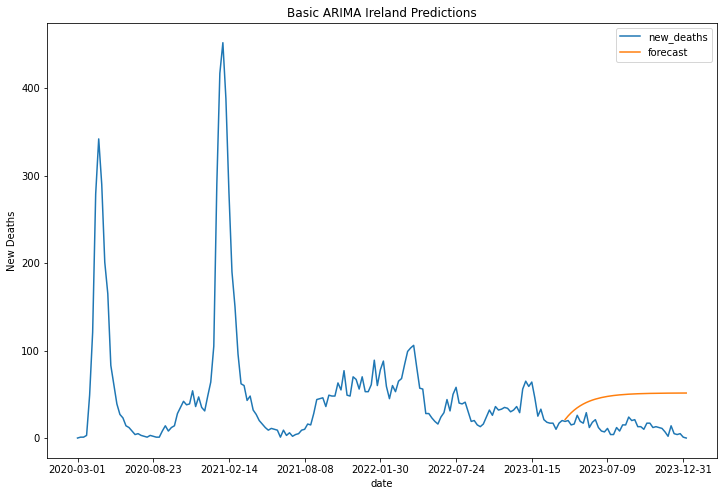

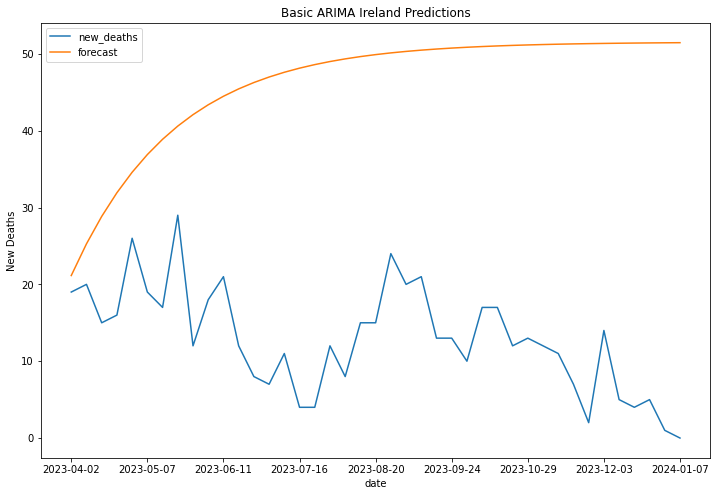

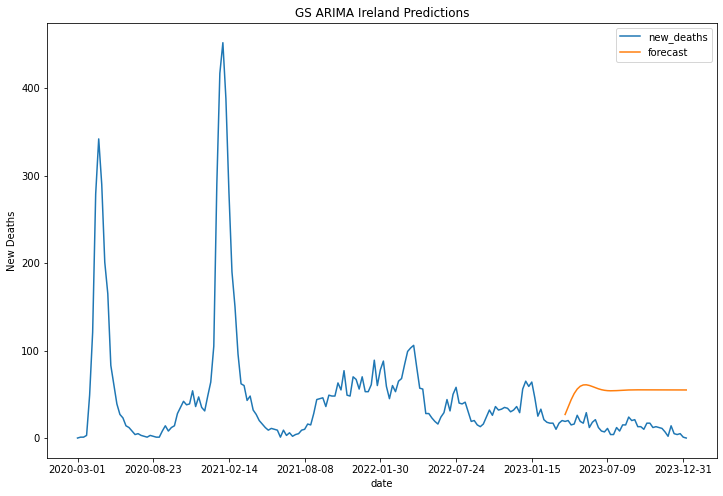

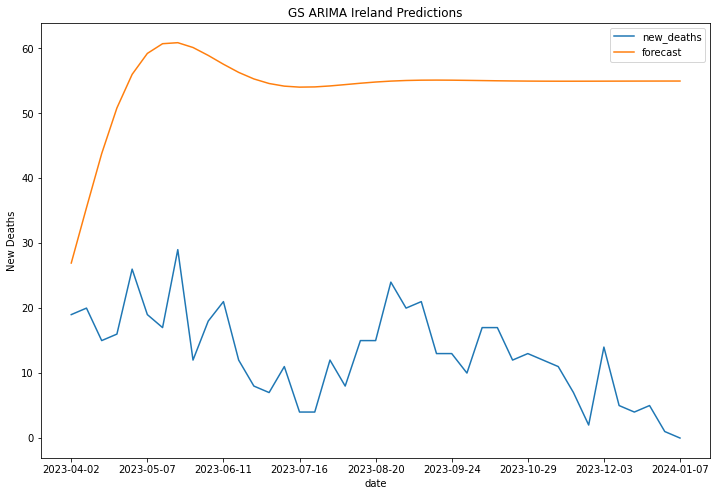

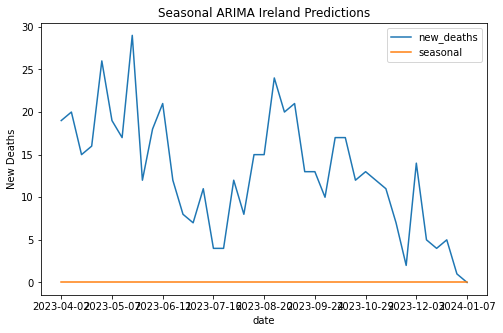

In [252]:
#ireland
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(irela_train['new_deaths'],order=(1,0,1))
m=model.fit()


irela['forecast']=m.predict(start=161,end=202,dynamic=True)
irela[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Ireland Predictions')
plt.ylabel('New Deaths')
irela_test['forecast']=m.predict(start=161,end=202,dynamic=True)
irela_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Ireland Predictions')
plt.ylabel('New Deaths')
actuals = irela_test['new_deaths']  
predictions = irela_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a irela',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(irela_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model=ARIMA(irela_train['new_deaths'],order=(p,0,q))
m2=model.fit()

irela['forecast']=m2.predict(start=161,end=202,dynamic=True)
irela[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Ireland Predictions')
plt.ylabel('New Deaths')
irela_test['forecast']=m2.predict(start=161,end=202,dynamic=True)
irela_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Ireland Predictions')
plt.ylabel('New Deaths')

actuals =irela_test['new_deaths']  
predictions = irela_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched irela',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(irela_train['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,13)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(irela_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,13))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
irela_test['seasonal'] = pred
mae = mean_absolute_error( irela_test['new_deaths'],irela_test['seasonal'])
mase = mean_absolute_scaled_error(irela_test['new_deaths'],irela_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal irela',mae, mase]


irela_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Ireland Predictions')
plt.ylabel('New Deaths')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75774D+00    |proj g|=  9.29035D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   9.290D-08   3.758D+00
  F =   3.7577406752688947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.3

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.64508D+00    |proj g|=  3.92064D-03

At iterate   15    f=  3.64496D+00    |proj g|=  1.09855D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   1.099D-05   3.645D+00
  F =   3.6449627724540687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01561D+00    |proj g|=  5.44893D-01

At iterate    5    f=  3.65100D+00    |proj g|=  1.91765D-02

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  2.43754D+01    |proj g|=  3.53939D+01

At iterate   30    f=  5.47088D+00    |proj g|=  1.62175D+00

At iterate   35    f=  3.71721D+00    |proj g|=  5.37037D-02

At iterate   40    f=  3.68540D+00    |proj g|=  9.92533D-04

At iterate   45    f=  3.68537D+00    |proj g|=  1.61425D-03

At iterate   50    f=  3.65872D+00    |proj g|=  6.27842D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     85      1     0     0   6.278D-02   3.659D+00
  F =   3.6587187111747763     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  3.66852D+00    |proj g|=  1.23603D-01

At iterate   10    f=  3.64576D+00    |proj g|=  4.47080D-03

At iterate   15    f=  3.64498D+00    |proj g|=  1.07216D-03

At iterate   20    f=  3.64494D+00    |proj g|=  5.51097D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   5.511D-06   3.645D+00
  F =   3.6449439936923773     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.03120D+04    |proj g|=  6.20568D+06

At iterate   10    f=  1.09391D+04    |proj g|=  3.12391D+05

At iterate   15    f=  1.47313D+03    |proj g|=  1.55529D+04

At iterate   20    f=  1.88691D+02    |proj g|=  7.43330D+02

At iterate   25    f=  2.44294D+01    |proj g|=  3.55270D+01

At iterate   30    f=  5.61289D+00    |proj g|=  1.74816D+00

At iterate   35    f=  3.68792D+00    |proj g|=  8.72500D-02

At iterate   40    f=  3.64852D+00    |proj g|=  1.48498D-03

At iterate   45    f=  3.64848D+00    |proj g|=  7.37921D-04

At iterate   50    f=  3.64824D+00    |proj g|=  6.18748D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     20      1     0     0   2.468D-05   3.645D+00
  F =   3.6449439922012195     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43191D+00    |proj g|=  1.39614D-01

At iterate    5    f=  3.39776D+00    |proj g|=  1.00677D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.35332D+00    |proj g|=  3.85242D-02

At iterate   10    f=  3.35218D+00    |proj g|=  2.10743D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   7.976D-08   3.352D+00
  F =   3.3521741415033399     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39849D+00    |proj g|=  6.60690D-02

At iterate    5    f=  3.36748D+00    |proj g|=  1.25221D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   4.162D-06   3.367D+00
  F =   3.3674737810096707     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   15    f=  3.35211D+00    |proj g|=  2.77023D-03

At iterate   20    f=  3.35209D+00    |proj g|=  1.37559D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   7.493D-07   3.352D+00
  F =   3.3520897675462171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45248D+00    |proj g|=  2.27447D-01

At iterate    5    f=  3.37292D+00    |proj g|=  2.96236D-02

At iterate   10    f=  3.35582D+00    |proj g|=  6.63228D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     13      1     0     0   1.979D-06   3.356D+00
  F =   3.3558174486451335     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  3.36069D+00    |proj g|=  4.68894D-02

At iterate   10    f=  3.35262D+00    |proj g|=  8.62471D-03

At iterate   15    f=  3.35209D+00    |proj g|=  2.65077D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   3.391D-06   3.352D+00
  F =   3.3520897661662148     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32382D+00    |proj g|=  4.44432D-01

At iterate    5    f=  3.19041D+00    |proj g|=  2.94682D-02

At iterate   10    f=  3.18919D+00    |proj g|=  1.28306D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   1.122D-05   3.189D+00
  F =   3.1891912630492061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26561D+00    |proj g|=  3.56463D-01

At iterate    5    f=  3.16634D+00    |proj g|=  1.14774D-01

At iterate   10    f=  3.16356D+00    |proj g|=  7.43286D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   3.151D-07   3.164D+00
  F =   3.1635582572649845     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  3.15212D+00    |proj g|=  3.22465D-02

At iterate   10    f=  3.14130D+00    |proj g|=  6.32010D-02

At iterate   15    f=  3.13864D+00    |proj g|=  6.12739D-03

At iterate   20    f=  3.13797D+00    |proj g|=  4.25488D-03

At iterate   25    f=  3.13794D+00    |proj g|=  2.02619D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     33      1     0     0   3.800D-06   3.138D+00
  F =   3.1379419926679510     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32382D+00    |proj g|=  4.44432D-01

At iterate    5    f=  3.14894D+00    |proj g|=  7.16439D-02

At iterate   10    f=  3.13990D+00    |proj g|=  8.12303D-03

At iterate   15    f=  3.13882D+00    |proj g|=  3.87020D-02

At iterate   20    f=  3.13805D+00    |proj g|=  1.87316D-03

At iterate   25    f=  3.13796D+00    |proj g|=  7.88215D-04

At iterate   30    f=  3.13795D+00    |proj g|=  8.88259D-04

At iterate   35    f=  3.13794D+00    |proj g|=  3.83498D-04

At iterate   40    f=  3.13794D+00    |proj g|=  5.57356D-05

At iterate   45    f=  3.13794D+00    |proj g|=  3.99847D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32382D+00    |proj g|=  4.44432D-01

At iterate    5    f=  3.14926D+00    |proj g|=  4.85775D-02

At iterate   10    f=  3.13964D+00    |proj g|=  1.42290D-02

At iterate   15    f=  3.13873D+00    |proj g|=  1.69675D-02

At iterate   20    f=  3.13795D+00    |proj g|=  4.35207D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     29      1     0     0   3.599D-05   3.138D+00
  F =   3.1379419936668467     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94248D+00    |proj g|=  2.26967D-01

At iterate    5    f=  2.85249D+00    |proj g|=  2.23012D-02

At iterate   10    f=  2.84137D+00    |proj g|=  2.94179D-03

At iterate   15    f=  2.84099D+00    |proj g|=  3.19367D-03

At iterate   20    f=  2.84089D+00    |proj g|=  5.11966D-04

At iterate   25    f=  2.84086D+00    |proj g|=  5.15445D-04

At iterate   30    f=  2.84084D+00    |proj g|=  1.12997D-04

At iterate   35    f=  2.84084D+00    |proj g|=  3.34765D-04

At iterate   40    f=  2.84084D+00    |proj g|=  2.14401D-04

At iterate   45    f=  2.84084D+00    |proj g|=  1.54091D-04

At iterate   50    f=  2.84084D+00    |proj g|=  4.57979D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  2.86010D+00    |proj g|=  1.15057D-03

At iterate   35    f=  2.86005D+00    |proj g|=  1.63357D-04

At iterate   40    f=  2.86004D+00    |proj g|=  1.01954D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     48      1     0     0   9.499D-06   2.860D+00
  F =   2.8600373769243279     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94248D+00    |proj g|=  2.26967D-01


 This problem is unconstrained.



At iterate    5    f=  2.84586D+00    |proj g|=  1.93606D-02

At iterate   10    f=  2.84132D+00    |proj g|=  1.68457D-03

At iterate   15    f=  2.84112D+00    |proj g|=  1.51918D-03

At iterate   20    f=  2.84095D+00    |proj g|=  1.72973D-03

At iterate   25    f=  2.84085D+00    |proj g|=  1.95208D-03

At iterate   30    f=  2.84083D+00    |proj g|=  6.31027D-04

At iterate   35    f=  2.84081D+00    |proj g|=  4.47882D-04

At iterate   40    f=  2.84081D+00    |proj g|=  3.09149D-04

At iterate   45    f=  2.84081D+00    |proj g|=  1.43110D-04

At iterate   50    f=  2.84081D+00    |proj g|=  1.83601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.84266D+00    |proj g|=  1.17763D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   2.682D-06   2.843D+00
  F =   2.8426628385197188     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94248D+00    |proj g|=  2.26971D-01

At iterate    5    f=  2.84501D+00    |proj g|=  2.10709D-02

At iterate   10    f=  2.84262D+00    |proj g|=  5.15060D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  2.84345D+00    |proj g|=  1.03984D-02

At iterate   10    f=  2.84178D+00    |proj g|=  5.27701D-03

At iterate   15    f=  2.84128D+00    |proj g|=  7.08450D-03

At iterate   20    f=  2.84106D+00    |proj g|=  1.09042D-03

At iterate   25    f=  2.84086D+00    |proj g|=  4.79119D-04

At iterate   30    f=  2.84084D+00    |proj g|=  1.74808D-03

At iterate   35    f=  2.84082D+00    |proj g|=  1.00999D-03

At iterate   40    f=  2.84082D+00    |proj g|=  9.17891D-04

At iterate   45    f=  2.84081D+00    |proj g|=  4.59675D-04

At iterate   50    f=  2.84081D+00    |proj g|=  8.69370D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.81889D+00    |proj g|=  3.78869D-02

At iterate   10    f=  2.78030D+00    |proj g|=  4.47631D-03

At iterate   15    f=  2.77969D+00    |proj g|=  3.48343D-04

At iterate   20    f=  2.77959D+00    |proj g|=  2.71695D-03

At iterate   25    f=  2.77955D+00    |proj g|=  2.02359D-03

At iterate   30    f=  2.77953D+00    |proj g|=  1.02887D-03

At iterate   35    f=  2.77952D+00    |proj g|=  5.20261D-04

At iterate   40    f=  2.77952D+00    |proj g|=  1.82047D-04

At iterate   45    f=  2.77952D+00    |proj g|=  1.53564D-04

At iterate   50    f=  2.77952D+00    |proj g|=  8.31337D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.81885D+00    |proj g|=  1.03816D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   5.226D-06   2.819D+00
  F =   2.8188536044787149     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96864D+00    |proj g|=  3.15464D-01

At iterate    5    f=  2.84837D+00    |proj g|=  3.35449D-02

At iterate   10    f=  2.80560D+00    |proj g|=  6.56876D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  2.81823D+00    |proj g|=  3.42599D-02

At iterate   10    f=  2.78114D+00    |proj g|=  7.26326D-03

At iterate   15    f=  2.77960D+00    |proj g|=  5.16983D-04

At iterate   20    f=  2.77959D+00    |proj g|=  3.91475D-04

At iterate   25    f=  2.77956D+00    |proj g|=  2.33239D-03

At iterate   30    f=  2.77950D+00    |proj g|=  8.01587D-04

At iterate   35    f=  2.77948D+00    |proj g|=  4.47058D-04

At iterate   40    f=  2.77948D+00    |proj g|=  2.06976D-04

At iterate   45    f=  2.77947D+00    |proj g|=  4.67456D-04

At iterate   50    f=  2.77947D+00    |proj g|=  1.53336D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  2.80401D+00    |proj g|=  5.44397D-02

At iterate   10    f=  2.78282D+00    |proj g|=  6.52936D-03

At iterate   15    f=  2.78254D+00    |proj g|=  3.99446D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   1.466D-05   2.783D+00
  F =   2.7825430579058721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96864D+00    |proj g|=  3.15464D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  2.78255D+00    |proj g|=  4.53611D-04

At iterate   20    f=  2.78254D+00    |proj g|=  7.10343D-04

At iterate   25    f=  2.78254D+00    |proj g|=  9.24154D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   2.595D-06   2.783D+00
  F =   2.7825381216740039     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96864D+00    |proj g|=  3.15464D-01

At iterate    5    f=  2.81453D+00    |proj g|=  5.10857D-02

At iterate   10    f=  2.78274D+00    |proj g|=  1.11890D-02

At iterate   15    f=  2.78099D+00    |proj g|=  2.25438D-03

At iterate   20    f=  2.78018D+00    |proj g|=  1.36670D-02

At iterate   25    f=  2.77983D+00    |proj g|=  3.04549D-03

At iterate   30    f=  2.77958D+00    |proj g|=  5.18562D-03

At iterate   35    f=  2.77950D+00    |proj g|=  7.20152D-04

At iterate   40    f=  2.77947D+00    |proj g|=  3.59311D-04

At iterate   45    f=  2.77946D+00    |proj g|=  3.87470D-04

At iterate   50    f=  2.77946D+00    |proj g|=  5.43395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01970D+00    |proj g|=  5.18174D-01

At iterate    5    f=  2.86241D+00    |proj g|=  2.58047D-02

At iterate   10    f=  2.85015D+00    |proj g|=  1.05192D-02

At iterate   15    f=  2.84986D+00    |proj g|=  5.83118D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   2.982D-06   2.850D+00
  F =   2.8498601945530333     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.79591D+00    |proj g|=  1.65549D-02

At iterate   20    f=  2.79546D+00    |proj g|=  1.46311D-03

At iterate   25    f=  2.79445D+00    |proj g|=  2.70202D-03

At iterate   30    f=  2.79423D+00    |proj g|=  1.85203D-03

At iterate   35    f=  2.79412D+00    |proj g|=  2.58533D-03

At iterate   40    f=  2.79408D+00    |proj g|=  6.85208D-04

At iterate   45    f=  2.79407D+00    |proj g|=  3.09679D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     62      1     0     0   3.142D-04   2.794D+00
  F =   2.7940697720183860     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  2.78026D+00    |proj g|=  1.65959D-02

At iterate   20    f=  2.77949D+00    |proj g|=  2.11683D-03

At iterate   25    f=  2.77947D+00    |proj g|=  1.54885D-04

At iterate   30    f=  2.77946D+00    |proj g|=  2.61523D-03

At iterate   35    f=  2.77942D+00    |proj g|=  1.28522D-03

At iterate   40    f=  2.77940D+00    |proj g|=  8.02292D-04

At iterate   45    f=  2.77940D+00    |proj g|=  2.31764D-04

At iterate   50    f=  2.77940D+00    |proj g|=  5.63204D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   5.632D-04   2.779D+00
  F =   2.77939844077

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94108D+00    |proj g|=  5.15056D-01

At iterate    5    f=  2.80044D+00    |proj g|=  2.57218D-02

At iterate   10    f=  2.78304D+00    |proj g|=  6.52902D-03

At iterate   15    f=  2.78246D+00    |proj g|=  2.45070D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     21      1     0     0   1.281D-05   2.782D+00
  F =   2.7824547982595416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  2.80236D+00    |proj g|=  2.63768D-02

At iterate   10    f=  2.78375D+00    |proj g|=  1.79915D-02

At iterate   15    f=  2.78246D+00    |proj g|=  1.52097D-03

At iterate   20    f=  2.78245D+00    |proj g|=  4.16758D-04

At iterate   25    f=  2.78245D+00    |proj g|=  1.94542D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     28      1     0     0   1.945D-06   2.782D+00
  F =   2.7824505903980152     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate   10    f=  2.78383D+00    |proj g|=  1.20963D-02

At iterate   15    f=  2.78103D+00    |proj g|=  2.59560D-03

At iterate   20    f=  2.78003D+00    |proj g|=  4.88264D-03

At iterate   25    f=  2.77984D+00    |proj g|=  2.24090D-03

At iterate   30    f=  2.77966D+00    |proj g|=  2.64775D-03

At iterate   35    f=  2.77950D+00    |proj g|=  2.22555D-03

At iterate   40    f=  2.77943D+00    |proj g|=  1.89378D-03

At iterate   45    f=  2.77941D+00    |proj g|=  4.28547D-04

At iterate   50    f=  2.77939D+00    |proj g|=  5.17820D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90205D+00    |proj g|=  8.47940D-02

At iterate    5    f=  2.86633D+00    |proj g|=  7.18644D-03

At iterate   10    f=  2.86524D+00    |proj g|=  2.72302D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   2.723D-06   2.865D+00
  F =   2.8652432893102588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90205D+00    |proj g|=  1.31781D-01

At iterate    5    f=  2.83298D+00    |proj g|=  2.38449D-02

At iterate   10    f=  2.81830D+00    |proj g|=  4.38273D-03

At iterate   15    f=  2.81545D+00    |proj g|=  9.91890D-03

At iterate   20    f=  2.81385D+00    |proj g|=  2.48574D-03

At iterate   25    f=  2.81323D+00    |proj g|=  2.30744D-03

At iterate   30    f=  2.81306D+00    |proj g|=  1.56897D-03

At iterate   35    f=  2.81300D+00    |proj g|=  5.42376D-04

At iterate   40    f=  2.81298D+00    |proj g|=  1.30164D-03

At iterate   45    f=  2.81297D+00    |proj g|=  2.42112D-04

At iterate   50    f=  2.81297D+00    |proj g|=  3.58480D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  2.79377D+00    |proj g|=  2.82173D-03

At iterate   15    f=  2.79362D+00    |proj g|=  1.00586D-03

At iterate   20    f=  2.79343D+00    |proj g|=  2.65855D-03

At iterate   25    f=  2.79333D+00    |proj g|=  2.74319D-03

At iterate   30    f=  2.79330D+00    |proj g|=  1.40923D-03

At iterate   35    f=  2.79329D+00    |proj g|=  2.64335D-04

At iterate   40    f=  2.79329D+00    |proj g|=  4.72120D-04

At iterate   45    f=  2.79328D+00    |proj g|=  2.71412D-04

At iterate   50    f=  2.79328D+00    |proj g|=  1.30395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57   

 This problem is unconstrained.



At iterate    5    f=  2.79653D+00    |proj g|=  7.61735D-03

At iterate   10    f=  2.79539D+00    |proj g|=  6.99872D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   4.117D-05   2.795D+00
  F =   2.7953925928117362     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90205D+00    |proj g|=  2.43359D-01


 This problem is unconstrained.



At iterate    5    f=  2.80289D+00    |proj g|=  5.05843D-02

At iterate   10    f=  2.79558D+00    |proj g|=  4.28691D-03

At iterate   15    f=  2.79542D+00    |proj g|=  9.37594D-04

At iterate   20    f=  2.79538D+00    |proj g|=  1.98614D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     38      1     0     0   1.608D-05   2.795D+00
  F =   2.7953818252097924     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90205D+00    |proj g|=  2.43359D-01

At iterate    5    f=  2.79788D+00    |proj g|=  4.46489D-02

At iterate   10    f=  2.79450D+00    |proj g|=  3.70347D-03


 This problem is unconstrained.



At iterate   15    f=  2.79421D+00    |proj g|=  4.23036D-03

At iterate   20    f=  2.79355D+00    |proj g|=  4.25842D-03

At iterate   25    f=  2.79339D+00    |proj g|=  4.48876D-03

At iterate   30    f=  2.79334D+00    |proj g|=  7.24718D-04

At iterate   35    f=  2.79328D+00    |proj g|=  9.56267D-04

At iterate   40    f=  2.79327D+00    |proj g|=  4.89447D-04

At iterate   45    f=  2.79326D+00    |proj g|=  6.18167D-04

At iterate   50    f=  2.79326D+00    |proj g|=  2.72978D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   2.730D-04   2.793D+00
  F =   2.79325837413

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24488D+00    |proj g|=  7.32379D-01

At iterate    5    f=  2.85328D+00    |proj g|=  2.07961D-02

At iterate   10    f=  2.85132D+00    |proj g|=  3.13391D-03

At iterate   15    f=  2.84989D+00    |proj g|=  1.69273D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   1.098D-05   2.850D+00
  F =   2.8498700247888009     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   15    f=  2.78057D+00    |proj g|=  5.42146D-03

At iterate   20    f=  2.77954D+00    |proj g|=  4.31426D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     26      1     0     0   1.278D-05   2.779D+00
  F =   2.7794933470123402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26150D+00    |proj g|=  5.12999D-01

At iterate    5    f=  2.83764D+00    |proj g|=  5.86758D-02

At iterate   10    f=  2.82405D+00    |proj g|=  5.66826D-03

At iterate   15    f=  2.81961D+00    |proj g|=  2.81157D-02

At iterate   20    f=  2.81885D+00    |proj g|=  1.18836D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     23      1     0     0   7.401D-06   2.819D+00
  F =   2.8188491788689745     

CONVERG

 This problem is unconstrained.



At iterate   15    f=  2.78176D+00    |proj g|=  3.02970D-03

At iterate   20    f=  2.77964D+00    |proj g|=  1.45559D-02

At iterate   25    f=  2.77947D+00    |proj g|=  5.10818D-04

At iterate   30    f=  2.77947D+00    |proj g|=  1.67999D-04

At iterate   35    f=  2.77945D+00    |proj g|=  2.19118D-03

At iterate   40    f=  2.77944D+00    |proj g|=  5.21893D-04

At iterate   45    f=  2.77944D+00    |proj g|=  1.94883D-04

At iterate   50    f=  2.77943D+00    |proj g|=  5.76141D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   5.761D-04   2.779D+00
  F =   2.77943468472

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19790D+00    |proj g|=  7.80814D-01

At iterate    5    f=  2.78896D+00    |proj g|=  3.77836D-02

At iterate   10    f=  2.78421D+00    |proj g|=  3.89740D-03

At iterate   15    f=  2.78312D+00    |proj g|=  8.02166D-03

At iterate   20    f=  2.78250D+00    |proj g|=  2.06506D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   1.080D-06   2.782D+00
  F =   2.7824961948541809     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24488D+00    |proj g|=  7.32379D-01

At iterate    5    f=  2.80272D+00    |proj g|=  9.94671D-02

At iterate   10    f=  2.78450D+00    |proj g|=  5.20798D-03

At iterate   15    f=  2.78341D+00    |proj g|=  1.22182D-02

At iterate   20    f=  2.78275D+00    |proj g|=  9.55683D-04

At iterate   25    f=  2.78257D+00    |proj g|=  6.74972D-03

At iterate   30    f=  2.78249D+00    |proj g|=  3.18848D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.79836D+00    |proj g|=  9.50605D-02

At iterate   10    f=  2.78379D+00    |proj g|=  1.20083D-02

At iterate   15    f=  2.78263D+00    |proj g|=  2.09393D-02

At iterate   20    f=  2.78019D+00    |proj g|=  5.31760D-03

At iterate   25    f=  2.77974D+00    |proj g|=  3.67059D-03

At iterate   30    f=  2.77958D+00    |proj g|=  3.74480D-03

At iterate   35    f=  2.77952D+00    |proj g|=  1.69872D-04

At iterate   40    f=  2.77951D+00    |proj g|=  1.88615D-03

At iterate   45    f=  2.77946D+00    |proj g|=  1.49316D-03

At iterate   50    f=  2.77944D+00    |proj g|=  9.18839D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04856D+00    |proj g|=  5.40075D-01

At iterate    5    f=  2.85398D+00    |proj g|=  5.99759D-02

At iterate   10    f=  2.84933D+00    |proj g|=  1.80641D-02

At iterate   15    f=  2.84891D+00    |proj g|=  3.50975D-04

At iterate   20    f=  2.84887D+00    |proj g|=  1.74166D-03

At iterate   25    f=  2.84885D+00    |proj g|=  1.81677D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     31      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  2.77926D+00    |proj g|=  1.20370D-02

At iterate   20    f=  2.77910D+00    |proj g|=  2.86546D-03

At iterate   25    f=  2.77898D+00    |proj g|=  1.80875D-03

At iterate   30    f=  2.77893D+00    |proj g|=  1.73497D-03

At iterate   35    f=  2.77890D+00    |proj g|=  8.53512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     43      1     0     0   2.296D-05   2.779D+00
  F =   2.7788954246146118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04856D+00    |proj g|=  5.40075D-01

At iterate    5    f=  2.82285D+00    |proj g|=  7.75993D-02

At iterate   10    f=  2.80056D+00    |proj g|=  3.03211D-02

At iterate   15    f=  2.79645D+00    |proj g|=  1.34410D-02

At iterate   20    f=  2.79328D+00    |proj g|=  4.16623D-03

At iterate   25    f=  2.79272D+00    |proj g|=  3.32323D-03

At iterate   30    f=  2.79253D+00    |proj g|=  3.74957D-03

At iterate   35    f=  2.79243D+00    |proj g|=  6.63759D-04

At iterate   40    f=  2.79241D+00    |proj g|=  1.95532D-04

At iterate   45    f=  2.79240D+00    |proj g|=  3.38712D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  2.79121D+00    |proj g|=  2.75882D-02

At iterate   10    f=  2.77993D+00    |proj g|=  1.70484D-02

At iterate   15    f=  2.77966D+00    |proj g|=  1.30797D-03

At iterate   20    f=  2.77910D+00    |proj g|=  3.85646D-03

At iterate   25    f=  2.77904D+00    |proj g|=  4.06985D-03

At iterate   30    f=  2.77896D+00    |proj g|=  1.59451D-03

At iterate   35    f=  2.77891D+00    |proj g|=  8.91881D-04

At iterate   40    f=  2.77887D+00    |proj g|=  8.52398D-04

At iterate   45    f=  2.77887D+00    |proj g|=  1.33998D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     56   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96951D+00    |proj g|=  5.39360D-01

At iterate    5    f=  2.78842D+00    |proj g|=  3.21194D-02

At iterate   10    f=  2.78221D+00    |proj g|=  4.45975D-03

At iterate   15    f=  2.78211D+00    |proj g|=  6.47249D-05

At iterate   20    f=  2.78210D+00    |proj g|=  1.20758D-03

At iterate   25    f=  2.78208D+00    |proj g|=  1.33713D-03

At iterate   30    f=  2.78208D+00    |proj g|=  2.80197D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.78941D+00    |proj g|=  2.35730D-02

At iterate   10    f=  2.78228D+00    |proj g|=  4.20392D-03

At iterate   15    f=  2.78215D+00    |proj g|=  3.12855D-03

At iterate   20    f=  2.78211D+00    |proj g|=  1.54477D-04

At iterate   25    f=  2.78210D+00    |proj g|=  2.40642D-04

At iterate   30    f=  2.78209D+00    |proj g|=  3.94489D-03

At iterate   35    f=  2.78208D+00    |proj g|=  3.22049D-04

At iterate   40    f=  2.78208D+00    |proj g|=  1.30341D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     50      1     0     0   1.479D-05   2.782D+00
  F =   2.78207572202

 This problem is unconstrained.



At iterate   10    f=  2.78072D+00    |proj g|=  6.11737D-03

At iterate   15    f=  2.78038D+00    |proj g|=  9.71434D-03

At iterate   20    f=  2.77938D+00    |proj g|=  3.34341D-03

At iterate   25    f=  2.77909D+00    |proj g|=  2.93734D-03

At iterate   30    f=  2.77896D+00    |proj g|=  4.61633D-03

At iterate   35    f=  2.77894D+00    |proj g|=  3.28740D-04

At iterate   40    f=  2.77892D+00    |proj g|=  1.90685D-03

At iterate   45    f=  2.77888D+00    |proj g|=  1.55903D-03

At iterate   50    f=  2.77883D+00    |proj g|=  1.28231D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56   

 This problem is unconstrained.



At iterate   10    f=  4.66814D+00    |proj g|=  3.55245D-02

At iterate   15    f=  4.66735D+00    |proj g|=  9.71519D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   5.916D-07   4.667D+00
  F =   4.6673481402661450     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


Text(0, 0.5, 'New Deaths')

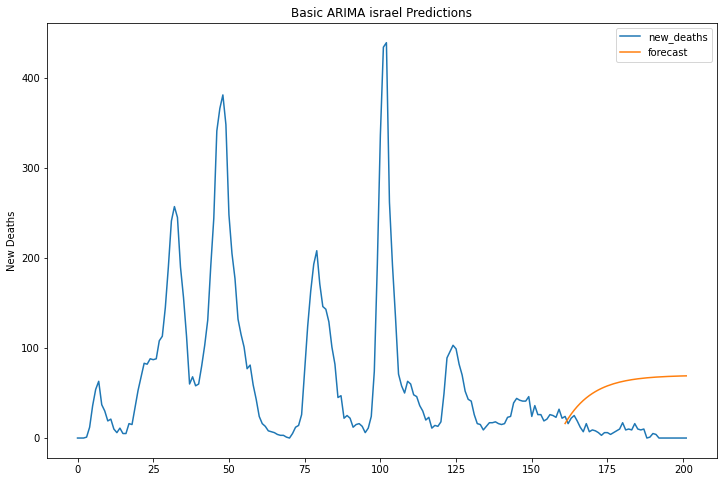

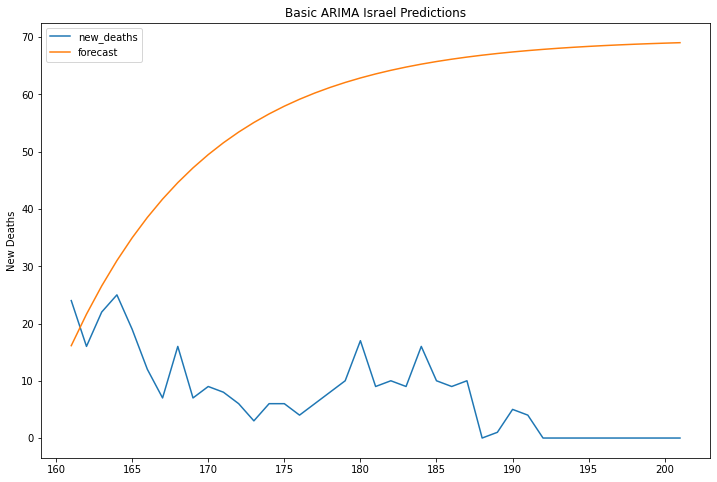

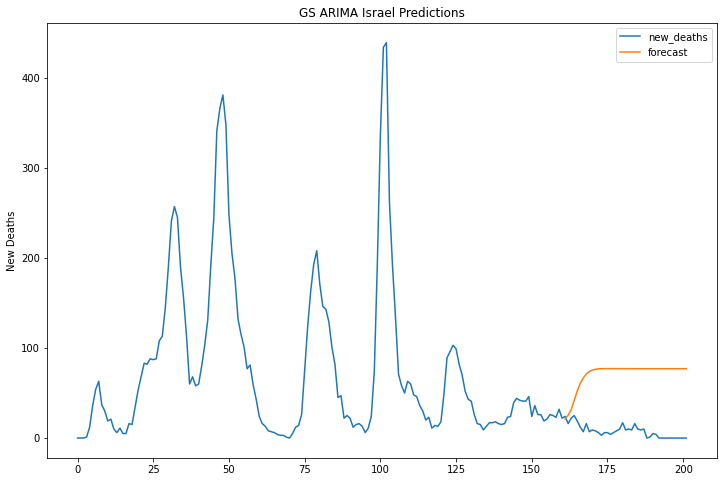

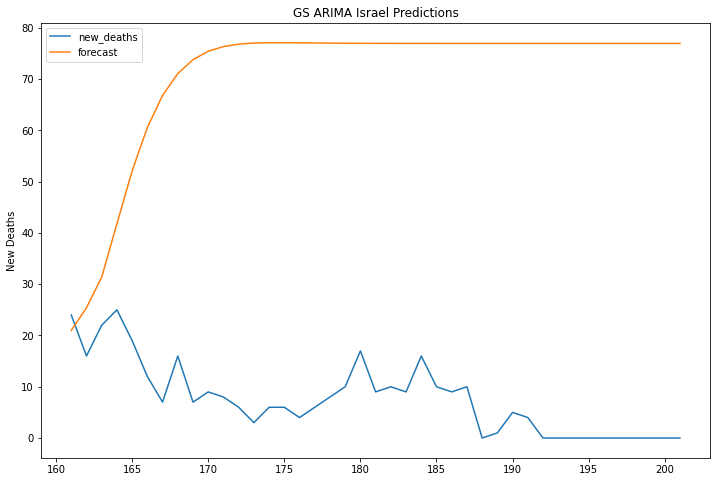

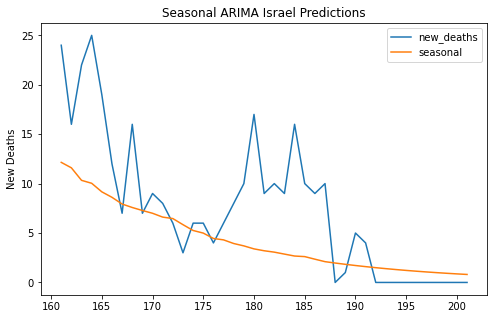

In [253]:
#israel 
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(israe_train['new_deaths'],order=(1,0,1))
m=model.fit()


israe['forecast']=m.predict(start=161,end=202,dynamic=True)
israe[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA israel Predictions')
plt.ylabel('New Deaths')
israe_test['forecast']=m.predict(start=161,end=202,dynamic=True)
israe_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Israel Predictions')
plt.ylabel('New Deaths')
actuals = israe_test['new_deaths']  
predictions = israe_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a israel',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(israe_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model2=ARIMA(israe_train['new_deaths'],order=(p,0,q))
m2=model2.fit()

israe['forecast']=m2.predict(start=161,end=202,dynamic=True)
israe[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Israel Predictions')
plt.ylabel('New Deaths')
israe_test['forecast']=m2.predict(start=161,end=202,dynamic=True)
israe_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Israel Predictions')
plt.ylabel('New Deaths')

actuals =israe_test['new_deaths']  
predictions = israe_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched israe',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(israe_test['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,13)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(israe_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,13))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
israe_test['seasonal'] = pred
mae = mean_absolute_error(israe_test['new_deaths'],israe_test['seasonal'])
mase = mean_absolute_scaled_error(israe_test['new_deaths'],israe_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal israe',mae, mase]


israe_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Israel Predictions')
plt.ylabel('New Deaths')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53613D+00    |proj g|=  8.88178D-11

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.882D-11   6.536D+00
  F =   6.5361336838771287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.36470D+00    |proj g|=  2.86516D-03

At iterate   15    f=  6.34978D+00    |proj g|=  9.36165D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   1.410D-06   6.350D+00
  F =   6.3497821322573111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48062D+00    |proj g|=  1.01380D-01

At iterate    5    f=  6.42746D+00    |proj g|=  6.01104D-04

At iterate   10    f=  6.42726D+00    |proj g|=  9.29589D-03

At iterate   15    f=  6.42505D+00    |proj g|=  1.78669D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     18      1     0     0   4.271D-06   6.425D+00
  F =   6.4250389354137463     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  6.34618D+00    |proj g|=  5.41610D-02

At iterate   10    f=  6.32601D+00    |proj g|=  4.95223D-03

At iterate   15    f=  6.32413D+00    |proj g|=  6.08343D-04

At iterate   20    f=  6.32370D+00    |proj g|=  4.21005D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   4.210D-06   6.324D+00
  F =   6.3237022070405189     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74703D+00    |proj g|=  7.83869D-01

At iterate    5    f=  6.32403D+00    |proj g|=  9.55204D-05

At iterate   10    f=  6.32403D+00    |proj g|=  1.46450D-03

At iterate   15    f=  6.32399D+00    |proj g|=  4.94290D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     19      1     0     0   1.038D-05   6.324D+00
  F =   6.3239885345206055     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.80576D+13    |proj g|=  7.35432D+18

At iterate    5    f=  1.57287D+07    |proj g|=  1.20728D+09

At iterate   10    f=  2.14052D+06    |proj g|=  6.07130D+07

At iterate   15    f=  2.86890D+05    |proj g|=  3.01116D+06

At iterate   20    f=  3.56158D+04    |proj g|=  1.41016D+05

At iterate   25    f=  3.86617D+03    |proj g|=  6.22820D+03

At iterate   30    f=  4.55623D+02    |proj g|=  3.08445D+02

At iterate   35    f=  5.11944D+01    |proj g|=  1.80111D+01

At iterate   40    f=  1.12714D+01    |proj g|=  6.51938D-01

At iterate   45    f=  8.01668D+00    |proj g|=  5.75461D-01

At iterate   50    f=  6.93454D+00    |proj g|=  7.40330D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  6.32353D+00    |proj g|=  4.56698D-02

At iterate   10    f=  6.31231D+00    |proj g|=  3.47233D-03

At iterate   15    f=  6.31142D+00    |proj g|=  1.44748D-02

At iterate   20    f=  6.31119D+00    |proj g|=  2.35589D-04

At iterate   25    f=  6.31116D+00    |proj g|=  2.33672D-03

At iterate   30    f=  6.30946D+00    |proj g|=  2.03907D-02

At iterate   35    f=  6.30872D+00    |proj g|=  1.08028D-03

At iterate   40    f=  6.30858D+00    |proj g|=  1.34487D-03

At iterate   45    f=  6.30850D+00    |proj g|=  1.19579D-03

At iterate   50    f=  6.30848D+00    |proj g|=  7.14286D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54469D+00    |proj g|=  1.12235D+00

At iterate    5    f=  6.14089D+00    |proj g|=  6.43367D-03

At iterate   10    f=  6.05878D+00    |proj g|=  1.99909D-01

At iterate   15    f=  5.91239D+00    |proj g|=  1.30625D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   4.253D-07   5.912D+00
  F =   5.9123878877027360     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.81296D+00    |proj g|=  1.95519D-02

At iterate   20    f=  5.80982D+00    |proj g|=  3.29436D-04

At iterate   25    f=  5.80975D+00    |proj g|=  1.18540D-03

At iterate   30    f=  5.80969D+00    |proj g|=  1.45514D-03

At iterate   35    f=  5.80966D+00    |proj g|=  3.64811D-04

At iterate   40    f=  5.80965D+00    |proj g|=  1.70758D-04

At iterate   45    f=  5.80963D+00    |proj g|=  9.54957D-04
  ys=-8.383E-03  -gs= 2.078E-04 BFGS update SKIPPED

At iterate   50    f=  5.80301D+00    |proj g|=  1.80512D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     76      1     1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54469D+00    |proj g|=  1.12235D+00

At iterate    5    f=  6.13178D+00    |proj g|=  2.16152D-02

At iterate   10    f=  6.12677D+00    |proj g|=  4.64489D-03

At iterate   15    f=  5.98140D+00    |proj g|=  2.08082D-02

At iterate   20    f=  5.90989D+00    |proj g|=  4.87686D-03

At iterate   25    f=  5.82958D+00    |proj g|=  7.20986D-02

At iterate   30    f=  5.80501D+00    |proj g|=  9.84908D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54469D+00    |proj g|=  1.12235D+00

At iterate    5    f=  6.12973D+00    |proj g|=  1.07549D-02

At iterate   10    f=  6.12513D+00    |proj g|=  4.66878D-03

At iterate   15    f=  5.81027D+00    |proj g|=  7.84400D-02

At iterate   20    f=  5.79774D+00    |proj g|=  6.83924D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   6.839D-06   5.798D+00
  F =   5.7977357437316028     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  6.12685D+00    |proj g|=  4.65550D-03

At iterate   15    f=  5.87464D+00    |proj g|=  1.53864D-02

At iterate   20    f=  5.85416D+00    |proj g|=  6.89138D-02

At iterate   25    f=  5.80480D+00    |proj g|=  1.02255D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     49      1     0     0   5.525D-06   5.804D+00
  F =   5.8040489915294540     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  6.12670D+00    |proj g|=  4.64766D-03

At iterate   15    f=  6.07720D+00    |proj g|=  1.51648D-01

At iterate   20    f=  5.80184D+00    |proj g|=  2.04597D-02

At iterate   25    f=  5.79959D+00    |proj g|=  8.06460D-03

At iterate   30    f=  5.79245D+00    |proj g|=  5.48817D-02

At iterate   35    f=  5.78982D+00    |proj g|=  4.84384D-03

At iterate   40    f=  5.78972D+00    |proj g|=  7.49670D-04

At iterate   45    f=  5.78972D+00    |proj g|=  1.82267D-04

At iterate   50    f=  5.78971D+00    |proj g|=  1.84656D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57963D+00    |proj g|=  1.38537D+00

At iterate    5    f=  5.98730D+00    |proj g|=  5.52335D-03

At iterate   10    f=  5.90353D+00    |proj g|=  3.93900D-01

At iterate   15    f=  5.74766D+00    |proj g|=  1.23819D-03

At iterate   20    f=  5.74764D+00    |proj g|=  5.69543D-03
  ys=-2.510E-02  -gs= 9.674E-04 BFGS update SKIPPED

At iterate   25    f=  5.65345D+00    |proj g|=  4.70262D-02

At iterate   30    f=  5.64909D+00    |proj g|=  1.63840D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   

 This problem is unconstrained.



At iterate   15    f=  5.69752D+00    |proj g|=  1.24432D-01

At iterate   20    f=  5.68780D+00    |proj g|=  6.79782D-03

At iterate   25    f=  5.68764D+00    |proj g|=  2.06338D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     32      1     0     0   2.063D-05   5.688D+00
  F =   5.6876445554557060     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47031D+00    |proj g|=  7.81672D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.97395D+00    |proj g|=  8.69379D-03

At iterate   15    f=  5.74220D+00    |proj g|=  3.05078D-03

At iterate   20    f=  5.65340D+00    |proj g|=  6.06801D-02

At iterate   25    f=  5.64871D+00    |proj g|=  1.70479D-04

At iterate   30    f=  5.64867D+00    |proj g|=  5.06131D-03

At iterate   35    f=  5.58594D+00    |proj g|=  7.61988D-02

At iterate   40    f=  5.56152D+00    |proj g|=  4.04961D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     76      1     0     0   3.136D-06   5.561D+00
  F =   5.5614153264129849     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  5.97915D+00    |proj g|=  1.63628D-02

At iterate   15    f=  5.81066D+00    |proj g|=  3.05689D-01

At iterate   20    f=  5.72653D+00    |proj g|=  6.81701D-02

At iterate   25    f=  5.72399D+00    |proj g|=  1.25780D-03

At iterate   30    f=  5.71316D+00    |proj g|=  8.01997D-02

At iterate   35    f=  5.69846D+00    |proj g|=  7.98126D-03

At iterate   40    f=  5.69843D+00    |proj g|=  1.96509D-04

At iterate   45    f=  5.69841D+00    |proj g|=  4.29864D-03

At iterate   50    f=  5.57723D+00    |proj g|=  7.92319D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     73   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57963D+00    |proj g|=  1.38537D+00

At iterate    5    f=  5.98064D+00    |proj g|=  1.41986D-02

At iterate   10    f=  5.97525D+00    |proj g|=  1.58305D-02

At iterate   15    f=  5.69529D+00    |proj g|=  4.56901D-02

At iterate   20    f=  5.69300D+00    |proj g|=  5.99039D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     29      1     0     0   2.211D-05   5.693D+00
  F =   5.6930039417446672     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.98894D+00    |proj g|=  2.79236D-02

At iterate   10    f=  5.97915D+00    |proj g|=  7.67952D-03

At iterate   15    f=  5.81997D+00    |proj g|=  1.88235D-01

At iterate   20    f=  5.71005D+00    |proj g|=  2.79897D-02

At iterate   25    f=  5.70767D+00    |proj g|=  4.39986D-04

At iterate   30    f=  5.70754D+00    |proj g|=  1.75721D-02

At iterate   35    f=  5.70498D+00    |proj g|=  2.65922D-02

At iterate   40    f=  5.69881D+00    |proj g|=  1.14526D-02

At iterate   45    f=  5.69836D+00    |proj g|=  4.37952D-05

At iterate   50    f=  5.69833D+00    |proj g|=  2.34247D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.99202D+00    |proj g|=  3.33292D-02

At iterate   10    f=  5.98053D+00    |proj g|=  5.68220D-03

At iterate   15    f=  5.96128D+00    |proj g|=  7.11494D-02

At iterate   20    f=  5.67376D+00    |proj g|=  5.30689D-02

At iterate   25    f=  5.56089D+00    |proj g|=  3.92155D-02

At iterate   30    f=  5.55881D+00    |proj g|=  1.42476D-03

At iterate   35    f=  5.55540D+00    |proj g|=  3.93045D-02

At iterate   40    f=  5.54222D+00    |proj g|=  1.36456D-02

At iterate   45    f=  5.54075D+00    |proj g|=  3.58805D-03

At iterate   50    f=  5.54042D+00    |proj g|=  1.45620D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38497D+00    |proj g|=  4.02783D-03

At iterate    5    f=  5.38462D+00    |proj g|=  2.75116D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     10      1     0     0   1.279D-06   5.385D+00
  F =   5.3846138601242588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterat

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61123D+00    |proj g|=  1.59424D-01

At iterate    5    f=  5.38458D+00    |proj g|=  6.10948D-04

At iterate   10    f=  5.38455D+00    |proj g|=  2.06931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   1.881D-06   5.385D+00
  F =   5.3845527056586553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   15    f=  5.38399D+00    |proj g|=  2.48982D-03

At iterate   20    f=  5.38398D+00    |proj g|=  1.68658D-04

At iterate   25    f=  5.38395D+00    |proj g|=  2.21078D-03

At iterate   30    f=  5.38391D+00    |proj g|=  3.11972D-04

At iterate   35    f=  5.38390D+00    |proj g|=  1.09059D-04

At iterate   40    f=  5.38390D+00    |proj g|=  5.60929D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     50      1     0     0   9.983D-05   5.384D+00
  F =   5.3838969970787591     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42078D+00    |proj g|=  1.82863D-01

At iterate    5    f=  5.38410D+00    |proj g|=  3.39425D-03

At iterate   10    f=  5.38402D+00    |proj g|=  6.16569D-04

At iterate   15    f=  5.38399D+00    |proj g|=  1.31903D-03

At iterate   20    f=  5.38399D+00    |proj g|=  9.53405D-04

At iterate   25    f=  5.38392D+00    |proj g|=  7.76520D-04

At iterate   30    f=  5.38392D+00    |proj g|=  3.19346D-04

At iterate   35    f=  5.38391D+00    |proj g|=  1.76206D-04

At iterate   40    f=  5.38391D+00    |proj g|=  4.06843D-05

At iterate   45    f=  5.38391D+00    |proj g|=  3.32573D-05

At iterate   50    f=  5.38391D+00    |proj g|=  1.80755D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  5.38401D+00    |proj g|=  1.97732D-03

At iterate   20    f=  5.38396D+00    |proj g|=  3.16546D-04

At iterate   25    f=  5.38393D+00    |proj g|=  3.41635D-03

At iterate   30    f=  5.38381D+00    |proj g|=  8.83230D-04

At iterate   35    f=  5.38377D+00    |proj g|=  5.05960D-04

At iterate   40    f=  5.38377D+00    |proj g|=  5.31482D-05

At iterate   45    f=  5.38376D+00    |proj g|=  4.78329D-04

At iterate   50    f=  5.38373D+00    |proj g|=  9.72583D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   9.726D-04   5.384D+00
  F =   5.38373213112

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.27230D+00    |proj g|=  4.52920D-03

At iterate   10    f=  5.27216D+00    |proj g|=  4.27439D-03

At iterate   15    f=  5.27147D+00    |proj g|=  1.19228D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   8.690D-06   5.271D+00
  F =   5.2714653152262505     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46435D+00    |proj g|=  1.52690D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.27201D+00    |proj g|=  6.56622D-03

At iterate   20    f=  5.27179D+00    |proj g|=  3.34084D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     23      1     0     0   2.288D-05   5.272D+00
  F =   5.2717936108135639     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27801D+00    |proj g|=  5.28994D-02

At iterate    5    f=  5.27243D+00    |proj g|=  5.41872D-03


 This problem is unconstrained.



At iterate   10    f=  5.27224D+00    |proj g|=  4.24992D-03

At iterate   15    f=  5.27074D+00    |proj g|=  1.10768D-02

At iterate   20    f=  5.27032D+00    |proj g|=  2.60382D-03

At iterate   25    f=  5.27005D+00    |proj g|=  1.42656D-03

At iterate   30    f=  5.26977D+00    |proj g|=  9.70762D-04

At iterate   35    f=  5.26974D+00    |proj g|=  8.95826D-04

At iterate   40    f=  5.26970D+00    |proj g|=  2.97509D-04

At iterate   45    f=  5.26969D+00    |proj g|=  5.03390D-04

At iterate   50    f=  5.26968D+00    |proj g|=  3.51941D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56   

 This problem is unconstrained.



At iterate   15    f=  5.27171D+00    |proj g|=  5.77105D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   1.367D-05   5.272D+00
  F =   5.2717105058220062     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32022D+00    |proj g|=  1.78112D-01


 This problem is unconstrained.



At iterate    5    f=  5.27259D+00    |proj g|=  3.83109D-03

At iterate   10    f=  5.27221D+00    |proj g|=  5.93549D-03

At iterate   15    f=  5.27132D+00    |proj g|=  4.91942D-04

At iterate   20    f=  5.27123D+00    |proj g|=  3.08577D-03

At iterate   25    f=  5.27103D+00    |proj g|=  1.39131D-03

At iterate   30    f=  5.27093D+00    |proj g|=  7.38327D-04

At iterate   35    f=  5.27089D+00    |proj g|=  9.11534D-04

At iterate   40    f=  5.27088D+00    |proj g|=  6.62103D-04

At iterate   45    f=  5.27087D+00    |proj g|=  1.36300D-04

At iterate   50    f=  5.27087D+00    |proj g|=  1.65973D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.27268D+00    |proj g|=  6.16591D-03

At iterate   10    f=  5.27057D+00    |proj g|=  8.50916D-03

At iterate   15    f=  5.27017D+00    |proj g|=  3.94042D-03

At iterate   20    f=  5.26935D+00    |proj g|=  9.18150D-03

At iterate   25    f=  5.26860D+00    |proj g|=  2.24430D-03

At iterate   30    f=  5.26846D+00    |proj g|=  7.09379D-03

At iterate   35    f=  5.26807D+00    |proj g|=  3.50696D-03

At iterate   40    f=  5.26796D+00    |proj g|=  1.10914D-03

At iterate   45    f=  5.26793D+00    |proj g|=  2.38120D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     57   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27529D+00    |proj g|=  5.17764D-02

At iterate    5    f=  5.27000D+00    |proj g|=  1.94221D-03

At iterate   10    f=  5.26994D+00    |proj g|=  3.33286D-04


 This problem is unconstrained.



At iterate   15    f=  5.26989D+00    |proj g|=  1.26875D-03

At iterate   20    f=  5.26988D+00    |proj g|=  7.32232D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   7.322D-06   5.270D+00
  F =   5.2698784137321688     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46324D+00    |proj g|=  1.53135D-01

At iterate    5    f=  5.27336D+00    |proj g|=  1.71822D-02

At iterate   10    f=  5.27053D+00    |proj g|=  1.18931D-03

At iterate   15    f=  5.27051D+00    |proj g|=  1.25257D-03

At iterate   20    f=  5.27048D+00    |proj g|=  7.99876D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   4.478D-06   5.270D+00
  F =   5.2704822286240711     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.27009D+00    |proj g|=  2.68497D-03

At iterate   10    f=  5.26989D+00    |proj g|=  2.32344D-03

At iterate   15    f=  5.26850D+00    |proj g|=  2.80153D-03

At iterate   20    f=  5.26796D+00    |proj g|=  2.51633D-03

At iterate   25    f=  5.26771D+00    |proj g|=  2.44162D-03

At iterate   30    f=  5.26742D+00    |proj g|=  3.39399D-03

At iterate   35    f=  5.26734D+00    |proj g|=  1.16491D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     43      1     0     0   2.791D-05   5.267D+00
  F =   5.2673428772005586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.27027D+00    |proj g|=  2.22752D-03

At iterate   10    f=  5.27019D+00    |proj g|=  7.85930D-04

At iterate   15    f=  5.27015D+00    |proj g|=  7.18771D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     21      1     0     0   2.956D-05   5.270D+00
  F =   5.2701504402945574     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31353D+00    |proj g|=  1.68393D-01

At iterate    5    f=  5.27019D+00    |proj g|=  2.43431D-03

At iterate   10    f=  5.27004D+00    |proj g|=  5.95550D-04

At iterate   15    f=  5.26979D+00    |proj g|=  1.04726D-02

At iterate   20    f=  5.26902D+00    |proj g|=  1.42131D-03

At iterate   25    f=  5.26888D+00    |proj g|=  8.40700D-04

At iterate   30    f=  5.26880D+00    |proj g|=  9.59891D-04

At iterate   35    f=  5.26872D+00    |proj g|=  6.12919D-04

At iterate   40    f=  5.26871D+00    |proj g|=  2.85855D-05

At iterate   45    f=  5.26871D+00    |proj g|=  2.05050D-04

At iterate   50    f=  5.26871D+00    |proj g|=  1.37137D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  5.26967D+00    |proj g|=  4.05058D-03

At iterate   15    f=  5.26794D+00    |proj g|=  5.37876D-03

At iterate   20    f=  5.26747D+00    |proj g|=  1.92314D-03

At iterate   25    f=  5.26732D+00    |proj g|=  1.48999D-03

At iterate   30    f=  5.26614D+00    |proj g|=  1.17368D-02

At iterate   35    f=  5.26540D+00    |proj g|=  1.58925D-03

At iterate   40    f=  5.26522D+00    |proj g|=  3.55806D-03

At iterate   45    f=  5.26516D+00    |proj g|=  3.80454D-04

At iterate   50    f=  5.26515D+00    |proj g|=  2.62011D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   2.604D-06   5.308D+00
  F =   5.3081579149073592     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30822D+00    |proj g|=  6.29677D-02

At iterate    5    f=  5.30366D+00    |proj g|=  5.20169D-03

At iterate   10    f=  5.30354D+00    |proj g|=  3.73302D-03

At iterate   15    f=  5.30337D+00    |proj g|=  1.70183D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.30299D+00    |proj g|=  4.17271D-03

At iterate   15    f=  5.30289D+00    |proj g|=  5.99571D-03

At iterate   20    f=  5.30281D+00    |proj g|=  7.86232D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   1.173D-05   5.303D+00
  F =   5.3028115117475405     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30822D+00    |proj g|=  6.29722D-02


 This problem is unconstrained.



At iterate    5    f=  5.30326D+00    |proj g|=  8.28095D-03

At iterate   10    f=  5.30305D+00    |proj g|=  1.16887D-03

At iterate   15    f=  5.30289D+00    |proj g|=  4.81588D-03

At iterate   20    f=  5.30283D+00    |proj g|=  8.43303D-05

At iterate   25    f=  5.30282D+00    |proj g|=  1.31941D-03

At iterate   30    f=  5.30279D+00    |proj g|=  1.01995D-03

At iterate   35    f=  5.30278D+00    |proj g|=  3.98636D-04

At iterate   40    f=  5.30278D+00    |proj g|=  1.32845D-04

At iterate   45    f=  5.30278D+00    |proj g|=  1.15031D-04

At iterate   50    f=  5.30278D+00    |proj g|=  1.51406D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   1.614D-05   5.303D+00
  F =   5.3028173806370233     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.35259D+00    |proj g|=  1.79821D-01


 This problem is unconstrained.



At iterate    5    f=  5.30322D+00    |proj g|=  5.80755D-03

At iterate   10    f=  5.30305D+00    |proj g|=  1.00877D-03

At iterate   15    f=  5.30287D+00    |proj g|=  7.25108D-03

At iterate   20    f=  5.30282D+00    |proj g|=  2.67325D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     22      1     0     0   2.673D-05   5.303D+00
  F =   5.3028228545533969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.30325D+00    |proj g|=  8.57296D-03

At iterate   10    f=  5.30305D+00    |proj g|=  6.22559D-04

At iterate   15    f=  5.30281D+00    |proj g|=  8.42796D-03

At iterate   20    f=  5.30273D+00    |proj g|=  3.38875D-04

At iterate   25    f=  5.30270D+00    |proj g|=  4.62149D-03

At iterate   30    f=  5.30254D+00    |proj g|=  8.65755D-04

At iterate   35    f=  5.30247D+00    |proj g|=  2.31401D-03

At iterate   40    f=  5.30244D+00    |proj g|=  1.96912D-04

At iterate   45    f=  5.30243D+00    |proj g|=  6.61061D-05

At iterate   50    f=  5.30243D+00    |proj g|=  1.00690D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28208D+00    |proj g|=  3.44308D-02

At iterate    5    f=  5.27403D+00    |proj g|=  1.56116D-02

At iterate   10    f=  5.27252D+00    |proj g|=  9.02283D-04

At iterate   15    f=  5.27207D+00    |proj g|=  6.96660D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   2.536D-06   5.272D+00
  F =   5.2720677746975779     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   20    f=  5.26964D+00    |proj g|=  1.12280D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   6.138D-06   5.270D+00
  F =   5.2696336521972409     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51127D+00    |proj g|=  1.60453D-01


 This problem is unconstrained.



At iterate    5    f=  5.27425D+00    |proj g|=  1.11678D-02

At iterate   10    f=  5.27089D+00    |proj g|=  1.51643D-03

At iterate   15    f=  5.27063D+00    |proj g|=  3.61868D-03

At iterate   20    f=  5.27026D+00    |proj g|=  1.44294D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     26      1     0     0   1.625D-05   5.270D+00
  F =   5.2702649192619884     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.27304D+00    |proj g|=  2.93523D-02

At iterate   10    f=  5.27081D+00    |proj g|=  1.02656D-03

At iterate   15    f=  5.27042D+00    |proj g|=  1.00593D-03

At iterate   20    f=  5.27021D+00    |proj g|=  2.21446D-03

At iterate   25    f=  5.27010D+00    |proj g|=  5.09321D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     31      1     0     0   4.594D-05   5.270D+00
  F =   5.2700960601532856     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   15    f=  5.26873D+00    |proj g|=  7.42765D-03

At iterate   20    f=  5.26717D+00    |proj g|=  3.06844D-03

At iterate   25    f=  5.26689D+00    |proj g|=  1.62755D-03

At iterate   30    f=  5.26686D+00    |proj g|=  8.25241D-05

At iterate   35    f=  5.26685D+00    |proj g|=  6.03615D-04

At iterate   40    f=  5.26676D+00    |proj g|=  4.28217D-04

At iterate   45    f=  5.26675D+00    |proj g|=  3.38108D-04

At iterate   50    f=  5.26674D+00    |proj g|=  3.60565D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   3.606D-04   5.267D+00
  F =   5.26673896779

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28208D+00    |proj g|=  3.44308D-02

At iterate    5    f=  5.27339D+00    |proj g|=  2.36714D-02

At iterate   10    f=  5.27057D+00    |proj g|=  4.65059D-03

At iterate   15    f=  5.27040D+00    |proj g|=  6.48166D-03

At iterate   20    f=  5.26992D+00    |proj g|=  2.82838D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   2.308D-05   5.270D+00
  F =   5.2699220623191074     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  5.27059D+00    |proj g|=  4.94079D-03

At iterate   15    f=  5.27027D+00    |proj g|=  3.49740D-03

At iterate   20    f=  5.26911D+00    |proj g|=  1.07370D-02

At iterate   25    f=  5.26881D+00    |proj g|=  7.13409D-04

At iterate   30    f=  5.26843D+00    |proj g|=  2.62685D-03

At iterate   35    f=  5.26836D+00    |proj g|=  4.80818D-04

At iterate   40    f=  5.26830D+00    |proj g|=  6.49348D-04

At iterate   45    f=  5.26828D+00    |proj g|=  5.96594D-04

At iterate   50    f=  5.26827D+00    |proj g|=  3.80179D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

 This problem is unconstrained.



At iterate    5    f=  5.27437D+00    |proj g|=  3.94683D-02

At iterate   10    f=  5.27040D+00    |proj g|=  4.31154D-03

At iterate   15    f=  5.26976D+00    |proj g|=  9.55993D-03

At iterate   20    f=  5.26764D+00    |proj g|=  1.04375D-02

At iterate   25    f=  5.26716D+00    |proj g|=  1.75979D-03

At iterate   30    f=  5.26553D+00    |proj g|=  1.36611D-02

At iterate   35    f=  5.26424D+00    |proj g|=  2.66455D-03

At iterate   40    f=  5.26422D+00    |proj g|=  2.99693D-05

At iterate   45    f=  5.26422D+00    |proj g|=  2.82404D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     56   

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  5.27213D+00    |proj g|=  8.73986D-04

At iterate   10    f=  5.27199D+00    |proj g|=  6.98193D-03

At iterate   15    f=  5.26849D+00    |proj g|=  1.51860D-02

At iterate   20    f=  5.26139D+00    |proj g|=  6.90748D-03

At iterate   25    f=  5.25790D+00    |proj g|=  1.77042D-03

At iterate   30    f=  5.25467D+00    |proj g|=  9.29568D-03

At iterate   35    f=  5.25425D+00    |proj g|=  2.11110D-03

At iterate   40    f=  5.25408D+00    |proj g|=  9.27662D-04

At iterate   45    f=  5.25403D+00    |proj g|=  6.56032D-04

At iterate   50    f=  5.25401D+00    |proj g|=  2.96975D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.



At iterate    5    f=  5.26980D+00    |proj g|=  1.16219D-03

At iterate   10    f=  5.26979D+00    |proj g|=  1.67710D-03

At iterate   15    f=  5.26959D+00    |proj g|=  4.51779D-03

At iterate   20    f=  5.26953D+00    |proj g|=  8.51096D-04

At iterate   25    f=  5.26935D+00    |proj g|=  7.38694D-03

At iterate   30    f=  5.26767D+00    |proj g|=  1.86246D-02

At iterate   35    f=  5.25833D+00    |proj g|=  7.34864D-03

At iterate   40    f=  5.25487D+00    |proj g|=  1.73819D-03

At iterate   45    f=  5.25380D+00    |proj g|=  1.60412D-03

At iterate   50    f=  5.25361D+00    |proj g|=  3.21573D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.27422D+00    |proj g|=  5.61781D-02

At iterate   10    f=  5.27032D+00    |proj g|=  3.07952D-04

At iterate   15    f=  5.27027D+00    |proj g|=  5.91463D-03

At iterate   20    f=  5.26993D+00    |proj g|=  7.19632D-04

At iterate   25    f=  5.26976D+00    |proj g|=  9.14294D-03

At iterate   30    f=  5.26589D+00    |proj g|=  3.12714D-02

At iterate   35    f=  5.25938D+00    |proj g|=  6.78668D-03

At iterate   40    f=  5.25531D+00    |proj g|=  4.45244D-03

At iterate   45    f=  5.25421D+00    |proj g|=  6.38099D-03

At iterate   50    f=  5.25392D+00    |proj g|=  1.09158D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f=  5.26953D+00    |proj g|=  2.22732D-03

At iterate   30    f=  5.26886D+00    |proj g|=  1.76816D-02

At iterate   35    f=  5.26443D+00    |proj g|=  1.24322D-02

At iterate   40    f=  5.25598D+00    |proj g|=  3.66628D-03

At iterate   45    f=  5.25428D+00    |proj g|=  1.11767D-03

At iterate   50    f=  5.25410D+00    |proj g|=  9.92336D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   9.923D-04   5.254D+00
  F =   5.2540997938282441     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.26891D+00    |proj g|=  1.24562D-02

At iterate   20    f=  5.26811D+00    |proj g|=  4.48057D-03

At iterate   25    f=  5.26765D+00    |proj g|=  3.05287D-03

At iterate   30    f=  5.26288D+00    |proj g|=  2.54339D-02

At iterate   35    f=  5.25854D+00    |proj g|=  3.95469D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  5.25761D+00    |proj g|=  2.96984D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     64      1     0     0   2.970D-03   5.258D+00
  F =   5.2576141153022018     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27585D+00    |proj g|=  5.92859D-02

At iterate    5    f=  5.27000D+00    |proj g|=  1.41408D-03

At iterate   10    f=  5.26997D+00    |proj g|=  2.06645D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.26995D+00    |proj g|=  3.55324D-03

At iterate   10    f=  5.26986D+00    |proj g|=  2.73021D-03

At iterate   15    f=  5.26893D+00    |proj g|=  9.58161D-03

At iterate   20    f=  5.26846D+00    |proj g|=  2.48476D-03

At iterate   25    f=  5.26643D+00    |proj g|=  1.06648D-02

At iterate   30    f=  5.26197D+00    |proj g|=  5.42102D-03

At iterate   35    f=  5.26140D+00    |proj g|=  1.02401D-02

At iterate   40    f=  5.25846D+00    |proj g|=  5.52165D-03

At iterate   45    f=  5.25745D+00    |proj g|=  6.68405D-03

At iterate   50    f=  5.25696D+00    |proj g|=  3.37377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27585D+00    |proj g|=  5.92859D-02

At iterate    5    f=  5.26987D+00    |proj g|=  3.40001D-03

At iterate   10    f=  5.26961D+00    |proj g|=  1.18782D-02

At iterate   15    f=  5.26809D+00    |proj g|=  5.59753D-03

At iterate   20    f=  5.26773D+00    |proj g|=  1.44042D-03

At iterate   25    f=  5.26755D+00    |proj g|=  5.51938D-03

At iterate   30    f=  5.26644D+00    |proj g|=  1.01265D-02

At iterate   35    f=  5.26574D+00    |proj g|=  3.63004D-03

At iterate   40    f=  5.26502D+00    |proj g|=  5.95932D-03

At iterate   45    f=  5.26431D+00    |proj g|=  5.55474D-03

At iterate   50    f=  5.26324D+00    |proj g|=  1.23637D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


Text(0, 0.5, 'New Deaths')

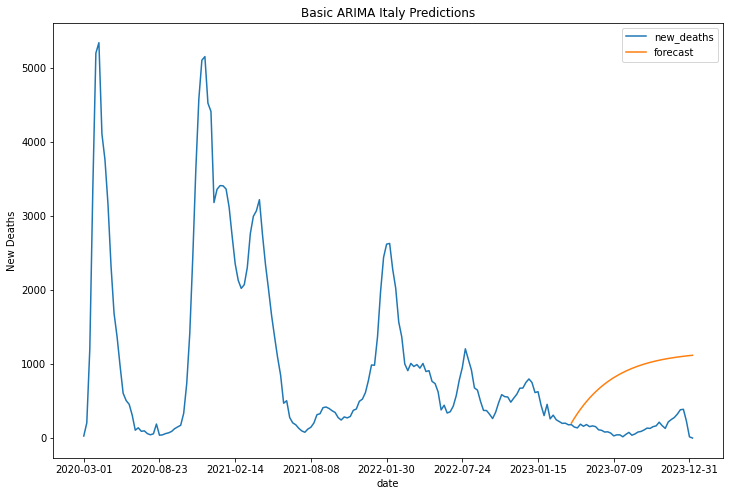

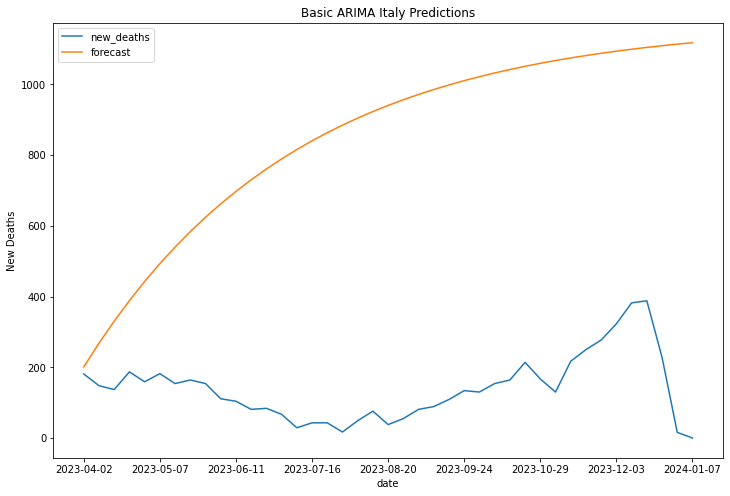

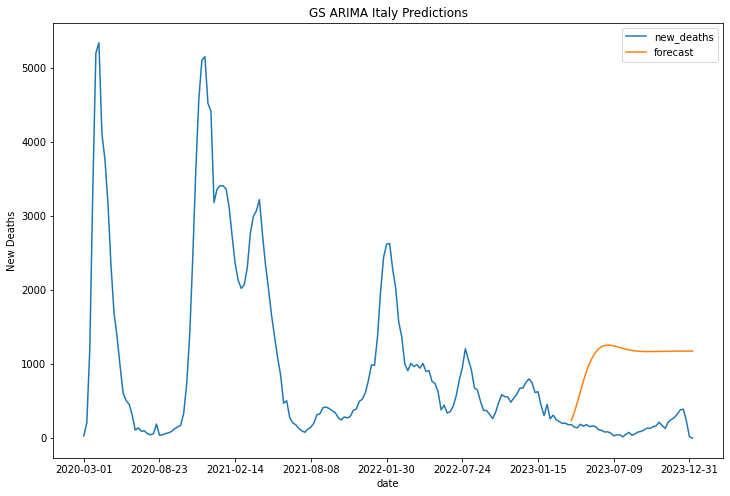

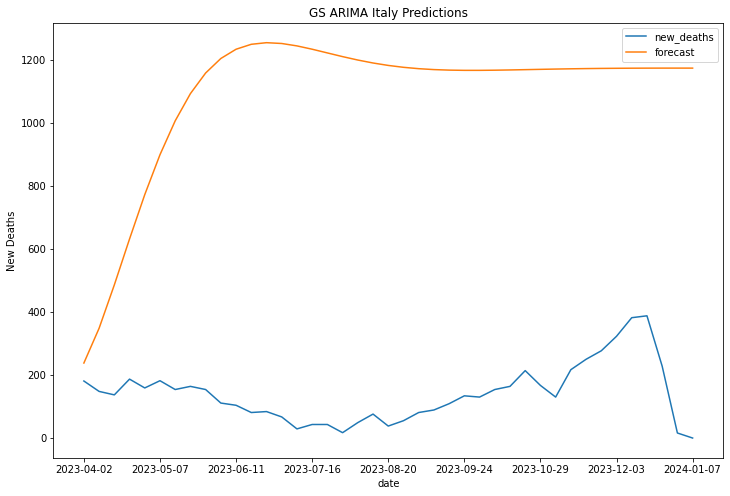

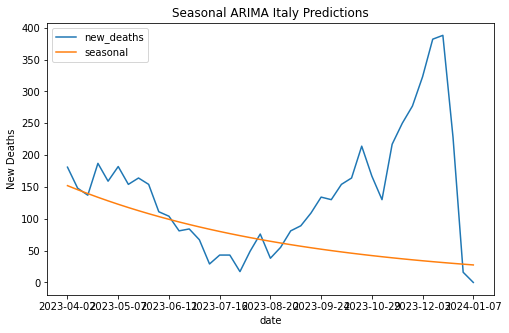

In [254]:
#italy
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(italy_train['new_deaths'],order=(1,0,1))
m=model.fit()


italy['forecast']=m.predict(start=161,end=202,dynamic=True)
italy[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Italy Predictions')
plt.ylabel('New Deaths')
italy_test['forecast']=m.predict(start=161,end=202,dynamic=True)
italy_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Italy Predictions')
plt.ylabel('New Deaths')
actuals = italy_test['new_deaths']  
predictions = italy_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a italy',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(italy_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model2=ARIMA(italy_train['new_deaths'],order=(p,0,q))
m2=model2.fit()

italy['forecast']=m2.predict(start=161,end=202,dynamic=True)
italy[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Italy Predictions')
plt.ylabel('New Deaths')
italy_test['forecast']=m2.predict(start=161,end=202,dynamic=True)
italy_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Italy Predictions')
plt.ylabel('New Deaths')

actuals =italy_test['new_deaths']  
predictions = italy_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched italy',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(italy_test['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,13)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(italy_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,13))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
italy_test['seasonal'] = pred
mae = mean_absolute_error(italy_test['new_deaths'],italy_test['seasonal'])
mase = mean_absolute_scaled_error(italy_test['new_deaths'],italy_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal italy',mae, mase]


italy_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Italy Predictions')
plt.ylabel('New Deaths')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47397D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   8.474D+00
  F =   8.4739665903023038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.14459D+00    |proj g|=  2.13197D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   2.003D-05   8.143D+00
  F =   8.1432964329348820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.7

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.08631D+00    |proj g|=  1.74387D-01

At iterate   10    f=  8.01436D+00    |proj g|=  7.53454D-03

At iterate   15    f=  8.01346D+00    |proj g|=  2.30090D-02

At iterate   20    f=  8.01124D+00    |proj g|=  1.18148D-03

At iterate   25    f=  8.01091D+00    |proj g|=  5.26155D-04

At iterate   30    f=  8.01081D+00    |proj g|=  7.80348D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     38      1     0     0   1.538D-06   8.011D+00
  F =   8.0108087703235871     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12376D+01    |proj g|=  4.36713D+00

At iterate    5    f=  8.04481D+00    |proj g|=  2.04699D-02

At iterate   10    f=  8.04372D+00    |proj g|=  8.33945D-04

At iterate   15    f=  8.04223D+00    |proj g|=  3.16353D-02

At iterate   20    f=  8.00621D+00    |proj g|=  1.93362D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     25      1     0     0   9.175D-06   8.005D+00
  F =   8.0053498808084402     

CONVERG

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08317D+01    |proj g|=  3.90261D+00

At iterate    5    f=  7.99501D+00    |proj g|=  1.52051D-02

At iterate   10    f=  7.99429D+00    |proj g|=  4.83079D-03

At iterate   15    f=  7.99425D+00    |proj g|=  5.20635D-03

At iterate   20    f=  7.99404D+00    |proj g|=  2.61308D-04

At iterate   25    f=  7.99404D+00    |proj g|=  2.17257D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   2.173D-05   7.994D+00
  F 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.96130D+00    |proj g|=  3.37632D-03

At iterate   25    f=  7.96071D+00    |proj g|=  8.26716D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     25     47      1     0     0   8.267D-07   7.961D+00
  F =   7.9607108346686219     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48213D+00    |proj g|=  1.12126D+00

At iterate    5    f=  8.08750D+00    |proj g|=  1.56443D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48213D+00    |proj g|=  1.12126D+00

At iterate    5    f=  8.07365D+00    |proj g|=  1.44693D-02

At iterate   10    f=  8.07225D+00    |proj g|=  6.56403D-04

At iterate   15    f=  8.07063D+00    |proj g|=  2.48022D-02

At iterate   20    f=  7.89318D+00    |proj g|=  6.76693D-01

At iterate   25    f=  7.73826D+00    |proj g|=  3.80752D-02

At iterate   30    f=  7.73328D+00    |proj g|=  3.96601D-03

At iterate   35    f=  7.73278D+00    |proj g|=  1.44171D-02

At iterate   40    f=  7.73268D+00    |proj g|=  1.49180D-03

At iterate   45    f=  7.73266D+00    |proj g|=  1.55763D-05

At iterate   50    f=  7.73266D+00    |proj g|=  1.81174D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   30    f=  7.74542D+00    |proj g|=  1.11944D-03

At iterate   35    f=  7.74534D+00    |proj g|=  2.98526D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     59      1     0     0   2.985D-06   7.745D+00
  F =   7.7453367192971330     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33031D+00    |proj g|=  7.90004D-01

At iterate    5    f=  8.07238D+00    |proj g|=  1.70381D-02

At iter

 This problem is unconstrained.



At iterate   30    f=  7.69371D+00    |proj g|=  8.07989D-03

At iterate   35    f=  7.69287D+00    |proj g|=  1.08042D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     48      1     0     0   2.305D-06   7.693D+00
  F =   7.6928614831289694     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48213D+00    |proj g|=  1.12126D+00

At iterate    5    f=  8.07479D+00    |proj g|=  3.23097D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  8.06792D+00    |proj g|=  7.56714D-04

At iterate   20    f=  8.06736D+00    |proj g|=  1.47305D-02

At iterate   25    f=  7.90536D+00    |proj g|=  3.92942D-02

At iterate   30    f=  7.87881D+00    |proj g|=  7.02423D-03

At iterate   35    f=  7.86958D+00    |proj g|=  4.85689D-04

At iterate   40    f=  7.86831D+00    |proj g|=  1.65505D-03

At iterate   45    f=  7.86806D+00    |proj g|=  6.73211D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  7.86804D+00    |proj g|=  6.97486D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     77      2     0     0   6.975D-05   7.868D+00
  F =   7.8680375728171379     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48213D+00    |proj g|=  1.12126D+00

At iterate    5    f=  8.06812D+00    |proj g|=  5.06450D-03

At iterate   10    f=  8.06790D+00    |proj g|=  1.94341D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  8.07149D+00    |proj g|=  2.66472D-02

At iterate   10    f=  8.06801D+00    |proj g|=  1.46137D-03

At iterate   15    f=  8.06775D+00    |proj g|=  9.12335D-04

At iterate   20    f=  8.05814D+00    |proj g|=  3.99826D-02

At iterate   25    f=  7.69979D+00    |proj g|=  2.11793D-01

At iterate   30    f=  7.65958D+00    |proj g|=  5.65767D-03

At iterate   35    f=  7.65937D+00    |proj g|=  3.85709D-03

At iterate   40    f=  7.65924D+00    |proj g|=  3.78096D-04

At iterate   45    f=  7.65920D+00    |proj g|=  2.54984D-04

At iterate   50    f=  7.65918D+00    |proj g|=  5.44505D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  8.06794D+00    |proj g|=  6.74869D-04

At iterate   15    f=  8.06771D+00    |proj g|=  7.00291D-03

At iterate   20    f=  8.06291D+00    |proj g|=  2.87645D-02

At iterate   25    f=  8.05720D+00    |proj g|=  8.78964D-03

At iterate   30    f=  7.81179D+00    |proj g|=  1.19555D-02

At iterate   35    f=  7.70517D+00    |proj g|=  7.73893D-02

At iterate   40    f=  7.69331D+00    |proj g|=  7.94907D-03

At iterate   45    f=  7.69285D+00    |proj g|=  2.32857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     77      1     0     0   4.035D-05   7.693D+00
  F =   7.69284988904

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.49914D+00    |proj g|=  1.27186D+00

At iterate    5    f=  7.97166D+00    |proj g|=  1.00411D-02

At iterate   10    f=  7.97120D+00    |proj g|=  1.03825D-03

At iterate   15    f=  7.96950D+00    |proj g|=  1.70024D-02

At iterate   20    f=  7.85330D+00    |proj g|=  3.62102D-01

At iterate   25    f=  7.70769D+00    |proj g|=  9.99717D-05

At iterate   30    f=  7.70769D+00    |proj g|=  2.27418D-03
  ys=-9.143E-02  -gs= 3.950E-04 BFGS update SKIPPED

At iterate   35    f=  7.63694D+00    |proj g|=  8.45304D-03

At iterate   40    f=  7.63665D+00    |proj g|=  7.36023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac

 This problem is unconstrained.



At iterate   20    f=  7.65426D+00    |proj g|=  2.88031D-01

At iterate   25    f=  7.59819D+00    |proj g|=  5.17624D-02

At iterate   30    f=  7.56798D+00    |proj g|=  1.92423D-02

At iterate   35    f=  7.56728D+00    |proj g|=  2.79551D-02

At iterate   40    f=  7.54572D+00    |proj g|=  8.28108D-02

At iterate   45    f=  7.54011D+00    |proj g|=  2.85646D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     63      1     0     0   4.228D-05   7.540D+00
  F =   7.5401116707726992     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   20    f=  7.57128D+00    |proj g|=  5.14730D-02

At iterate   25    f=  7.56849D+00    |proj g|=  1.11361D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   1.114D-05   7.568D+00
  F =   7.5684910578496156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32486D+00    |proj g|=  8.96109D-01

At iterate    5    f=  7.96747D+00    |proj g|=  1.69304D-02

At itera

 This problem is unconstrained.



At iterate    5    f=  7.96830D+00    |proj g|=  2.58104D-02

At iterate   10    f=  7.96542D+00    |proj g|=  2.85970D-03

At iterate   15    f=  7.96497D+00    |proj g|=  9.08478D-04

At iterate   20    f=  7.96378D+00    |proj g|=  1.99049D-02

At iterate   25    f=  7.75615D+00    |proj g|=  6.74813D-01

At iterate   30    f=  7.68638D+00    |proj g|=  4.69777D-02

At iterate   35    f=  7.65785D+00    |proj g|=  3.21894D-03

At iterate   40    f=  7.65267D+00    |proj g|=  9.83660D-02

At iterate   45    f=  7.65209D+00    |proj g|=  2.41003D-03

At iterate   50    f=  7.51531D+00    |proj g|=  1.25873D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  7.96507D+00    |proj g|=  1.91406D-03

At iterate   15    f=  7.96134D+00    |proj g|=  2.53504D-02

At iterate   20    f=  7.73875D+00    |proj g|=  6.80066D-01

At iterate   25    f=  7.65289D+00    |proj g|=  3.66511D-03

At iterate   30    f=  7.65289D+00    |proj g|=  6.80661D-04

At iterate   35    f=  7.65287D+00    |proj g|=  1.48611D-02
  ys=-5.012E-01  -gs= 3.855E-04 BFGS update SKIPPED

At iterate   40    f=  7.52396D+00    |proj g|=  2.43963D-02

At iterate   45    f=  7.51387D+00    |proj g|=  1.82646D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     75      1     1

 This problem is unconstrained.



At iterate   10    f=  7.96516D+00    |proj g|=  1.07308D-03

At iterate   15    f=  7.96481D+00    |proj g|=  3.40118D-03

At iterate   20    f=  7.96445D+00    |proj g|=  4.83951D-03

At iterate   25    f=  7.81826D+00    |proj g|=  3.90425D-01

At iterate   30    f=  7.68607D+00    |proj g|=  6.56785D-02

At iterate   35    f=  7.65516D+00    |proj g|=  1.13623D-02

At iterate   40    f=  7.65239D+00    |proj g|=  2.97081D-02

At iterate   45    f=  7.65229D+00    |proj g|=  7.84918D-04

At iterate   50    f=  7.65224D+00    |proj g|=  2.05479D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64   

 This problem is unconstrained.



At iterate    5    f=  7.96839D+00    |proj g|=  2.85920D-02

At iterate   10    f=  7.96511D+00    |proj g|=  7.74407D-04

At iterate   15    f=  7.96469D+00    |proj g|=  1.53625D-02

At iterate   20    f=  7.79606D+00    |proj g|=  1.25164D-01

At iterate   25    f=  7.73625D+00    |proj g|=  1.60324D-01

At iterate   30    f=  7.57054D+00    |proj g|=  1.72942D-01

At iterate   35    f=  7.56928D+00    |proj g|=  3.37595D-02

At iterate   40    f=  7.55318D+00    |proj g|=  8.24166D-02

At iterate   45    f=  7.55134D+00    |proj g|=  3.10408D-03

At iterate   50    f=  7.55134D+00    |proj g|=  1.16322D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.12518D+00    |proj g|=  9.03200D-05

At iterate   15    f=  7.12515D+00    |proj g|=  1.90852D-03

At iterate   20    f=  7.12501D+00    |proj g|=  9.27091D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   2.541D-07   7.125D+00
  F =   7.1250104857646388     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35121D+00    |proj g|=  1.58508D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.12970D+00    |proj g|=  4.75589D-03

At iterate   10    f=  7.12879D+00    |proj g|=  1.38249D-04

At iterate   15    f=  7.12861D+00    |proj g|=  1.36165D-03

At iterate   20    f=  7.12842D+00    |proj g|=  1.42979D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   1.430D-06   7.128D+00
  F =   7.1284158909237805     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   10    f=  7.12506D+00    |proj g|=  4.12844D-04

At iterate   15    f=  7.12500D+00    |proj g|=  1.96070D-03

At iterate   20    f=  7.12499D+00    |proj g|=  8.39147D-05

At iterate   25    f=  7.12496D+00    |proj g|=  2.73961D-03

At iterate   30    f=  7.12485D+00    |proj g|=  4.45927D-04

At iterate   35    f=  7.12485D+00    |proj g|=  1.05139D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     39      1     0     0   1.051D-05   7.125D+00
  F =   7.1248522295667200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.



At iterate   10    f=  7.12537D+00    |proj g|=  9.45935D-05

At iterate   15    f=  7.12537D+00    |proj g|=  1.70798D-03

At iterate   20    f=  7.12522D+00    |proj g|=  4.85828D-03

At iterate   25    f=  7.12519D+00    |proj g|=  4.45837D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     32      1     0     0   2.630D-05   7.125D+00
  F =   7.1251895711115605     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  7.12508D+00    |proj g|=  2.42311D-03

At iterate   25    f=  7.12495D+00    |proj g|=  4.21267D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     32      1     0     0   2.192D-05   7.125D+00
  F =   7.1249527528932362     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14013D+00    |proj g|=  1.05705D-01

At iterate    5    f=  7.12802D+00    |proj g|=  2.41114D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  7.12485D+00    |proj g|=  6.25335D-04

At iterate   20    f=  7.12479D+00    |proj g|=  1.12925D-03

At iterate   25    f=  7.12456D+00    |proj g|=  1.53641D-03

At iterate   30    f=  7.12455D+00    |proj g|=  1.46449D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     38      1     0     0   1.145D-05   7.125D+00
  F =   7.1245477588275170     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.12773D+00    |proj g|=  1.45055D-02

At iterate   10    f=  7.12684D+00    |proj g|=  1.78154D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   1.782D-05   7.127D+00
  F =   7.1268396328624855     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13394D+00    |proj g|=  8.94151D-02

At iterate    5    f=  7.12493D+00    |proj g|=  8.44905D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35659D+00    |proj g|=  1.61123D-01

At iterate    5    f=  7.13212D+00    |proj g|=  1.18920D-02

At iterate   10    f=  7.12661D+00    |proj g|=  3.89357D-03

At iterate   15    f=  7.12655D+00    |proj g|=  1.32282D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     16      1     0     0   1.323D-05   7.127D+00
  F =   7.1265456811954042     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.12494D+00    |proj g|=  1.10316D-02

At iterate   10    f=  7.12337D+00    |proj g|=  2.27163D-04

At iterate   15    f=  7.12336D+00    |proj g|=  2.46313D-03

At iterate   20    f=  7.12334D+00    |proj g|=  7.48260D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     23      1     0     0   3.114D-05   7.123D+00
  F =   7.1233423285233037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.12361D+00    |proj g|=  9.82599D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   2.336D-05   7.124D+00
  F =   7.1236119229952903     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13394D+00    |proj g|=  8.94214D-02


 This problem is unconstrained.



At iterate    5    f=  7.12503D+00    |proj g|=  1.28435D-02

At iterate   10    f=  7.12348D+00    |proj g|=  3.48832D-04

At iterate   15    f=  7.12347D+00    |proj g|=  1.83444D-03

At iterate   20    f=  7.12343D+00    |proj g|=  1.08896D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   2.859D-05   7.123D+00
  F =   7.1234254846778251     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.12339D+00    |proj g|=  4.70726D-04

At iterate   15    f=  7.12334D+00    |proj g|=  1.31102D-03

At iterate   20    f=  7.12326D+00    |proj g|=  3.33998D-04

At iterate   25    f=  7.12323D+00    |proj g|=  8.80477D-04

At iterate   30    f=  7.12319D+00    |proj g|=  6.35013D-04

At iterate   35    f=  7.12318D+00    |proj g|=  5.41059D-05

At iterate   40    f=  7.12318D+00    |proj g|=  8.91414D-04

At iterate   45    f=  7.12311D+00    |proj g|=  3.70822D-03

At iterate   50    f=  7.12307D+00    |proj g|=  3.40264D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.33841D+00    |proj g|=  5.04370D-02

At iterate   10    f=  7.32400D+00    |proj g|=  1.84006D-02

At iterate   15    f=  7.30025D+00    |proj g|=  1.97951D-01

At iterate   20    f=  7.25452D+00    |proj g|=  2.24896D-02

At iterate   25    f=  7.22918D+00    |proj g|=  3.49065D-02

At iterate   30    f=  7.22448D+00    |proj g|=  6.20844D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     36      1     0     0   8.749D-06   7.224D+00
  F =   7.2244812336966842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  7.21426D+00    |proj g|=  1.17734D-01

At iterate   10    f=  7.19303D+00    |proj g|=  3.10944D-02

At iterate   15    f=  7.18867D+00    |proj g|=  1.96784D-02

At iterate   20    f=  7.17055D+00    |proj g|=  7.98837D-03

At iterate   25    f=  7.16755D+00    |proj g|=  1.38830D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     33      1     0     0   2.146D-05   7.168D+00
  F =   7.1675534510568966     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   25    f=  7.19838D+00    |proj g|=  2.88355D-04

At iterate   30    f=  7.19833D+00    |proj g|=  2.91626D-03

At iterate   35    f=  7.15731D+00    |proj g|=  7.24079D-02
  ys=-4.528E-02  -gs= 1.485E-02 BFGS update SKIPPED

At iterate   40    f=  7.12669D+00    |proj g|=  2.11149D-02

At iterate   45    f=  7.12492D+00    |proj g|=  1.99051D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     72      1     1     0   9.725D-06   7.125D+00
  F =   7.1249233901525084     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   10    f=  7.32572D+00    |proj g|=  9.50259D-03

At iterate   15    f=  7.32276D+00    |proj g|=  1.24003D-02

At iterate   20    f=  7.20457D+00    |proj g|=  5.42158D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     38      1     0     0   5.422D-03   7.205D+00
  F =   7.2045667953390682     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35538D+00    |proj g|=  2.08563D-01


 This problem is unconstrained.



At iterate    5    f=  7.21139D+00    |proj g|=  1.51067D-01

At iterate   10    f=  7.15450D+00    |proj g|=  4.18241D-02

At iterate   15    f=  7.14406D+00    |proj g|=  1.36612D-02

At iterate   20    f=  7.13579D+00    |proj g|=  5.23103D-03

At iterate   25    f=  7.13554D+00    |proj g|=  5.33496D-03

At iterate   30    f=  7.13509D+00    |proj g|=  6.10310D-04

At iterate   35    f=  7.13506D+00    |proj g|=  1.48004D-04

At iterate   40    f=  7.13498D+00    |proj g|=  1.09512D-03

At iterate   45    f=  7.13405D+00    |proj g|=  3.40277D-03

At iterate   50    f=  7.13401D+00    |proj g|=  1.42511D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35538D+00    |proj g|=  2.08569D-01

At iterate    5    f=  7.31226D+00    |proj g|=  5.67586D-03

At iterate   10    f=  7.30261D+00    |proj g|=  2.75569D-02

At iterate   15    f=  7.18379D+00    |proj g|=  4.77579D-02

At iterate   20    f=  7.17843D+00    |proj g|=  4.93229D-04

At iterate   25    f=  7.17793D+00    |proj g|=  1.84316D-02
  ys=-7.824E-02  -gs= 1.166E-02 BFGS update SKIPPED

At iterate   30    f=  7.12915D+00    |proj g|=  8.26139D-02

At iterate   35    f=  7.12124D+00    |proj g|=  1.56500D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35538D+00    |proj g|=  2.08569D-01

At iterate    5    f=  7.31190D+00    |proj g|=  6.56114D-03

At iterate   10    f=  7.28428D+00    |proj g|=  6.82755D-02

At iterate   15    f=  7.24188D+00    |proj g|=  4.04738D-02

At iterate   20    f=  7.22854D+00    |proj g|=  2.90110D-02

At iterate   25    f=  7.20586D+00    |proj g|=  3.96898D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     78      2     0     0   1.004D+06  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35538D+00    |proj g|=  2.08569D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  7.29668D+00    |proj g|=  1.39517D-01

At iterate   10    f=  7.19041D+00    |proj g|=  6.44613D-02

At iterate   15    f=  7.14840D+00    |proj g|=  1.47637D-02

At iterate   20    f=  7.14046D+00    |proj g|=  1.69693D-02

At iterate   25    f=  7.13200D+00    |proj g|=  3.41057D-03

At iterate   30    f=  7.12923D+00    |proj g|=  1.04342D-02

At iterate   35    f=  7.12638D+00    |proj g|=  6.20634D-03

At iterate   40    f=  7.12481D+00    |proj g|=  1.46110D-03

At iterate   45    f=  7.12478D+00    |proj g|=  9.79209D-04

At iterate   50    f=  7.12478D+00    |proj g|=  5.42234D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14210D+00    |proj g|=  3.31800D-02

At iterate    5    f=  7.12764D+00    |proj g|=  1.20082D-03

At iterate   10    f=  7.12764D+00    |proj g|=  5.86952D-04

At iterate   15    f=  7.12755D+00    |proj g|=  3.12674D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   1.177D-06   7.128D+00
  F =   7.1275221335273082     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.35312D+00    |proj g|=  1.59260D-01

At iterate    5    f=  7.13481D+00    |proj g|=  1.95651D-02

At iterate   10    f=  7.12646D+00    |proj g|=  6.06679D-04

At iterate   15    f=  7.12646D+00    |proj g|=  3.69709D-04

At iterate   20    f=  7.12643D+00    |proj g|=  3.78401D-03

At iterate   25    f=  7.12638D+00    |proj g|=  2.58069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     30      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15848D+00    |proj g|=  1.45760D-01

At iterate    5    f=  7.13064D+00    |proj g|=  2.20536D-02

At iterate   10    f=  7.12759D+00    |proj g|=  7.62041D-04

At iterate   15    f=  7.12727D+00    |proj g|=  3.54958D-02

At iterate   20    f=  7.12463D+00    |proj g|=  2.82233D-03

At iterate   25    f=  7.12462D+00    |proj g|=  5.94198D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     32      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  7.12674D+00    |proj g|=  2.14191D-02

At iterate   10    f=  7.12319D+00    |proj g|=  5.01250D-04

At iterate   15    f=  7.12315D+00    |proj g|=  2.14830D-03

At iterate   20    f=  7.12314D+00    |proj g|=  1.42471D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     22      1     0     0   1.425D-05   7.123D+00
  F =   7.1231387510936397     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14210D+00    |proj g|=  1.10186D-01

At iterate    5    f=  7.12468D+00    |proj g|=  3.00218D-02

At iterate   10    f=  7.12330D+00    |proj g|=  4.17470D-04

At iterate   15    f=  7.12324D+00    |proj g|=  1.34456D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     21      1     0     0   2.623D-05   7.123D+00
  F =   7.1232292667763275     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14210D+00    |proj g|=  1.10186D-01

At iterate    5    f=  7.12706D+00    |proj g|=  2.38655D-02

At iterate   10    f=  7.12325D+00    |proj g|=  7.75651D-04

At iterate   15    f=  7.12310D+00    |proj g|=  3.40020D-03

At iterate   20    f=  7.12305D+00    |proj g|=  2.44256D-04

At iterate   25    f=  7.12299D+00    |proj g|=  2.80163D-03

At iterate   30    f=  7.12292D+00    |proj g|=  6.65905D-04

At iterate   35    f=  7.12292D+00    |proj g|=  2.75550D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.12657D+00    |proj g|=  4.55831D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   9.368D-05   7.127D+00
  F =   7.1265741161516321     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13613D+00    |proj g|=  9.78840D-02


 This problem is unconstrained.



At iterate    5    f=  7.12438D+00    |proj g|=  3.26785D-03

At iterate   10    f=  7.12395D+00    |proj g|=  1.07710D-02

At iterate   15    f=  7.12309D+00    |proj g|=  1.88093D-03

At iterate   20    f=  7.12308D+00    |proj g|=  7.24136D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     25      1     0     0   2.652D-05   7.123D+00
  F =   7.1230822698734517     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.12814D+00    |proj g|=  9.75746D-04

At iterate   15    f=  7.12640D+00    |proj g|=  1.15432D-02

At iterate   20    f=  7.12629D+00    |proj g|=  1.46871D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     31      1     0     0   1.399D-05   7.126D+00
  F =   7.1262897072831697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15550D+00    |proj g|=  1.50393D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  7.12446D+00    |proj g|=  5.75521D-03

At iterate   10    f=  7.12416D+00    |proj g|=  7.60134D-03

At iterate   15    f=  7.12305D+00    |proj g|=  3.86045D-03

At iterate   20    f=  7.12301D+00    |proj g|=  6.75211D-04

At iterate   25    f=  7.12295D+00    |proj g|=  2.24116D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     34      1     0     0   3.140D-05   7.123D+00
  F =   7.1229503006417580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   15    f=  7.12326D+00    |proj g|=  1.28469D-03

At iterate   20    f=  7.12325D+00    |proj g|=  2.28548D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     25      1     0     0   2.285D-05   7.123D+00
  F =   7.1232525789272163     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13613D+00    |proj g|=  9.78903D-02

At iterate    5    f=  7.12463D+00    |proj g|=  9.22050D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  7.12308D+00    |proj g|=  2.01086D-03

At iterate   20    f=  7.12307D+00    |proj g|=  2.47112D-04

At iterate   25    f=  7.12305D+00    |proj g|=  2.40075D-03

At iterate   30    f=  7.12304D+00    |proj g|=  6.37581D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     33      1     0     0   6.376D-05   7.123D+00
  F =   7.1230428915487680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.12459D+00    |proj g|=  1.17250D-02

At iterate   10    f=  7.12421D+00    |proj g|=  7.93082D-03

At iterate   15    f=  7.12300D+00    |proj g|=  1.88263D-03

At iterate   20    f=  7.12294D+00    |proj g|=  1.54472D-03

At iterate   25    f=  7.12282D+00    |proj g|=  3.22471D-04

At iterate   30    f=  7.12281D+00    |proj g|=  1.75368D-03

At iterate   35    f=  7.12278D+00    |proj g|=  6.59680D-04

At iterate   40    f=  7.12277D+00    |proj g|=  8.12415D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     46      1     0     0   2.060D-04   7.123D+00
  F =   7.12277283942

 This problem is unconstrained.



At iterate    5    f=  7.31137D+00    |proj g|=  2.33333D-02

At iterate   10    f=  7.30768D+00    |proj g|=  8.10568D-03

At iterate   15    f=  7.16898D+00    |proj g|=  4.80464D-03

At iterate   20    f=  7.12823D+00    |proj g|=  4.08260D-04

At iterate   25    f=  7.12822D+00    |proj g|=  2.34354D-03

At iterate   30    f=  7.12790D+00    |proj g|=  1.02057D-02

At iterate   35    f=  7.12704D+00    |proj g|=  3.41293D-03

At iterate   40    f=  7.12243D+00    |proj g|=  2.93235D-03

At iterate   45    f=  7.12224D+00    |proj g|=  2.24452D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     83   

 This problem is unconstrained.



At iterate   30    f=  7.12786D+00    |proj g|=  1.53357D-03

At iterate   35    f=  7.12707D+00    |proj g|=  9.19615D-03

At iterate   40    f=  7.12569D+00    |proj g|=  6.13142D-03

At iterate   45    f=  7.12126D+00    |proj g|=  1.46846D-02

At iterate   50    f=  7.12097D+00    |proj g|=  1.54887D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76      1     0     0   1.549D-05   7.121D+00
  F =   7.1209661900180636     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.23250D+00    |proj g|=  1.19519D-01

At iterate   10    f=  7.20460D+00    |proj g|=  2.16167D-02

At iterate   15    f=  7.19159D+00    |proj g|=  3.35397D-02

At iterate   20    f=  7.19016D+00    |proj g|=  8.74860D-03

At iterate   25    f=  7.17774D+00    |proj g|=  3.18479D-02

At iterate   30    f=  7.17301D+00    |proj g|=  1.42483D-02

At iterate   35    f=  7.17034D+00    |proj g|=  4.31560D-03

At iterate   40    f=  7.16783D+00    |proj g|=  3.45510D-03

At iterate   45    f=  7.16749D+00    |proj g|=  1.56964D-04

At iterate   50    f=  7.16744D+00    |proj g|=  4.91261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.33181D+00    |proj g|=  5.39178D-02

At iterate   10    f=  7.30510D+00    |proj g|=  8.88491D-03

At iterate   15    f=  7.27742D+00    |proj g|=  5.65300D-02

At iterate   20    f=  7.15581D+00    |proj g|=  1.64936D-02

At iterate   25    f=  7.15252D+00    |proj g|=  1.00150D-02

At iterate   30    f=  7.15168D+00    |proj g|=  2.63780D-03

At iterate   35    f=  7.13566D+00    |proj g|=  3.97520D-02

At iterate   40    f=  7.13059D+00    |proj g|=  5.16055D-03

At iterate   45    f=  7.12658D+00    |proj g|=  5.08662D-03

At iterate   50    f=  7.12374D+00    |proj g|=  6.08053D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.31093D+00    |proj g|=  2.68975D-02

At iterate   10    f=  7.30417D+00    |proj g|=  7.58359D-03

At iterate   15    f=  7.27660D+00    |proj g|=  1.22789D-01

At iterate   20    f=  7.16099D+00    |proj g|=  7.51766D-02

At iterate   25    f=  7.13304D+00    |proj g|=  1.51410D-02

At iterate   30    f=  7.13249D+00    |proj g|=  5.46565D-02

At iterate   35    f=  7.13231D+00    |proj g|=  2.72950D-02

At iterate   40    f=  7.13213D+00    |proj g|=  1.10775D-02

At iterate   45    f=  7.13211D+00    |proj g|=  1.09916D-02

At iterate   50    f=  7.13211D+00    |proj g|=  3.57552D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.23858D+00    |proj g|=  1.08431D-01

At iterate   10    f=  7.16847D+00    |proj g|=  3.45188D-02

At iterate   15    f=  7.14617D+00    |proj g|=  1.77134D-02

At iterate   20    f=  7.13805D+00    |proj g|=  5.44965D-03

At iterate   25    f=  7.13455D+00    |proj g|=  5.22969D-03

At iterate   30    f=  7.13181D+00    |proj g|=  1.02433D-03

At iterate   35    f=  7.13167D+00    |proj g|=  2.65634D-04

At iterate   40    f=  7.13152D+00    |proj g|=  4.50715D-03

At iterate   45    f=  7.13053D+00    |proj g|=  1.97544D-03

At iterate   50    f=  7.13012D+00    |proj g|=  1.46426D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33787D+00    |proj g|=  2.00102D-01

At iterate    5    f=  7.29947D+00    |proj g|=  2.02848D-02

At iterate   10    f=  7.29622D+00    |proj g|=  5.31985D-03

At iterate   15    f=  7.20421D+00    |proj g|=  5.98215D-02

At iterate   20    f=  7.15633D+00    |proj g|=  1.39336D-03

At iterate   25    f=  7.15303D+00    |proj g|=  4.81796D-02

At iterate   30    f=  7.12416D+00    |proj g|=  2.80852D-03

At iterate   35    f=  7.12400D+00    |proj g|=  2.00514D-04

At iterate   40    f=  7.12376D+00    |proj g|=  8.04796D-03

At iterate   45    f=  7.12037D+00    |proj g|=  2.54723D-02

At iterate   50    f=  7.11788D+00    |proj g|=  5.81431D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33787D+00    |proj g|=  2.00102D-01

At iterate    5    f=  7.29897D+00    |proj g|=  2.12254D-02

At iterate   10    f=  7.29511D+00    |proj g|=  5.30165D-03

At iterate   15    f=  7.23745D+00    |proj g|=  7.01826D-02

At iterate   20    f=  7.20237D+00    |proj g|=  2.22106D-02

At iterate   25    f=  7.16041D+00    |proj g|=  1.34871D-02
  ys=-3.426E-01  -gs= 1.034E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.



At iterate   10    f=  7.22860D+00    |proj g|=  8.98526D-02

At iterate   15    f=  7.18738D+00    |proj g|=  2.95060D-02

At iterate   20    f=  7.14808D+00    |proj g|=  4.93869D-02

At iterate   25    f=  7.14088D+00    |proj g|=  4.96001D-03

At iterate   30    f=  7.13320D+00    |proj g|=  8.49463D-03

At iterate   35    f=  7.12964D+00    |proj g|=  1.60051D-02

At iterate   40    f=  7.12394D+00    |proj g|=  2.46670D-02

At iterate   45    f=  7.12177D+00    |proj g|=  1.10857D-03

At iterate   50    f=  7.12156D+00    |proj g|=  6.49349D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.72839D+00    |proj g|=  1.80064D+00

At iterate    5    f=  8.76718D+00    |proj g|=  5.23760D-01

At iterate   10    f=  8.62962D+00    |proj g|=  6.25408D-02

At iterate   15    f=  8.62452D+00    |proj g|=  3.15880D-02

At iterate   20    f=  8.62323D+00    |proj g|=  2.41476D-02

At iterate   25    f=  8.62246D+00    |proj g|=  2.65879D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     32      1     0     0   

Text(0, 0.5, 'New Deaths')

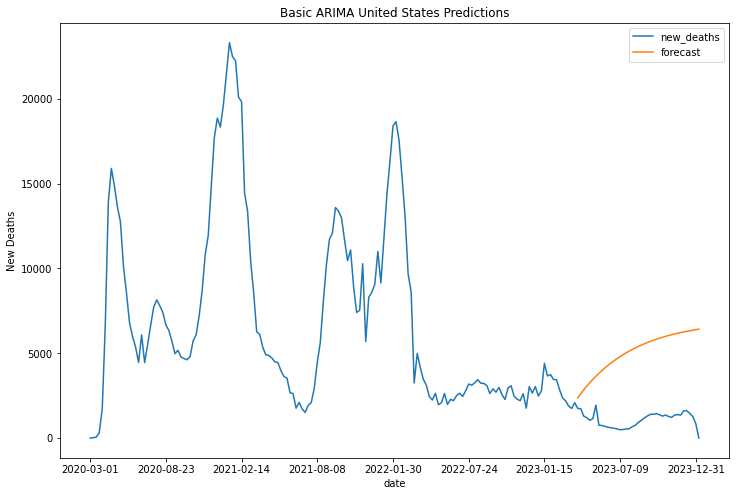

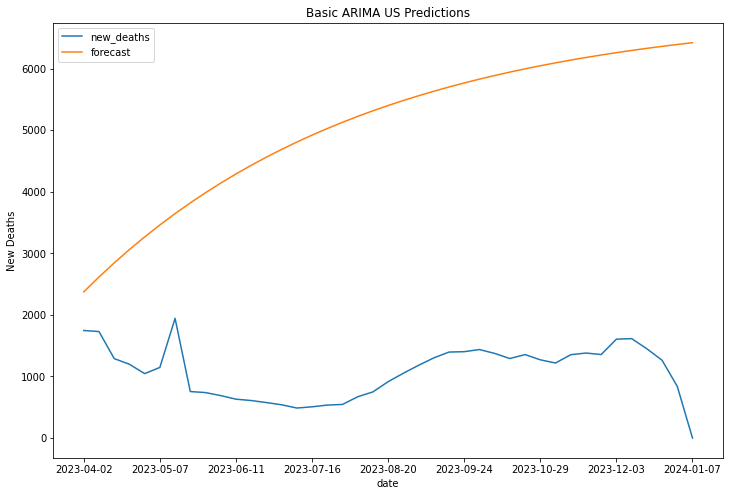

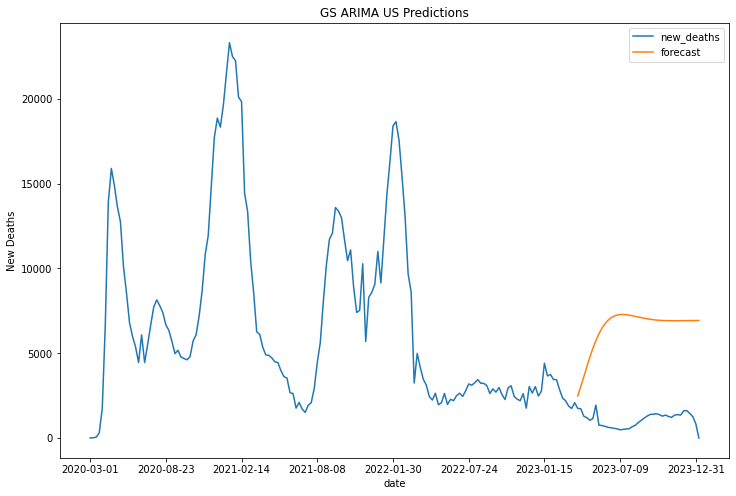

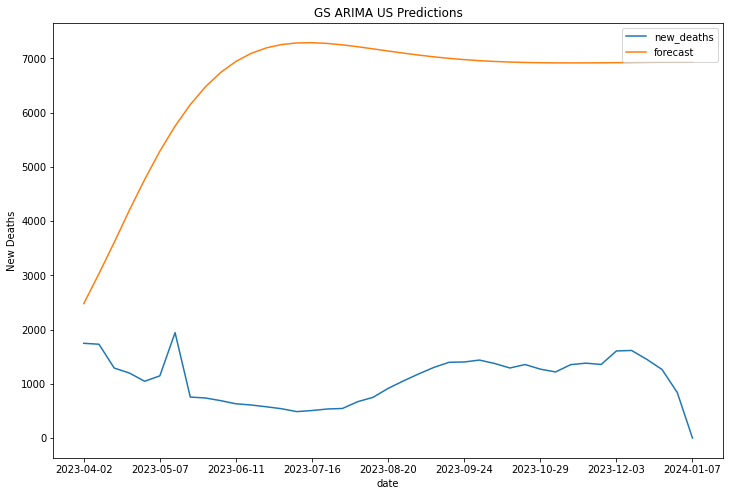

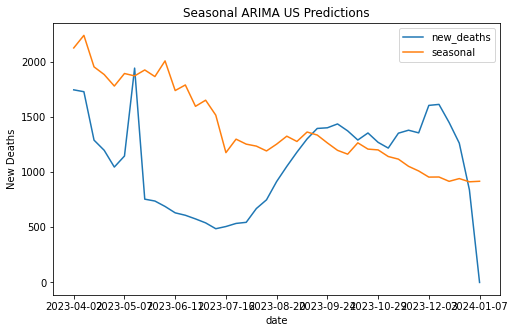

In [255]:
#us
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(us_train['new_deaths'],order=(1,0,1))
m=model.fit()


us['forecast']=m.predict(start=161,end=202,dynamic=True)
us[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA United States Predictions')
plt.ylabel('New Deaths')
us_test['forecast']=m.predict(start=161,end=202,dynamic=True)
us_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA US Predictions')
plt.ylabel('New Deaths')
actuals = us_test['new_deaths']  
predictions = us_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a us',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(us_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model2=ARIMA(us_train['new_deaths'],order=(p,0,q))
m2=model2.fit()

us['forecast']=m2.predict(start=161,end=202,dynamic=True)
us[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA US Predictions')
plt.ylabel('New Deaths')
us_test['forecast']=m2.predict(start=161,end=202,dynamic=True)
us_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA US Predictions')
plt.ylabel('New Deaths')

actuals =us_test['new_deaths']  
predictions = us_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched us',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(us_test['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,13)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(us_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,13))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
us_test['seasonal'] = pred
mae = mean_absolute_error(us_test['new_deaths'],us_test['seasonal'])
mase = mean_absolute_scaled_error(us_test['new_deaths'],us_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal us',mae, mase]

us_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA US Predictions')
plt.ylabel('New Deaths')

In [256]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188
2,gs seasonal czech,92.005714,15.207556
3,base a eston,5.808277,2.833306
4,grid searched eston,5.931483,2.893406
5,gs seasonal eston,5.902175,2.879110
6,base a franc,117.930514,9.827543
7,grid searched franc,753.078087,62.756507
8,gs seasonal franc,121.606787,10.133899
9,base a malay,19.261252,3.379167


In [258]:
metrics_df.sort_values('mase')
metrics_df.to_csv('ARIMAmetrics_data.csv', index=False)

In [259]:
metrics_df.sort_values('mase')


,Model,MAE,mase
14,gs seasonal belgi,2.955109,1.125756
23,gs seasonal israe,4.246441,1.369820
41,gs seasonal israe,4.246441,1.369820
44,gs seasonal italy,81.820825,2.380242
26,gs seasonal italy,81.820825,2.380242
35,gs seasonal chile,23.207319,2.762776
17,gs seasonal chile,23.207319,2.762776
38,gs seasonal irela,12.902439,2.789717
20,gs seasonal irela,12.902439,2.789717
3,base a eston,5.808277,2.833306
